In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [140]:
data=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.1
c_reg2=0

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([ 0.43175688,  2.52321836,  0.31033496,  3.68545604,  2.13081941,
        3.22650128,  3.11656731,  3.84619254,  2.95193427, 10.79799794])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


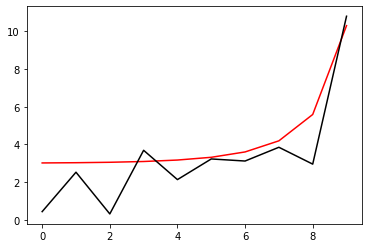

In [141]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [81]:
phi=tf.Variable(tf.zeros(1))
pi=tf.Variable(tf.zeros(1))

def F_func(a,b):
    return 2*b/n_fin-m2*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

def t_func2(a):
    return 0.5*(tanh(100*(a-0.1))-tanh(100*(a+0.1))+2)

In [84]:
def LP2(hh, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m2*dn+(1-dn*hh[j])*pi+dn*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh):
    Positive=[]
    while len(Positive)<data:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        for i in range (10000):
            if len(Positive)>=data: break
            if tf.math.abs(F_func(phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]])
            else: continue
    return Positive
def NN_func_n(hh):
    Negative=[]
    while len(Negative)<data:
        phi1=np.random.uniform(0.0, 1.5, 2000)
        pi1=np.random.uniform(-0.2, 0.2, 2000)
        phi_1, pi_1 = LP2(hh, phi1, pi1)
        for i in range (2000):
            if len(Negative)>=data: break
            if tf.math.abs(F_func(phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, list1):
    PP=[]
    NN=[]
    for i in range (data):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [85]:
for i in range (10):
    Positive[i]=NN_func_p(h_real)
    Negative[i]=NN_func_n(h_real)
    print(i)

0
1
2
3
4
5
6
7
8
9


In [142]:
for i in range (10):
    [Positive0[i], Positive1[i]]=NN_func_01(h, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, Negative[i])

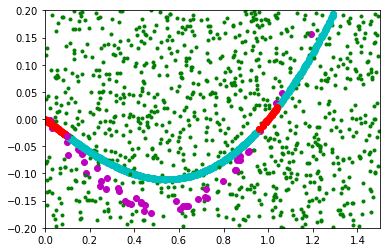

In [143]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (10):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [128]:
def Error_func(hh, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, phi0, pi0)
    phi_1, pi_1=LP2(hh, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=data-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [120]:
for i in range (10):
    print(Error_func(h_real, Positive[i], Negative[i]))
for i in range (10):
    print(Error_func(h, Positive[i], Negative[i]))

tf.Tensor(3.5190385122284096, shape=(), dtype=float64)
tf.Tensor(2.1703890585305547, shape=(), dtype=float64)
tf.Tensor(4.930366167495305, shape=(), dtype=float64)
tf.Tensor(1.070692821856665, shape=(), dtype=float64)
tf.Tensor(1.8244373968108627, shape=(), dtype=float64)
tf.Tensor(5.7805517041163625, shape=(), dtype=float64)
tf.Tensor(2.702738277509334, shape=(), dtype=float64)
tf.Tensor(1.513879376467393, shape=(), dtype=float64)
tf.Tensor(3.0925238400214505, shape=(), dtype=float64)
tf.Tensor(2.9400300894807163, shape=(), dtype=float64)
tf.Tensor(100.88189401995311, shape=(), dtype=float64)
tf.Tensor(95.88520739606868, shape=(), dtype=float64)
tf.Tensor(103.41874170671757, shape=(), dtype=float64)
tf.Tensor(93.50876092227374, shape=(), dtype=float64)
tf.Tensor(97.96297218706574, shape=(), dtype=float64)
tf.Tensor(100.35176050599054, shape=(), dtype=float64)
tf.Tensor(97.2431639279107, shape=(), dtype=float64)
tf.Tensor(98.65680999576401, shape=(), dtype=float64)
tf.Tensor(96.4501642

In [121]:
def run(i):
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[i], Negative[i])
        gradients=g.gradient(loss, [h])
    optimizer.apply_gradients(zip(gradients, [h]))

201 89.44725464176035
[ 1.42876365  1.48181414  1.06028161  1.49036987  1.79574238  1.45038422
  2.32563229  2.03242224  4.57718841 10.43278895]


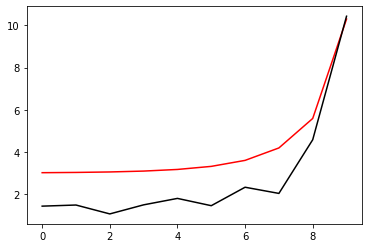

402 93.64271543518863
[ 1.61913301  1.64953025  1.24866099  1.63135494  1.88519435  1.53989104
  2.21702917  1.85974619  4.35818395 10.24984687]


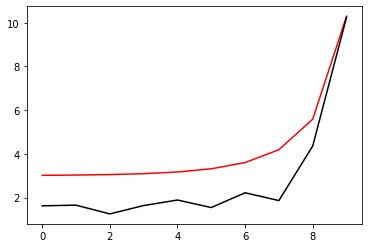

603 77.60689451935477
[ 1.799035    1.81603177  1.4319132   1.77870346  1.99091967  1.63783809
  2.12757224  1.70338991  4.15720633 10.079501  ]


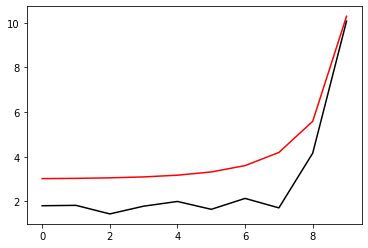

804 79.21625125157176
[1.98724632 1.99594906 1.62188327 1.93989594 2.11286977 1.735466
 2.02442519 1.51085258 3.9243618  9.92162441]


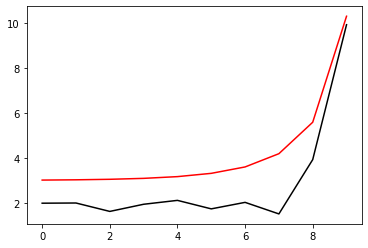

1005 75.3397283132194
[2.28017865 2.28771318 1.89014689 2.2012791  2.33734412 1.89356978
 1.91796138 1.26351143 3.63327176 9.77482618]


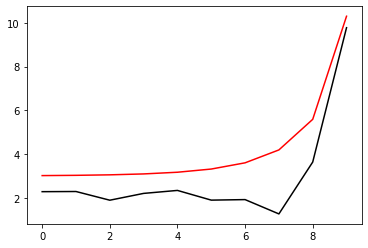

1206 58.15732645422346
[2.62001185 2.62903697 2.2058064  2.52404408 2.64358681 2.13844203
 1.8625766  1.01625347 3.33677519 9.63852115]


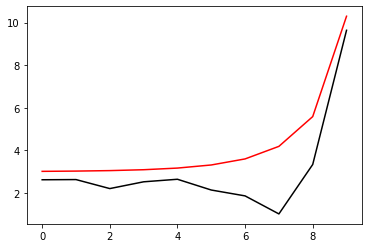

1407 8.97680480694278
[2.99376091 3.00001076 2.5629897  2.88976816 3.01610763 2.51435647
 2.15539828 0.93128341 3.10470062 9.51171704]


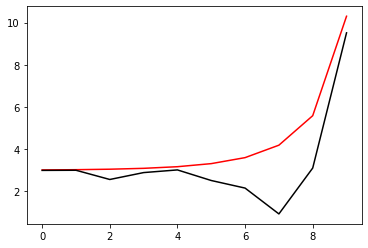

1608 5.368940427682153
[3.07029425 3.06211364 2.63737132 2.94360438 3.06744161 2.58598926
 2.24592221 1.01122119 3.1125321  9.40233075]


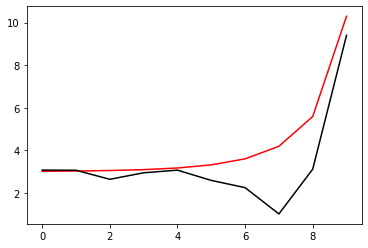

1809 3.5868343325835133
[3.08008076 3.06344171 2.66231262 2.94837116 3.07240754 2.61670482
 2.29624386 1.09761536 3.14388887 9.31233082]


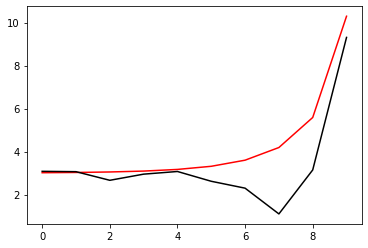

2010 4.3708263766266615
[3.08419458 3.06005288 2.6848155  2.95055884 3.07548681 2.64894067
 2.3523785  1.1951239  3.18248583 9.24067611]


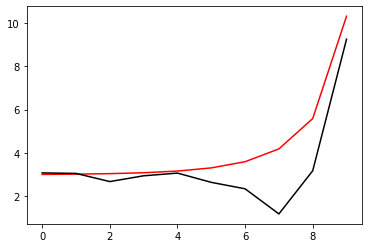

2211 4.564258939877188
[3.08865826 3.05822309 2.71047183 2.95690771 3.08443493 2.69201415
 2.42908362 1.31453349 3.23291843 9.18616376]


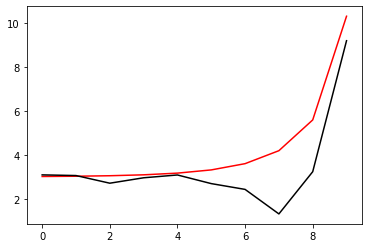

2412 7.3015852606988485
[3.09454826 3.0590399  2.73985321 2.96845445 3.10052476 2.7471638
 2.52644185 1.45523599 3.2978168  9.14751293]


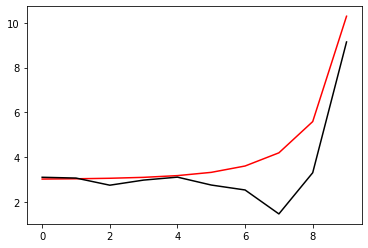

2613 1.4662841760247345
[3.10094474 3.06115835 2.77088381 2.9828736  3.12079672 2.80975493
 2.63353166 1.60699942 3.37647326 9.12310317]


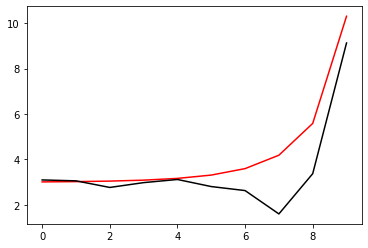

2814 3.505891697954191
[3.09917116 3.05478078 2.79306066 2.98712641 3.12884834 2.85851883
 2.71702122 1.74037845 3.45461639 9.11066149]


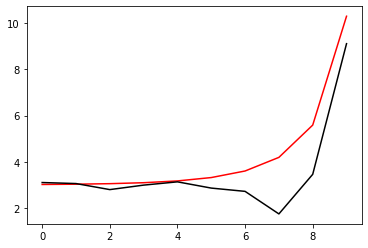

3015 9.622589786464816
[3.08865737 3.039968   2.80638362 2.98156627 3.12484157 2.89347815
 2.77925209 1.85632043 3.52764508 9.10704951]


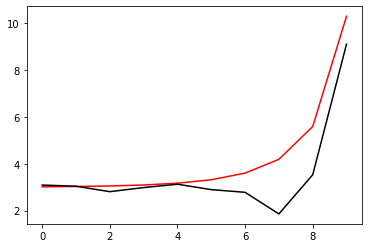

3216 3.472980121726129
[3.07563587 3.02352951 2.81704771 2.97379209 3.11743611 2.92437211
 2.83467903 1.96615592 3.59905096 9.10952373]


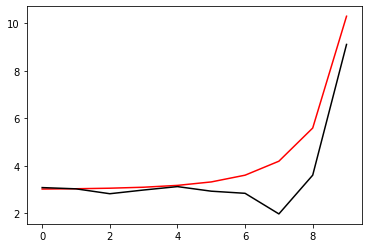

3417 4.880685150904504
[3.06287381 3.00844464 2.82755927 2.96691146 3.11001834 2.95445253
 2.88755971 2.07278045 3.66923828 9.11591296]


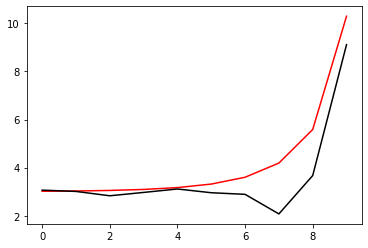

3618 4.215177318711193
[3.05131978 2.99581888 2.83882336 2.9622259  3.1041184  2.98506335
 2.93980195 2.1776281  3.73851074 9.12456653]


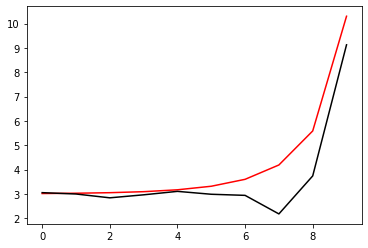

3819 3.3975572834210426
[3.04125193 2.98617729 2.8514616  2.9609015  3.10148311 3.01822856
 2.99479692 2.28375873 3.80878705 9.13442109]


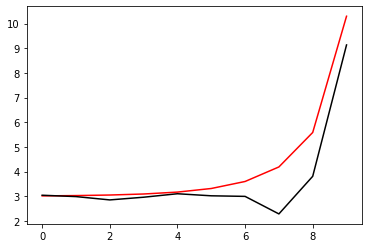

4020 3.957934742976775
[3.03419078 2.98168582 2.86815057 2.9669932  3.1078707  3.06120475
 3.06353931 2.4004839  3.88682647 9.14515683]


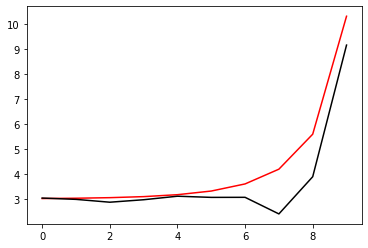

4221 2.128187782268337
[3.03557422 2.98913584 2.89686758 2.99186979 3.13908602 3.13397235
 3.17427952 2.55247859 3.99401495 9.15790325]


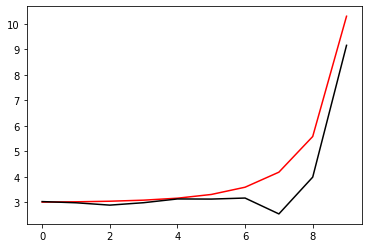

4422 5.44293424133655
[3.02718406 2.98783074 2.91713236 3.01111717 3.16741538 3.20527199
 3.28529923 2.70999971 4.11851776 9.17427587]


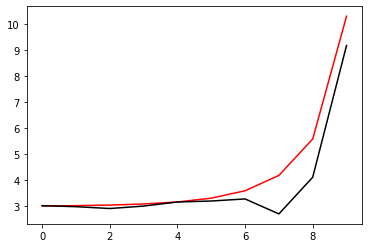

4623 1.0824681097807154
[3.00793851 2.97548848 2.92510825 3.01823413 3.18217645 3.25926317
 3.37224984 2.84663728 4.23288875 9.19168301]


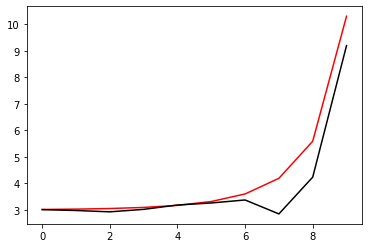

4824 3.0642756760488314
[2.98859853 2.96337833 2.93143011 3.02507722 3.19589956 3.30807562
 3.44858165 2.97039104 4.33810681 9.20827426]


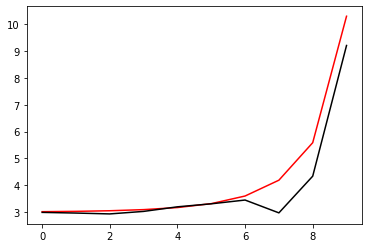

5025 7.1629320628195385
[2.97150007 2.95367299 2.93825688 3.03372022 3.21071739 3.35375609
 3.51712404 3.08366148 4.43470581 9.22351122]


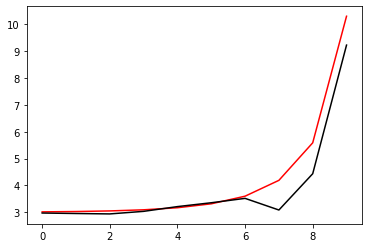

5226 2.925970596419198
[2.95774429 2.94730848 2.94670934 3.04521985 3.22799276 3.39824873
 3.58133731 3.19027902 4.52541374 9.23745572]


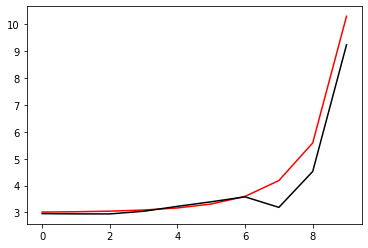

5427 2.449904992200331
[2.95097755 2.94792297 2.96062468 3.06395331 3.25318421 3.4482842
 3.65028957 3.29902064 4.6183369  9.25082955]


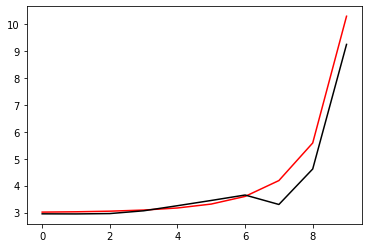

5628 3.112030771424278
[2.96347302 2.96726728 2.99144094 3.10288663 3.30232227 3.52349194
 3.74941339 3.43425024 4.7395382  9.2663478 ]


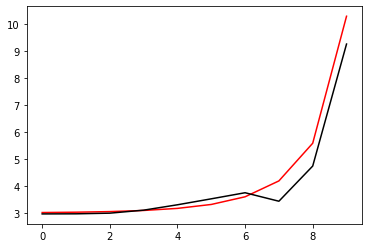

5829 2.867958242379453
[2.94616307 2.95411182 2.98942063 3.1066594  3.31632495 3.56608614
 3.82190937 3.5564254  4.8584244  9.28382327]


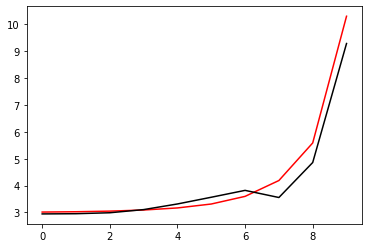

6030 3.1901493147907307
[2.93010135 2.94185848 2.98622135 3.1093471  3.32836208 3.603487
 3.88769799 3.67232328 4.97137614 9.30041329]


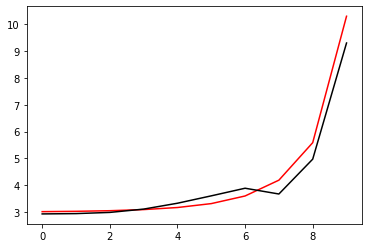

6231 2.0996220397963037
[2.91736237 2.93254186 2.98423395 3.1130328  3.34035459 3.63734437
 3.9477393  3.78221831 5.07794362 9.3160177 ]


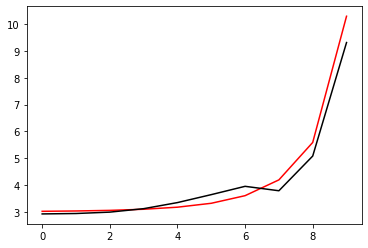

6432 4.9550293265455645
[2.90718969 2.92546741 2.98329479 3.11751168 3.3523643  3.66827922
 4.00300899 3.88732103 5.17962455 9.3307497 ]


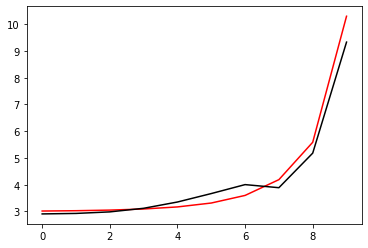

6633 1.091224110675657
[2.89901138 2.92024089 2.98352529 3.12313348 3.36523209 3.69797658
 4.05585102 3.989963   5.27918203 9.34498115]


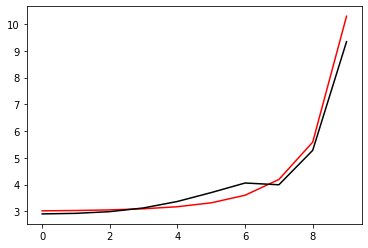

6834 1.8966514653337534
[2.8929822  2.91729752 2.98590107 3.13133125 3.38108735 3.72966569
 4.1104387  4.09397388 5.38082499 9.35925326]


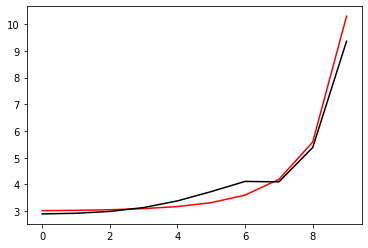

7035 5.718796603008302
[2.88997033 2.91793878 2.992421   3.14487867 3.40380319 3.76887075
 4.17399087 4.20626526 5.49209983 9.3745363 ]


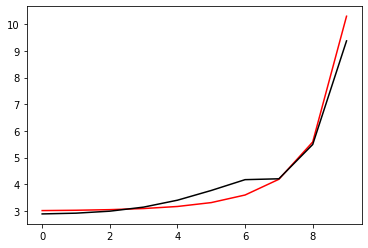

7236 2.3060438113959085
[2.88294413 2.91484679 2.99578294 3.15612704 3.42557527 3.80841054
 4.2403905  4.32375853 5.61225545 9.391386  ]


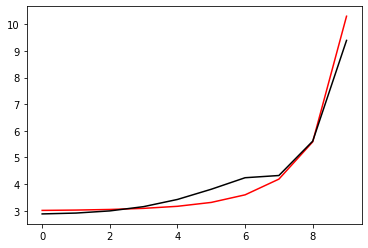

7437 1.175856401905214
[2.87275494 2.9079576  2.99456931 3.16177908 3.44027558 3.83843464
 4.2949004  4.43061013 5.72313364 9.40731659]


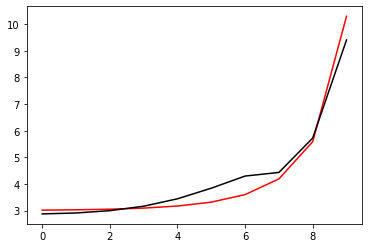

7638 3.1083319496906543
[2.86400504 2.90184845 2.99315191 3.16599588 3.45161893 3.86187278
 4.33906686 4.52619019 5.82198627 9.4214932 ]


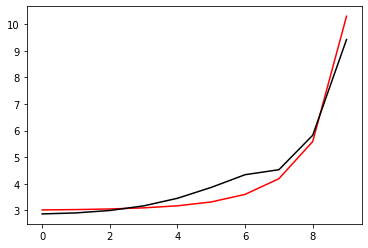

7839 2.2698695826669506
[2.85679019 2.89674845 2.99193589 3.16940355 3.46059722 3.88031852
 4.37523757 4.6128883  5.91113818 9.43419059]


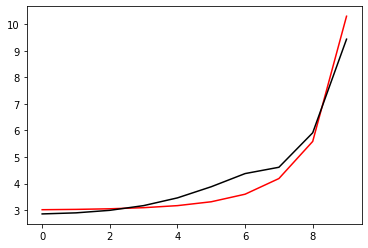

8040 3.135962404523916
[2.85117696 2.89285388 2.9912905  3.1726076  3.46820965 3.89542427
 4.40595333 4.69347862 5.99365596 9.44585681]


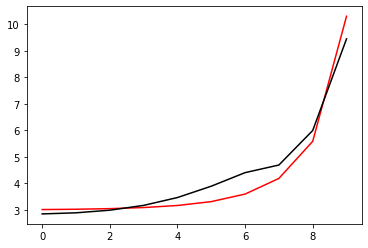

8241 2.0692535095980555
[2.84748147 2.89061297 2.99184876 3.17651082 3.47580567 3.90927011
 4.43427861 4.77119343 6.07322615 9.4570052 ]


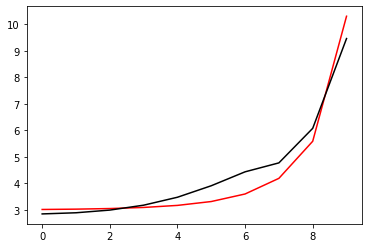

8442 4.180928099463801
[2.84895076 2.89353245 2.99749121 3.18561717 3.48885977 3.92876242
 4.46886452 4.85403622 6.15836034 9.46864111]


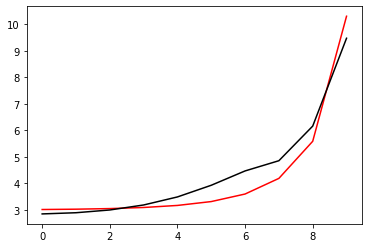

8643 1.137944913327095
[2.8804297  2.92826558 3.03796857 3.23520051 3.55145015 4.01080421
 4.582079   5.01064593 6.3228151  9.48998545]


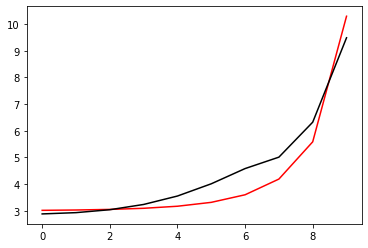

8844 0.8970221094057969
[2.86237898 2.91456504 3.03242957 3.24165334 3.57574578 4.06236947
 4.67506245 5.16148587 6.49285995 9.51414076]


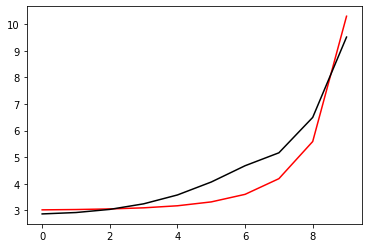

9045 5.159970175989707
[2.84252254 2.8989385  3.02469239 3.24553354 3.59659427 4.10874332
 4.75972858 5.3025716  6.65224245 9.53644597]


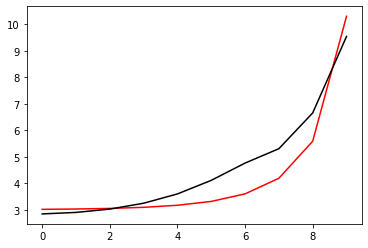

9246 1.5010741824786176
[2.82790403 2.88784595 3.02024499 3.25095414 3.61635034 4.15023336
 4.83498717 5.43241831 6.79934646 9.55705868]


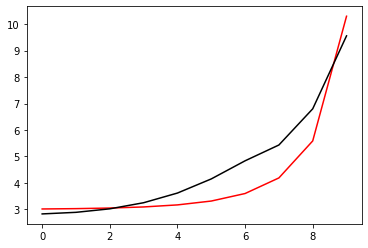

9447 1.1980320490406415
[2.81709738 2.87979448 3.01749018 3.25608116 3.6328487  4.1841398
 4.89747515 5.54776149 6.93212209 9.57565488]


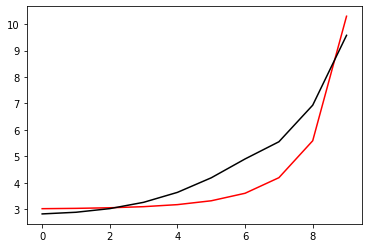

9648 2.22933807036441
[2.80863563 2.87349214 3.0154389  3.26034287 3.64610201 4.21116826
 4.94830902 5.64897303 7.05158469 9.5923695 ]


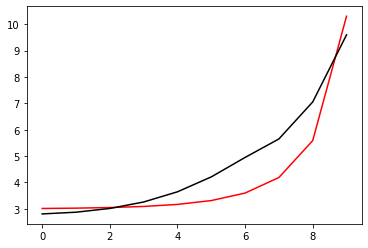

9849 1.4265694740433819
[2.80153073 2.8680773  3.01347276 3.26349791 3.65644195 4.23246586
 4.98944161 5.73743477 7.15912228 9.6073958 ]


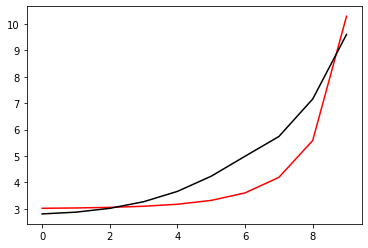

In [130]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, Positive[i%10], Negative[i%10]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 1.2479411326449739
[2.79412828 2.86208453 3.01087592 3.26616373 3.66676419 4.25491094
 5.03515193 5.8506442  7.30744874 9.62859253]


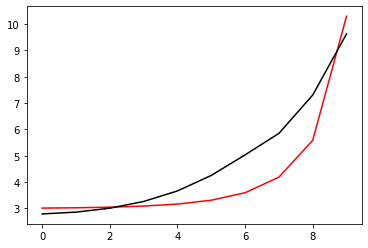

402 3.753587357750905
[2.79099088 2.85949861 3.00963099 3.26696391 3.67029739 4.26256886
 5.05176601 5.89847025 7.37618746 9.63808584]


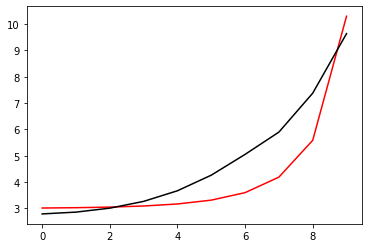

603 1.241544545340664
[2.78820182 2.8570923  3.00832524 3.26738901 3.67302057 4.26877476
 5.06602369 5.94209896 7.43976855 9.64688373]


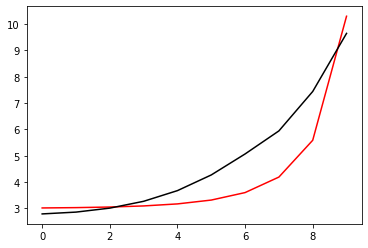

804 0.35005413933075025
[2.78574483 2.85486923 3.00697837 3.26748217 3.67501723 4.27368471
 5.07818819 5.98192338 7.49874047 9.65498493]


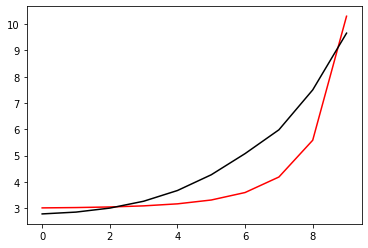

1005 5.191630578364842
[2.78364315 2.85287186 3.00564952 3.26732488 3.67640668 4.27748533
 5.08854573 6.01836373 7.55363557 9.6625709 ]


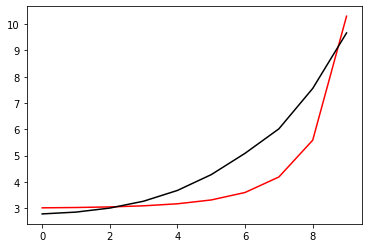

1206 1.302714972938949
[2.78181206 2.85103764 3.00429847 3.26690531 3.67722253 4.28028769
 5.09732213 6.05180835 7.60498742 9.66965991]


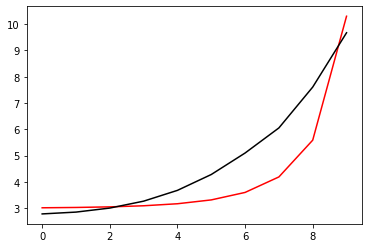

1407 1.2218730215219389
[2.78023594 2.84937105 3.00295087 3.2662742  3.67755384 4.28224446
 5.10476002 6.08262573 7.65326845 9.67629914]


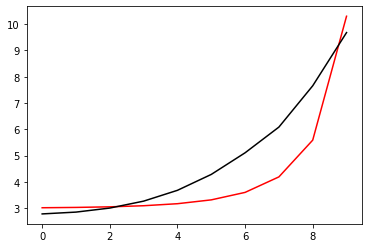

1608 2.269792824900671
[2.77889327 2.84786854 3.0016239  3.2654728  3.67747761 4.28349057
 5.11107432 6.11114509 7.69890134 9.68263304]


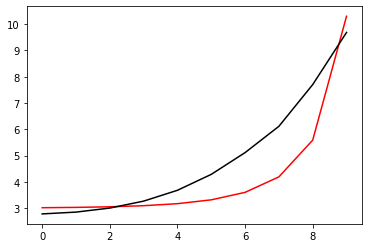

1809 1.292477020024784
[2.77773188 2.84649533 3.00030445 3.26451308 3.67704193 4.28413105
 5.11644771 6.1376634  7.74227861 9.68858181]


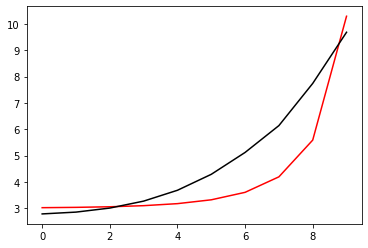

2010 1.6963546004829482
[2.7769723  2.84548426 2.99924249 3.26366471 3.67654429 4.28450626
 5.12127446 6.16264819 7.78390825 9.69428569]


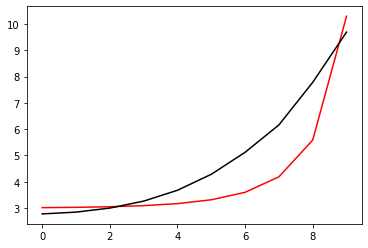

2211 1.2782414001595672
[2.77633831 2.84456826 2.99818537 3.26269161 3.67577171 4.28443909
 5.12542502 6.18605939 7.82382569 9.69987422]


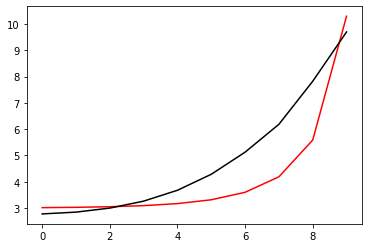

2412 3.543124427786963
[2.77579649 2.84372536 2.99712942 3.26161265 3.67477427 4.28402632
 5.12905858 6.20815599 7.86236724 9.7051668 ]


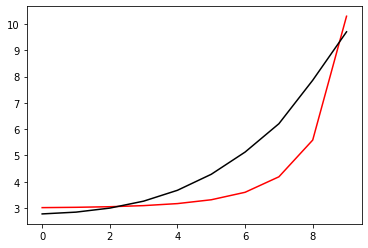

2613 1.2673686363047039
[2.77533503 2.84294908 2.99607796 3.26044137 3.67357706 4.28330781
 5.13222755 6.2290232  7.89961764 9.71025659]


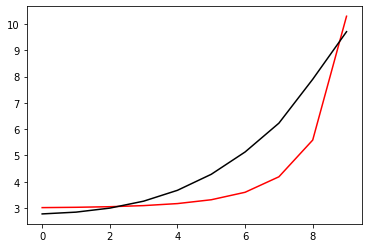

2814 0.3110800274402834
[2.77493083 2.84222315 2.99502754 3.25919002 3.67221252 4.28234396
 5.13502666 6.24882062 7.93577178 9.71528431]


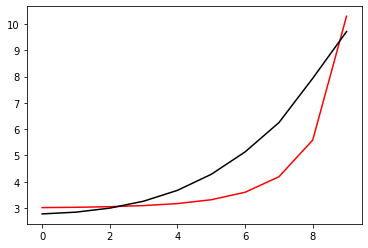

3015 5.187401637692801
[2.77461876 2.8415868  2.99402731 3.25792025 3.67075759 4.28123163
 5.13757494 6.26771462 7.97100744 9.72016553]


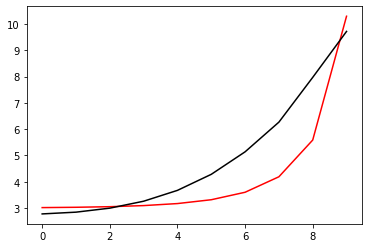

3216 1.284231252873557
[2.7743333  2.84097817 2.99302455 3.25659141 3.66918666 4.2799648
 5.1398899  6.28577722 8.00541975 9.72487172]


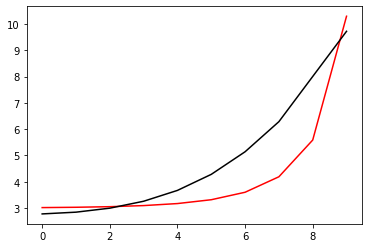

3417 1.1891023689782303
[2.77402736 2.84035393 2.99198525 3.25518247 3.66749524 4.27856083
 5.14201688 6.3031149  8.03914533 9.72951886]


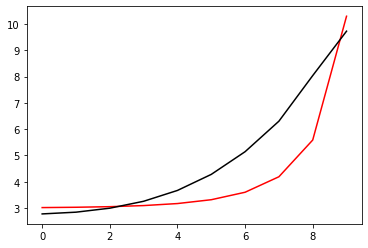

3618 2.2829648546643755
[2.77372854 2.8397442  2.99094616 3.25373877 3.66573761 4.27708266
 5.14402547 6.31982558 8.07227026 9.73412978]


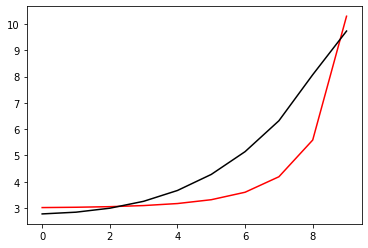

3819 1.2802960761242765
[2.77342706 2.8391426  2.9899088  3.25227276 3.6639392  4.27557092
 5.14597461 6.33601499 8.10491189 9.73861803]


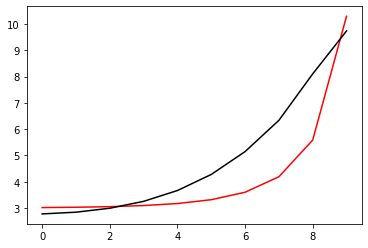

4020 1.6595537407466368
[2.77334689 2.83877565 2.98910656 3.25102797 3.66235572 4.27429526
 5.14814987 6.35200676 8.13738804 9.74303422]


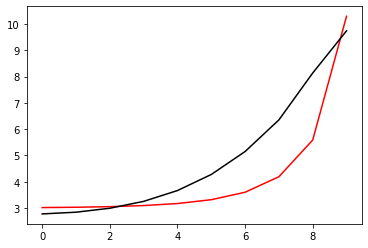

4221 1.288813791155746
[2.77321848 2.83837523 2.98827634 3.24974888 3.66074031 4.27301819
 5.1503263  6.36762196 8.1695404  9.747543  ]


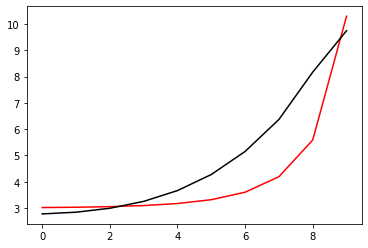

4422 3.4543994722376357
[2.77302484 2.83792879 2.98741444 3.24844493 3.65911939 4.27178805
 5.15258358 6.38300645 8.20155255 9.75197   ]


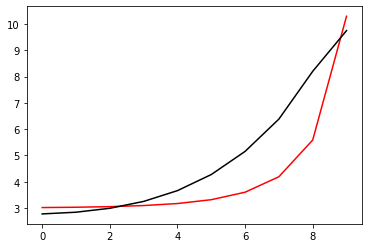

4623 1.2731932682801141
[2.77275771 2.83743035 2.9865193  3.24712011 3.65750161 4.27061523
 5.15493121 6.39818789 8.23343268 9.75630782]


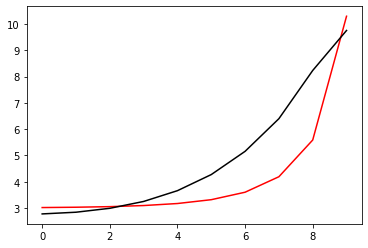

4824 0.3029207269826251
[2.77241097 2.83687631 2.98559339 3.24578608 3.65590995 4.26953607
 5.15742448 6.4132688  8.26530049 9.76071618]


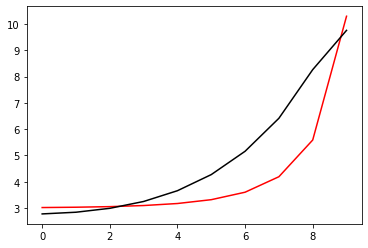

5025 5.183031646044419
[2.77202047 2.83630642 2.9846835  3.24449969 3.65441342 4.26863382
 5.16016656 6.42839904 8.29732125 9.76517435]


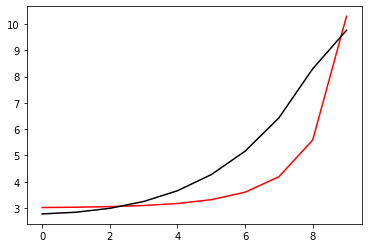

5226 1.2849245510140186
[2.7715237  2.83566199 2.98373777 3.24321845 3.65298077 4.26789036
 5.16315873 6.44362761 8.32956583 9.76960209]


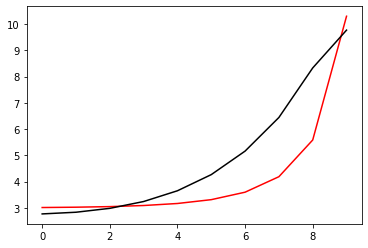

5427 1.1136846939393077
[2.77082332 2.83485241 2.98267651 3.24187824 3.6515689  4.26729192
 5.1664337  6.45907642 8.36223202 9.7740702 ]


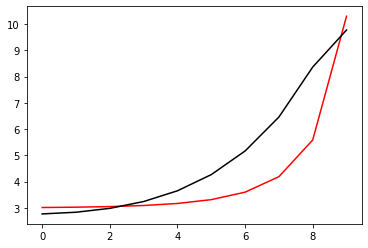

5628 2.290970846886751
[2.76997423 2.8339393  2.98157005 3.24055891 3.65026668 4.26693484
 5.17009601 6.47487505 8.39543884 9.77869084]


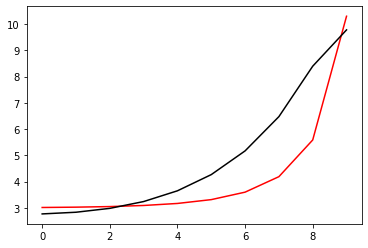

5829 1.2838541214578112
[2.7689524  2.83290934 2.98041905 3.23927775 3.64911115 4.26688084
 5.17424411 6.4911911  8.4294007  9.78339353]


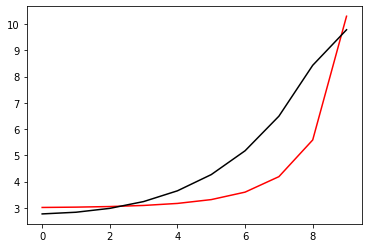

6030 1.6735169639479577
[2.76794317 2.83196284 2.97944278 3.23827633 3.64837067 4.2674329
 5.17923174 6.50846206 8.46460818 9.78817201]


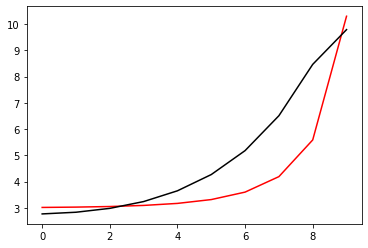

6231 1.2979832710964707
[2.76663068 2.83080397 2.9783689  3.23730746 3.64782624 4.26840702
 5.18492757 6.52665212 8.5011116  9.79325618]


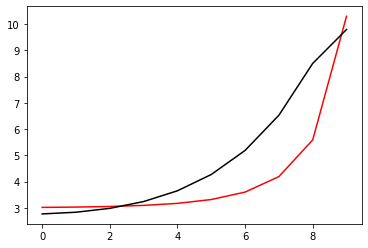

6432 3.3935252379875256
[2.76492644 2.82937719 2.97717946 3.23639359 3.64754677 4.26993187
 5.19154854 6.54611899 8.53939375 9.79857798]


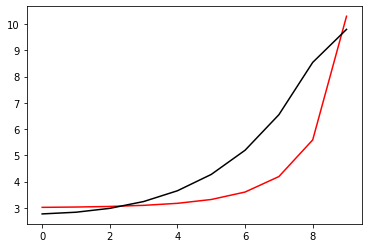

6633 1.2527612169932407
[2.76265904 2.82756726 2.97581828 3.23553696 3.64759655 4.27214645
 5.19933847 6.56726583 8.57999647 9.80412539]


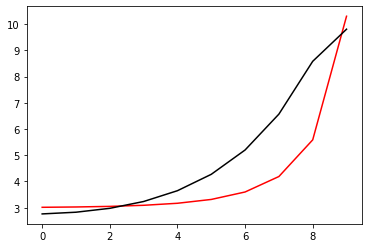

6834 0.30332392147016995
[2.75961701 2.82524786 2.97424906 3.23479044 3.64812426 4.2753168
 5.20872895 6.59076755 8.6238178  9.81015171]


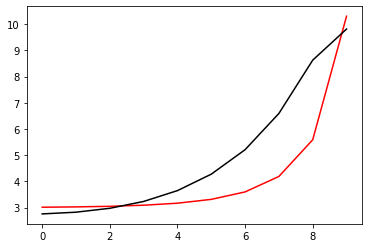

7035 5.178191664718031
[2.75533954 2.82213228 2.97236123 3.23421309 3.64936685 4.27989363
 5.2204658  6.61778918 8.67242574 9.81690267]


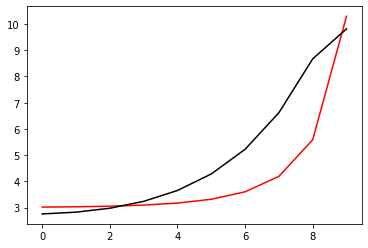

7236 1.297346624002004
[2.74861553 2.81739304 2.96970397 3.2337086  3.65159008 4.28656629
 5.23581    6.65038764 8.72867524 9.82467084]


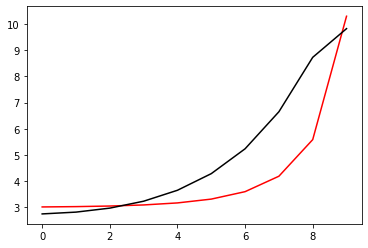

7437 0.6891486067666643
[2.73683777 2.80921404 2.96524679 3.23298987 3.65526212 4.29667547
 5.2572646  6.69266417 8.79827676 9.83420832]


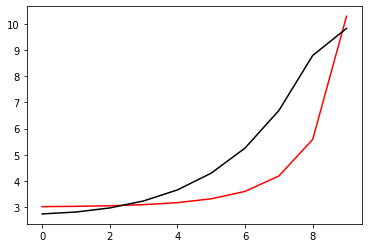

7638 2.3152026718118885
[2.72533089 2.80221    2.96307191 3.23565541 3.6634415  4.31253828
 5.28595792 6.74376024 8.87755945 9.84517113]


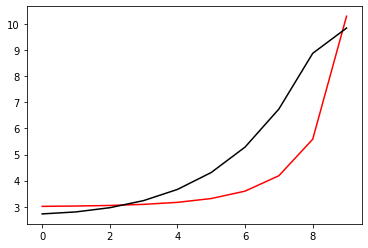

7839 1.31877435443533
[2.71833248 2.79881176 2.96389713 3.24080237 3.67352668 4.32948757
 5.314321   6.79197583 8.95052093 9.8552766 ]


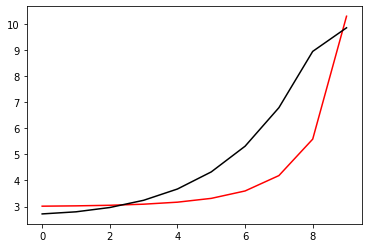

8040 1.906014836771642
[2.71288388 2.79615096 2.9648277  3.24549937 3.68255792 4.34456777
 5.33949681 6.83482335 9.01558359 9.86417897]


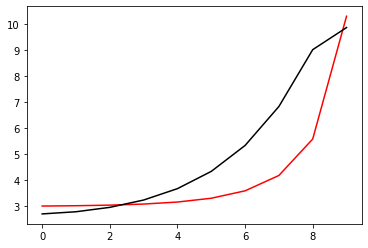

8241 1.3407501962739405
[2.70833501 2.79370528 2.96540017 3.24933221 3.69017991 4.35752051
 5.36142004 6.87262146 9.07363305 9.872218  ]


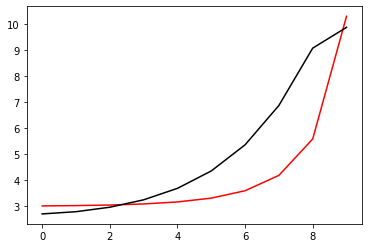

8442 3.3649182476660005
[2.70454987 2.79144266 2.9656442  3.25238923 3.69655188 4.36861086
 5.38054214 6.9061464  9.12584338 9.87946683]


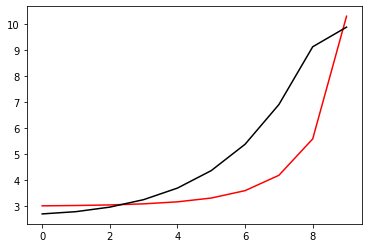

8643 0.49843059348398305
[2.70132432 2.78925585 2.96551866 3.25469493 3.70177666 4.3780519
 5.39725737 6.93608961 9.17324871 9.88594281]


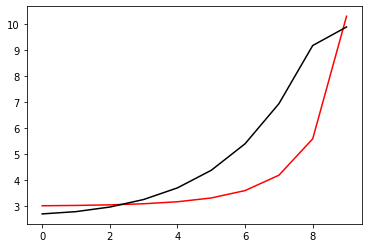

8844 0.35450315484795597
[2.69871189 2.78725608 2.96516874 3.25642912 3.70607924 4.38613531
 5.41196843 6.96302988 9.2166083  9.89192814]


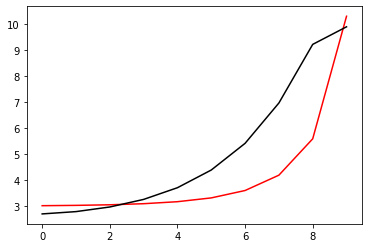

9045 5.028484456682222
[2.69665509 2.78544907 2.96464297 3.25768487 3.70961063 4.39309585
 5.42504403 6.98754096 9.25670676 9.89749651]


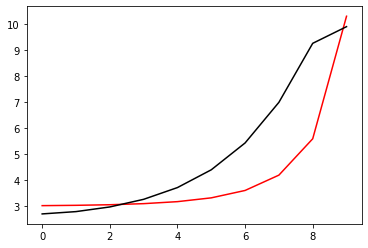

9246 1.363775446998535
[2.6950831  2.78381106 2.96394473 3.25849067 3.71243196 4.39904055
 5.43666263 7.00990728 9.29392952 9.90260408]


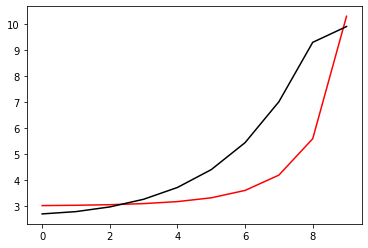

9447 0.5046779771330916
[2.69388711 2.78227497 2.96303235 3.25882975 3.71456299 4.4040455
 5.44699149 7.03043346 9.32871964 9.90741492]


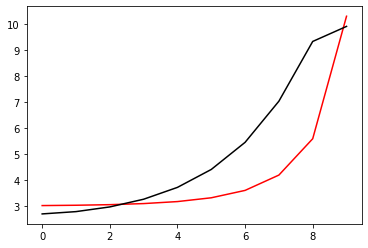

9648 2.361196235742224
[2.69307903 2.780892   2.9619787  3.2587906  3.71611244 4.40824708
 5.45620601 7.04934315 9.36132874 9.91190076]


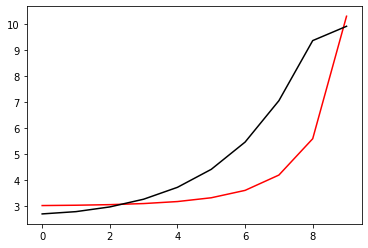

9849 1.367204803962719
[2.6926217  2.77966018 2.96080219 3.25840573 3.71713289 4.41172833
 5.46443526 7.0668278  9.39199952 9.91614718]


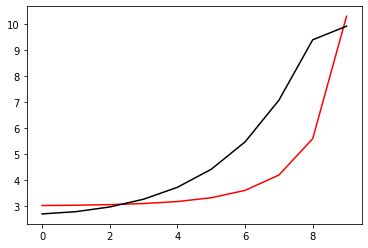

In [131]:
optimizer=tf.optimizers.Adam(learning_rate=0.00075)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, Positive[i%10], Negative[i%10]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 1.3863478908798492
[2.69311403 2.77836435 2.95888317 3.25714379 3.71759596 4.41553526
 5.47480961 7.08971249 9.43238601 9.92166307]


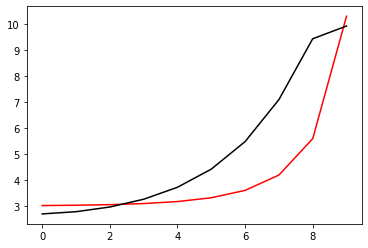

402 3.3954525313638273
[2.69336912 2.77773203 2.95785049 3.25639431 3.71771884 4.41736625
 5.47993388 7.10090166 9.4517683  9.92438259]


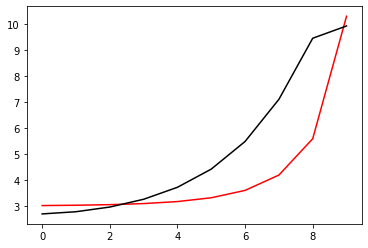

603 0.43627494057982996
[2.69368217 2.77712176 2.95672575 3.25543958 3.71754961 4.418824
 5.48457546 7.11143216 9.47028823 9.92697957]


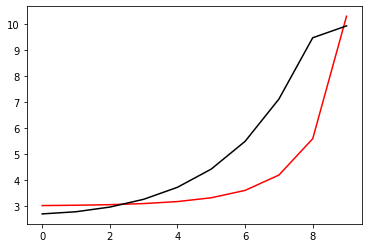

804 0.3843264493777781
[2.69409498 2.77658454 2.9555712  3.25434521 3.71715314 4.41997088
 5.48879103 7.12135193 9.48799249 9.92940877]


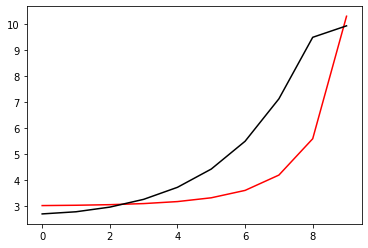

1005 4.9000136780742665
[2.69462951 2.77615905 2.95444679 3.25318809 3.7166234  4.42092396
 5.49273012 7.13085039 9.50510564 9.93170247]


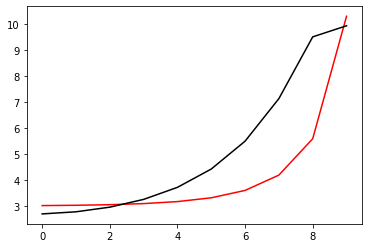

1206 1.3903137349528267
[2.69524107 2.77580675 2.95332328 3.25194104 3.7159287  4.42164214
 5.49633697 7.13985488 9.52154396 9.9339575 ]


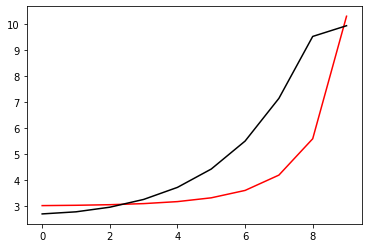

1407 0.4776398952695087
[2.69585716 2.775466   2.95215543 3.25057208 3.71504924 4.4221222
 5.49963378 7.14842338 9.53740131 9.93619316]


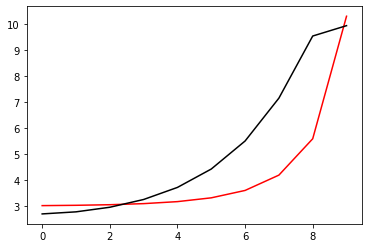

1608 2.37417196025732
[2.69650746 2.77517387 2.950992   3.24913677 3.71404198 4.42241903
 5.50266988 7.15659624 9.55270742 9.93835075]


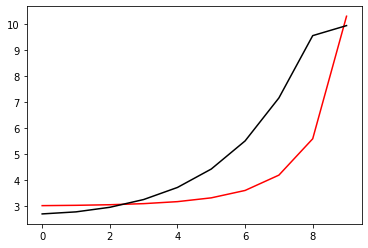

1809 1.3813611384345774
[2.69718795 2.77493249 2.94984648 3.24765699 3.71293354 4.42256327
 5.50548104 7.16441634 9.56751156 9.94037941]


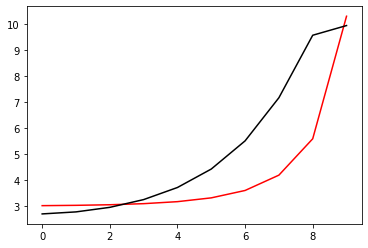

2010 1.579265248123604
[2.69801212 2.77486154 2.94884969 3.24627215 3.7118681  4.42270206
 5.5082156  7.17202932 9.58195046 9.94230763]


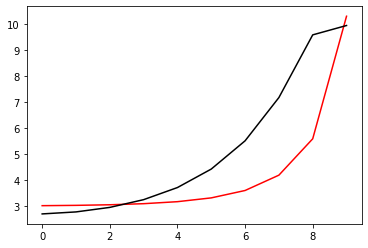

2211 1.4009021225371237
[2.69882581 2.77480721 2.9478542  3.24484057 3.71070753 4.42270195
 5.5107507  7.17933416 9.59595247 9.94422317]


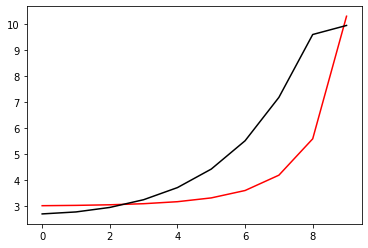

2412 3.406734241061578
[2.6996192  2.77476222 2.94686051 3.24336979 3.70946368 4.42257854
 5.5131074  7.18636032 9.60955519 9.94614564]


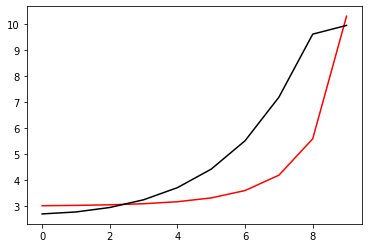

2613 0.43403720340786694
[2.70034904 2.77469035 2.94584369 3.24184574 3.70813083 4.42233434
 5.51529923 7.19313644 9.62280181 9.94801574]


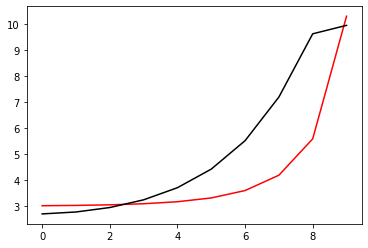

2814 0.39503339435789175
[2.70106447 2.7746348  2.94484629 3.24031075 3.70674841 4.42200358
 5.5173539  7.19968354 9.63570715 9.94978407]


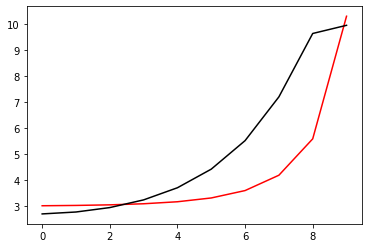

3015 4.83214464116717
[2.70181418 2.77464798 2.9439302  3.23883918 3.70540466 4.42169249
 5.51940245 7.20616158 9.64845298 9.95147405]


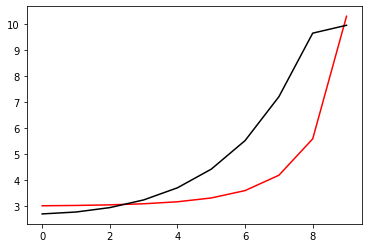

3216 1.4006613817595455
[2.70256183 2.77468685 2.94304825 3.23737837 3.70403568 4.42131871
 5.52133752 7.21243753 9.66088915 9.95317674]


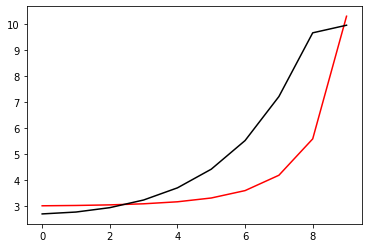

3417 0.46434472091587886
[2.70324903 2.77469498 2.94215005 3.2358862  3.70260802 4.42085974
 5.52315352 7.21852975 9.6730576  9.95490513]


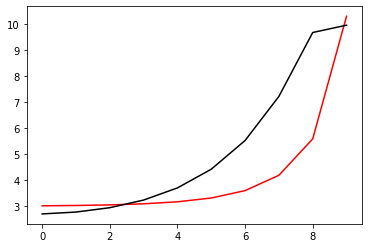

3618 2.3786599734005742
[2.70391058 2.77470611 2.9412707  3.23439938 3.70115683 4.42034504
 5.52487042 7.22444674 9.6849563  9.95659292]


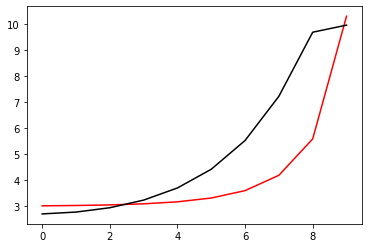

3819 1.3889780164500534
[2.70455599 2.77472924 2.94042119 3.23293204 3.69969772 4.41978968
 5.526502   7.23020185 9.69659876 9.95818445]


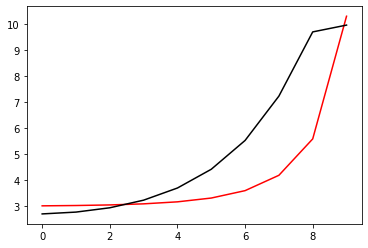

4020 1.5692718996214812
[2.70531011 2.77488952 2.93972876 3.23161437 3.69836177 4.41932214
 5.52816988 7.23590498 9.70808033 9.95970555]


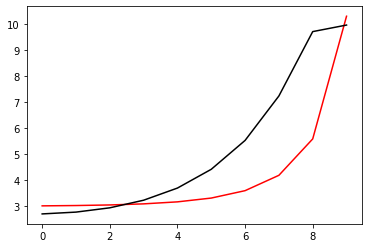

4221 1.4084914804584372
[2.70602339 2.77503379 2.93903977 3.23029488 3.69700055 4.41879889
 5.52974151 7.24144486 9.71931622 9.96123947]


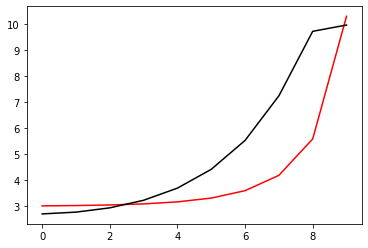

4422 3.413077961975101
[2.70669232 2.77515781 2.93835109 3.22897328 3.69561627 4.41822381
 5.5312229  7.24683147 9.73032071 9.96280295]


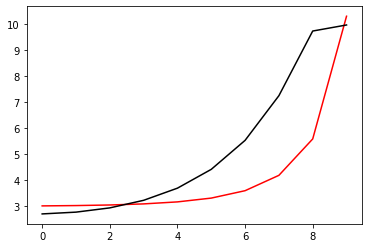

4623 0.43524098058212146
[2.70728264 2.77523153 2.93763796 3.2276315  3.69419737 4.41759165
 5.53261653 7.25207734 9.74111599 9.96433472]


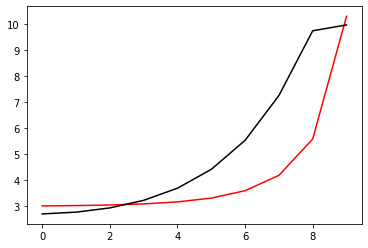

4824 0.4016401712027995
[2.70784565 2.77529875 2.9369386  3.226304   3.69277413 4.41692649
 5.53393826 7.25718983 9.75170237 9.96578318]


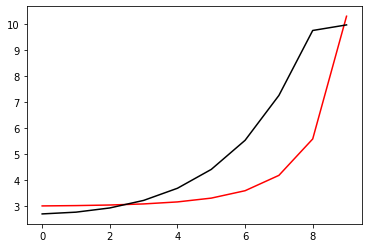

5025 4.782463573151365
[2.70843783 2.77541896 2.93631836 3.22506603 3.69143547 4.41633515
 5.5353178  7.2623228  9.76225066 9.96716975]


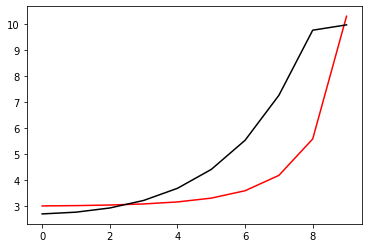

5226 1.407236468796636
[2.70902417 2.77554853 2.93572454 3.22385486 3.69010475 4.41572051
 5.53663129 7.26732603 9.7725937  9.96858418]


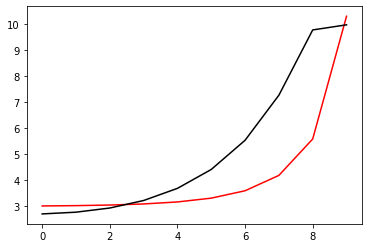

5427 0.4566129473077973
[2.70955044 2.77563534 2.9351083  3.22262736 3.68874661 4.41505754
 5.53786845 7.27220853 9.78275866 9.97003736]


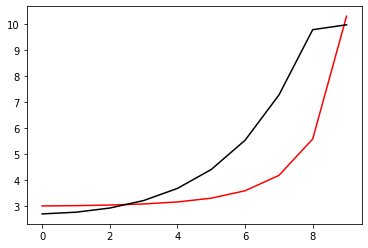

5628 2.3810847954102274
[2.7100473  2.77570872 2.93449772 3.22141077 3.68738638 4.41436678
 5.53904173 7.27697312 9.79274018 9.97146029]


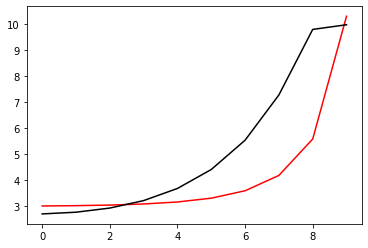

5829 1.3947297995899737
[2.71052826 2.77578179 2.93390566 3.22021851 3.68603776 4.41366078
 5.54016101 7.28162678 9.8025431  9.97279689]


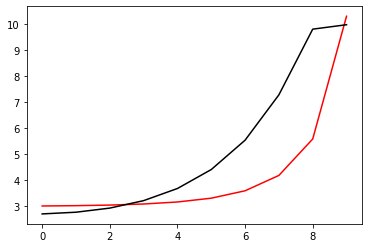

6030 1.5647229830846678
[2.71112181 2.77598322 2.93346063 3.21917914 3.68482828 4.41306266
 5.54133961 7.28626752 9.81224888 9.97407367]


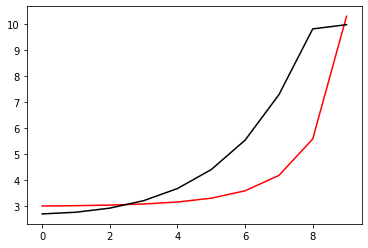

6231 1.4142439300458713
[2.71167569 2.77615794 2.93300616 3.21813725 3.68360623 4.41242797
 5.54244689 7.29078738 9.82177508 9.97537226]


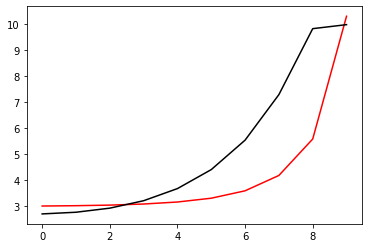

6432 3.41811754724613
[2.71218705 2.77630289 2.93253922 3.21709089 3.68237141 4.41175821
 5.5434862  7.29519226 9.83113035 9.97670813]


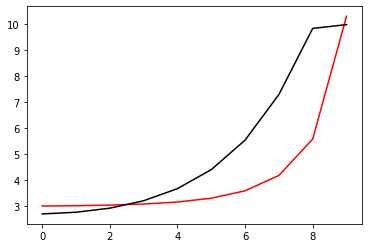

6633 0.436933448090401
[2.71262494 2.77639169 2.93203763 3.21602279 3.68111218 4.41104786
 5.54445891 7.2994915  9.84033122 9.97801954]


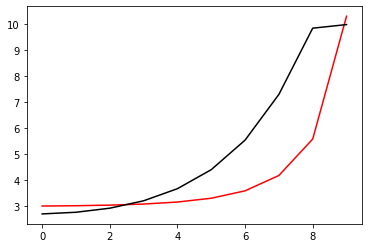

6834 0.4070037775416934
[2.71303927 2.77646749 2.93153843 3.21496492 3.67985571 4.41031812
 5.54537836 7.30368981 9.84937545 9.97925487]


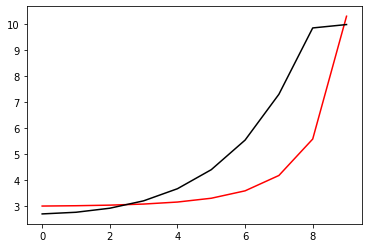

7035 4.740925444178354
[2.71348893 2.77659331 2.93111063 3.21399565 3.67869411 4.40967964
 5.54637767 7.30794199 9.85843189 9.98043556]


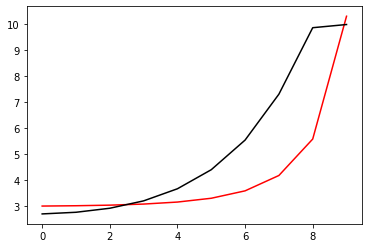

7236 1.4127196032307472
[2.7139391  2.77672535 2.93069995 3.21304842 3.67754504 4.40902867
 5.54732625 7.31209172 9.86732808 9.98165105]


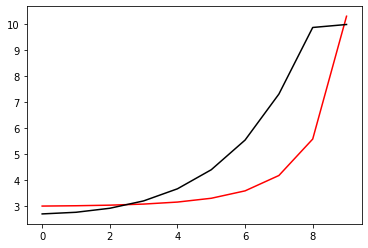

7437 0.45225378179120995
[2.71433695 2.77681391 2.93026012 3.21208186 3.67637436 4.4083412
 5.54821395 7.3161455  9.8760854  9.982911  ]


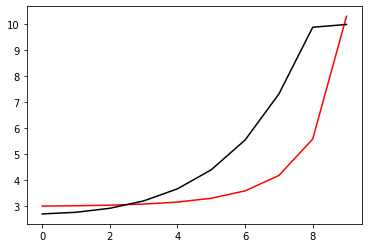

7638 2.3828259010134607
[2.71470776 2.77688346 2.92981428 3.21111766 3.67520178 4.40763329
 5.54905069 7.32010577 9.88470005 9.98414488]


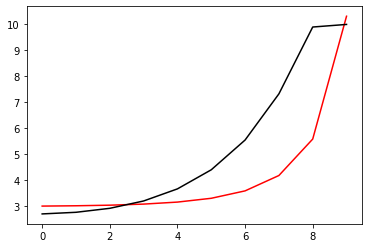

7839 1.3996692412941036
[2.7150671  2.7769497  2.92937776 3.2101708  3.67404168 4.40691765
 5.54984587 7.32397774 9.89317386 9.98529707]


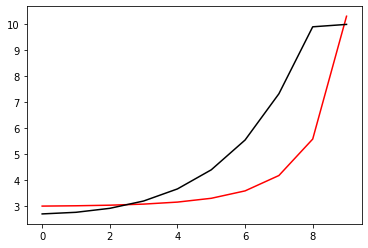

8040 1.5620404679374418
[2.71554502 2.77714307 2.92908046 3.20936995 3.6730202  4.40631465
 5.55070834 7.32785304 9.90158095 9.98639522]


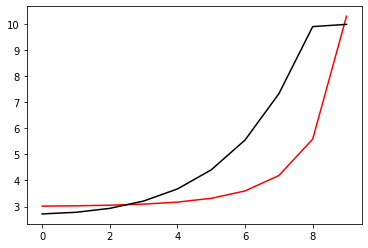

8241 1.4191898929029292
[2.71598642 2.77730652 2.92876451 3.20855847 3.67198505 4.405681
 5.55151101 7.33162853 9.90984312 9.98752006]


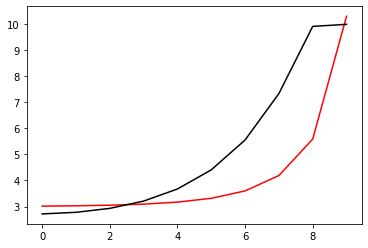

8442 3.4225482209557128
[2.71638824 2.77743725 2.92842729 3.20773434 3.67093546 4.40501762
 5.55225661 7.33530892 9.91796698 9.98868608]


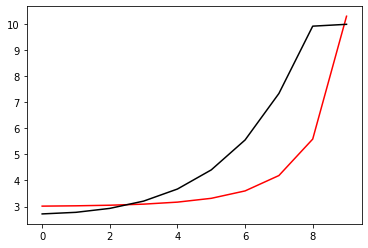

8643 0.438755124602583
[2.7167219  2.77751152 2.92804922 3.20688229 3.66986107 4.40431983
 5.55294691 7.33890267 9.92596664 9.98983134]


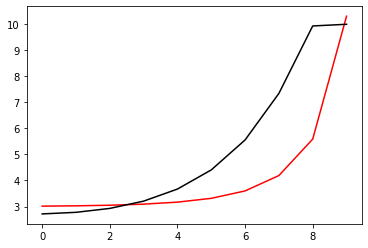

8844 0.411682767275397
[2.71703544 2.77757116 2.92766635 3.20603304 3.66878748 4.40360739
 5.5535942  7.34241383 9.93383947 9.9909046 ]


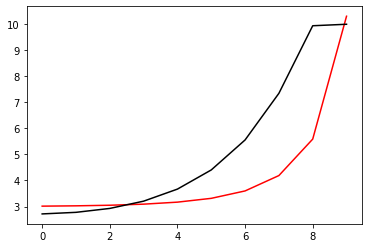

9045 4.70478229674867
[2.71738902 2.7776813  2.92735052 3.2052681  3.66781012 4.40299449
 5.55433481 7.34599872 9.94175398 9.99192774]


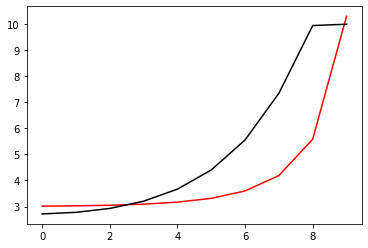

9246 1.4175982973958035
[2.71774847 2.77779824 2.92704683 3.20451904 3.66684333 4.40237314
 5.55503396 7.34949767 9.94953512 9.99299007]


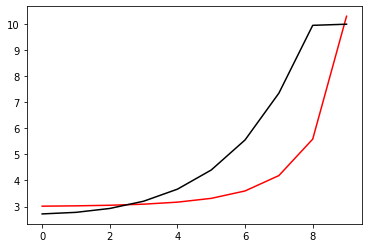

9447 0.4499105043453871
[2.71806151 2.77787359 2.92671085 3.20374629 3.66585447 4.40172051
 5.55568199 7.35291603 9.95720098 9.99410024]


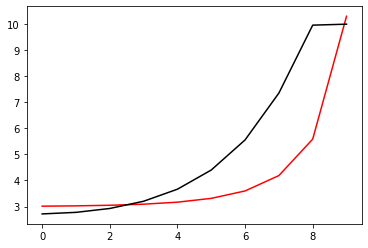

9648 2.384159757568252
[2.71834871 2.77792736 2.92636152 3.20296747 3.66485929 4.4010495
 5.5562873  7.35625659 9.96474973 9.99518658]


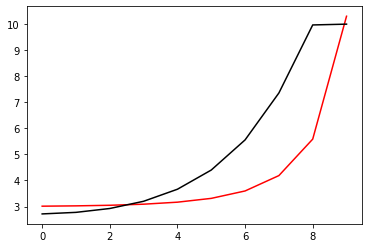

9849 1.4040364748012193
[2.71862735 2.77797723 2.92601632 3.20219933 3.66387336 4.40037335
 5.55685917 7.35952367 9.97218147 9.99619409]


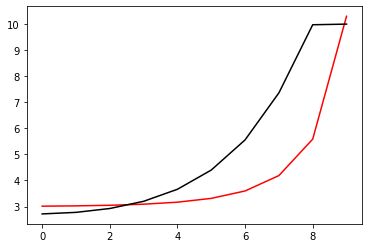

In [132]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, Positive[i%10], Negative[i%10]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 1.423021962777959
[2.71960521 2.77836108 2.92553549 3.20083741 3.66198754 4.39882461
 5.55714663 7.36400248 9.98337581 9.99766348]


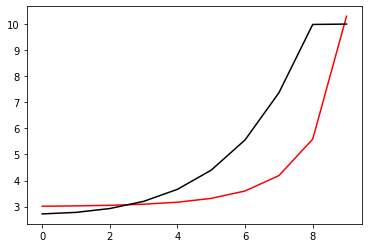

402 3.4260806105255
[2.71986512 2.77847393 2.9253139  3.2002373  3.66118663 4.39831027
 5.55780809 7.36722803 9.9905979  9.99870336]


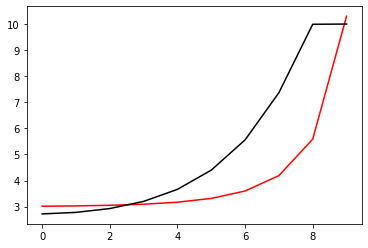

603 0.44049159177809666
[2.72007368 2.77852694 2.92503924 3.19959052 3.66034059 4.39774429
 5.55840364 7.37036813 9.99771275 9.99972674]


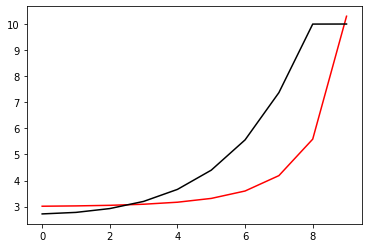

804 0.4154932632912824
[ 2.72027561  2.77856293  2.92474915  3.19893078  3.65947863  4.39714962
  5.55894719  7.37342583 10.00471425 10.00067998]


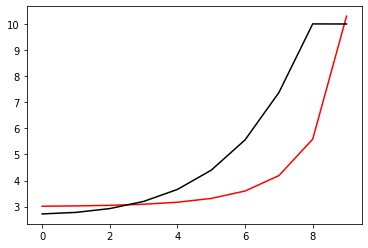

1005 4.674979450278799
[ 2.72052969  2.77864951  2.92451893  3.19834432  3.65870182  4.39664641
  5.55958003  7.37655976 10.01177027 10.00158491]


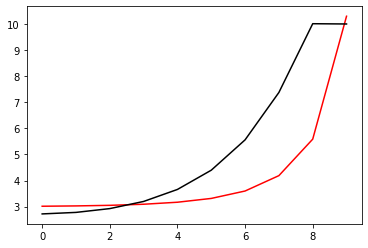

1206 1.4216376881347337
[ 2.72080101  2.77874404  2.92429443  3.19776304  3.6579243   4.39612595
  5.56016683  7.37961039 10.01870625 10.00253119]


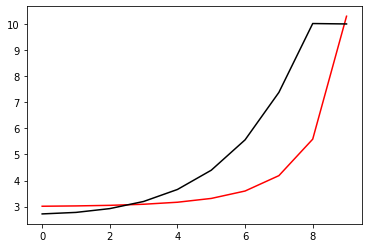

1407 0.4487431138899704
[ 2.72103569  2.77879897  2.92403296  3.19714973  3.6571161   4.39556816
  5.56070021  7.38258375 10.02553885 10.00352694]


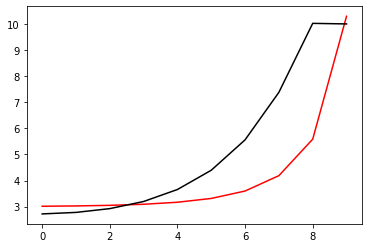

1608 2.3850729146161465
[ 2.7212494   2.77883094  2.92375076  3.19651976  3.65629134  4.39498515
  5.56118901  7.38548438 10.03226868 10.00449978]


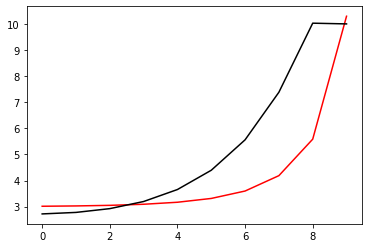

1809 1.4077146230526567
[ 2.72146005  2.77885951  2.92346767  3.19589233  3.6554678   4.39439199
  5.56164379  7.38831695 10.03889524 10.00539537]


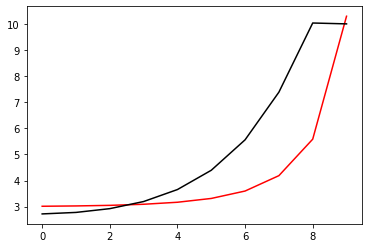

2010 1.5594459798662934
[ 2.72179935  2.77901748  2.923316    3.19539762  3.65477141  4.39390653
  5.56216833  7.39116588 10.04548444 10.00624357]


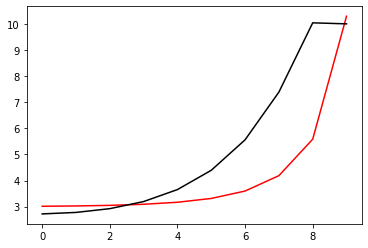

2211 1.4272452258934627
[ 2.72210691  2.77914402  2.9231356   3.19487802  3.65405051  4.39338875
  5.56264216  7.39393641 10.05196543 10.00712396]


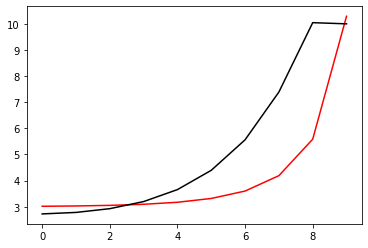

2412 3.4298967470548463
[ 2.72237878  2.7792363   2.92292452  3.19433229  3.65330486  4.39283984
  5.56306815  7.39663284 10.05834342 10.00804936]


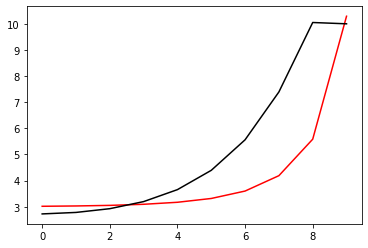

2613 0.442346953225803
[ 2.72259003  2.77927449  2.92266734  3.19374901  3.65252725  4.39225747
  5.56344942  7.39926339 10.06463024 10.00895746]


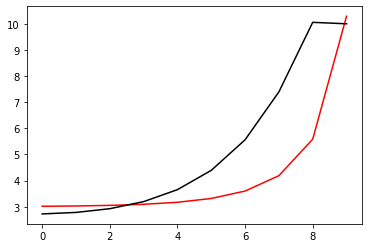

2814 0.4193663378602229
[ 2.72278533  2.77929791  2.92239836  3.19315751  3.65174188  4.39166002
  5.56379744  7.40183205 10.07082375 10.00979806]


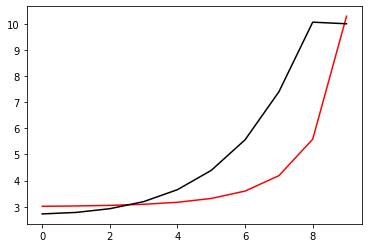

3015 4.64585658684753
[ 2.72302606  2.77937413  2.92219325  3.19264418  3.65104968  4.39116743
  5.56425341  7.40449768 10.07709239 10.01059419]


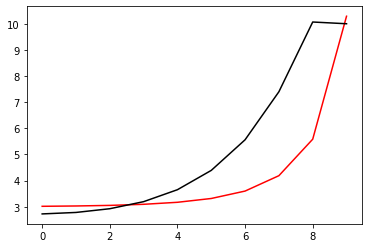

3216 1.4257806355844471
[ 2.72328033  2.77946055  2.92199705  3.19213891  3.65036146  4.39066663
  5.56467748  7.40709703 10.08325885 10.01143503]


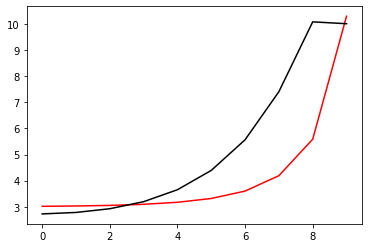

3417 0.44841353052980126
[ 2.72349559  2.77950958  2.9217671   3.19160449  3.64964684  4.39013661
  5.5650608   7.40963426 10.08933745 10.01232743]


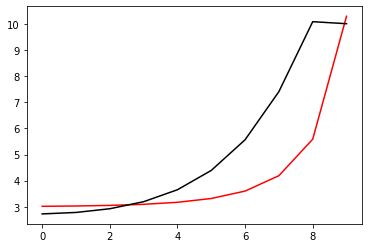

3618 2.385920956353764
[ 2.72368502  2.77953407  2.92151573  3.19105243  3.64891622  4.3895862
  5.56540998  7.41211325 10.0953297  10.01319813]


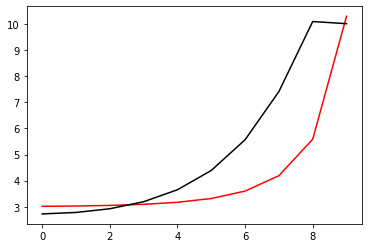

3819 1.4112828571795457
[ 2.7238689   2.77955495  2.92126387  3.19050276  3.64818764  4.38902995
  5.56573437  7.41453715 10.10123347 10.01399332]


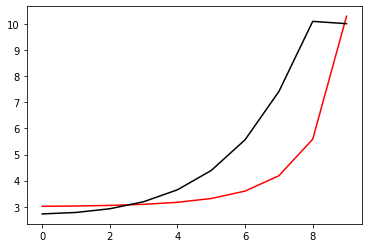

4020 1.5587230386962023
[ 2.72417965  2.77970484  2.92114317  3.19008464  3.64758529  4.38858305
  5.5661342   7.41698655 10.10711123 10.01474367]


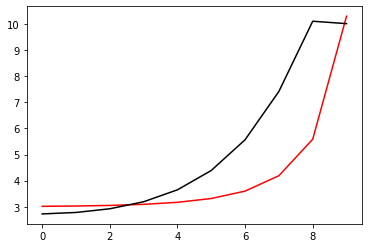

4221 1.4308171434842751
[ 2.72445704  2.77982263  2.9209933   3.18964059  3.64695806  4.38810658
  5.56649084  7.41936905 10.1128944  10.01552828]


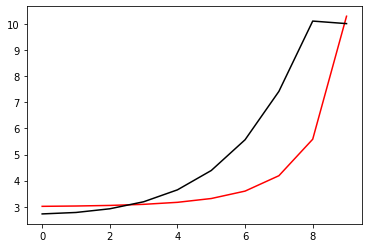

4422 3.4331822088667248
[ 2.7246973   2.77990535  2.92081195  3.189169    3.64630522  4.38760104
  5.56680632  7.42168814 10.11858745 10.01635927]


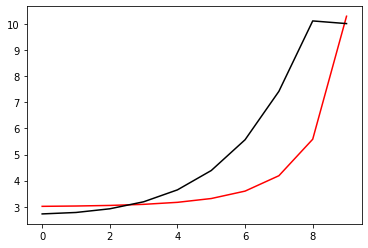

4623 0.4441384218934291
[ 2.72487775  2.77993488  2.92058509  3.18865966  3.64562044  4.38706447
  5.56708356  7.42395134 10.12420119 10.01717418]


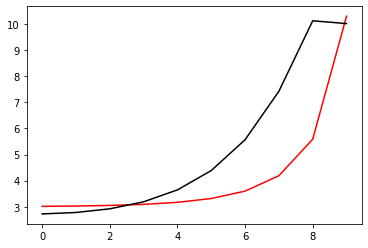

4824 0.4227543653220945
[ 2.72504171  2.77994916  2.92034571  3.18814071  3.6449268   4.38651414
  5.56733309  7.42616219 10.12973354 10.01792319]


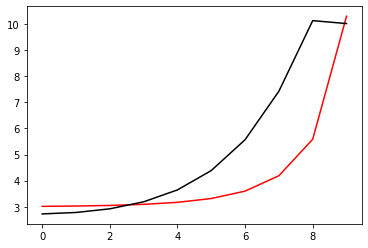

5025 4.620201028817657
[ 2.72525113  2.78001647  2.92017041  3.18769987  3.64432685  4.38607167
  5.56769739  7.42848012 10.135353   10.01862977]


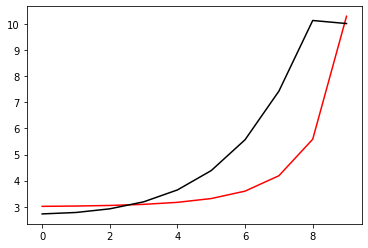

5226 1.4294483932959914
[ 2.72547594  2.78009527  2.9200045   3.18726656  3.64373018  4.38562204
  5.56803443  7.43074022 10.14088113 10.01938306]


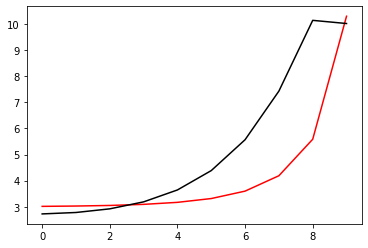

5427 0.44851928643905115
[ 2.72566339  2.78013802  2.91980557  3.18680401  3.64310688  4.38514453
  5.56833525  7.4329459  10.14633098 10.0201892 ]


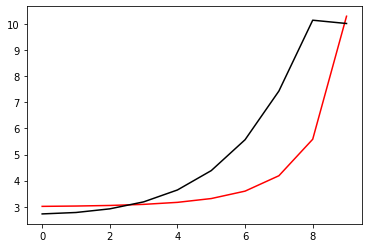

5628 2.3865220030363963
[ 2.72582371  2.78015454  2.91958298  3.18632096  3.64246497  4.38464617
  5.56860557  7.43510135 10.15170532 10.02097427]


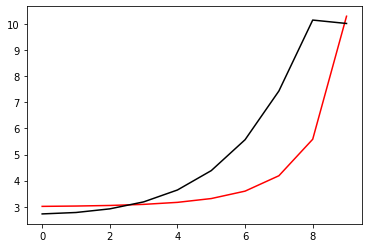

5829 1.4144789306609398
[ 2.7259787   2.78016724  2.91935901  3.18583867  3.64182341  4.38414195
  5.56885453  7.43720903 10.15700113 10.02168497]


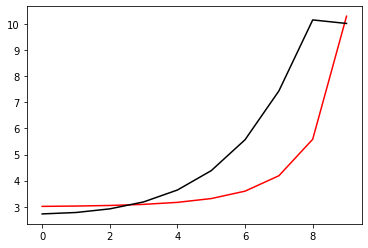

6030 1.5583849478380516
[ 2.72626116  2.78030897  2.91926533  3.185486    3.64130564  4.38374554
  5.56918007  7.43934689 10.16227839 10.02235277]


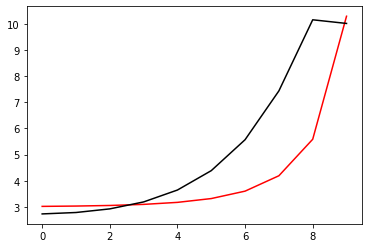

6231 1.4340130978358223
[ 2.72651015  2.78041806  2.91914123  3.18510548  3.64076109  4.3833193
  5.56946559  7.44142495 10.16747077 10.02305636]


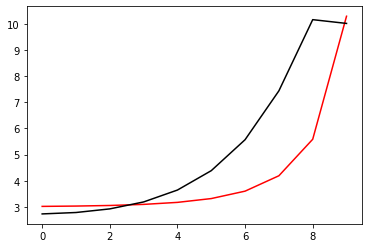

6432 3.436142642458249
[ 2.72672176  2.78049141  2.91898433  3.18469545  3.64018898  4.38286358
  5.56971286  7.44344638 10.17258239 10.02380725]


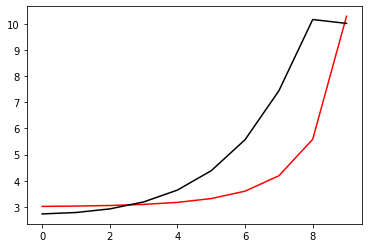

6633 0.4458617708983915
[ 2.72687503  2.78051243  2.91878194  3.18424687  3.63958394  4.38237709
  5.56992502  7.44541844 10.17762342 10.02454281]


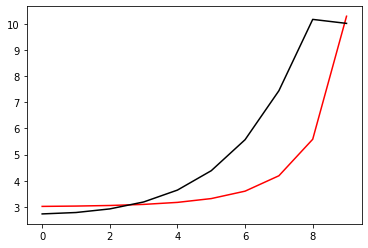

6834 0.4258071325464492
[ 2.72701198  2.78051795  2.91856609  3.18378707  3.63896834  4.38187648
  5.57011212  7.44734453 10.18259201 10.02521365]


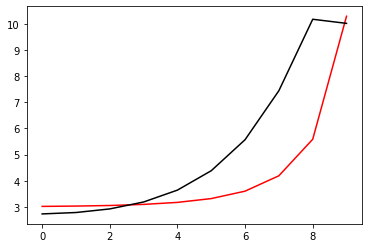

7035 4.597164031649996
[ 2.72719472  2.78057673  2.91841419  3.18340494  3.63844629  4.381485
  5.57041795  7.44938471 10.18765673 10.02584374]


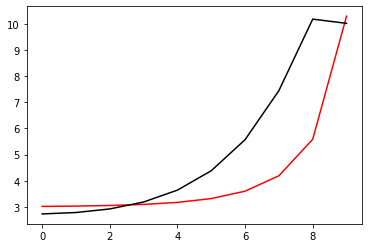

7236 1.4327825175916922
[ 2.72739505  2.78064844  2.91827213  3.18302982  3.63792655  4.38108626
  5.57069897  7.45137294 10.1926385  10.02652215]


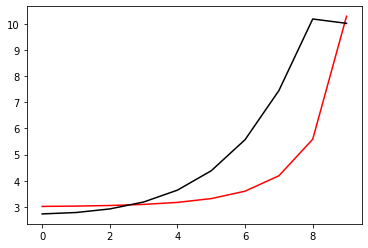

7437 0.4489277791766914
[ 2.72755965  2.78068533  2.91809755  3.18262519  3.63737961  4.38065987
  5.57094625  7.45331218 10.19754938 10.02725435]


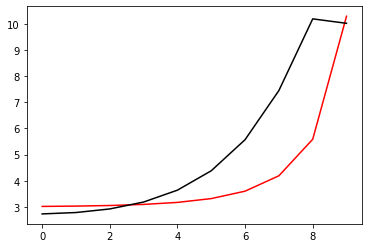

7638 2.3869557041327085
[ 2.72769611  2.78069457  2.91789725  3.18219745  3.63681152  4.38021148
  5.57116491  7.45520699 10.20239333 10.02796588]


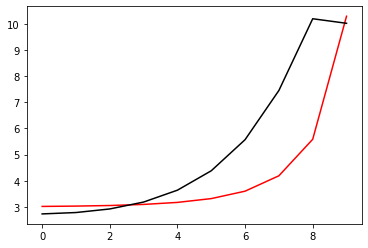

7839 1.417378757180669
[ 2.72782755  2.78069994  2.91769487  3.18176908  3.63624218  4.37975657
  5.57136407  7.45705933 10.20716654 10.02860392]


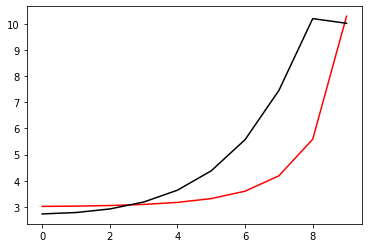

8040 1.5582775796896537
[ 2.7280871   2.78083449  2.9176221   3.18146874  3.63579443  4.37940763
  5.57163981  7.45894498 10.21192698 10.02920068]


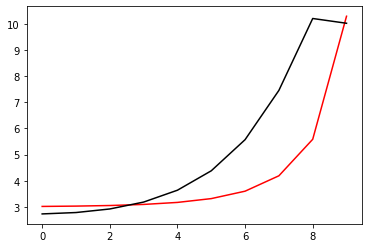

8241 1.4369098853785498
[ 2.72831312  2.78093601  2.9175179   3.18113893  3.63531819  4.37902816
  5.57187737  7.4607761  10.21661027 10.02983451]


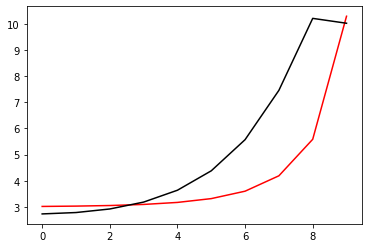

8442 3.4388382610242476
[ 2.72850156  2.78100126  2.91737981  3.18077796  3.63481264  4.37861846
  5.57207838  7.46255565 10.22122025 10.0305163 ]


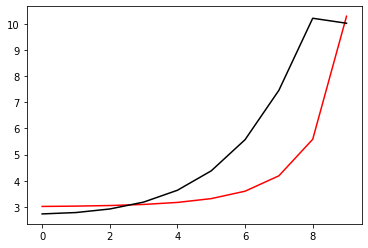

8643 0.4475106102930396
[ 2.72863291  2.78101499  2.91719634  3.18037785  3.63427332  4.37817786
  5.57224622  7.46429071 10.22576662 10.03118329]


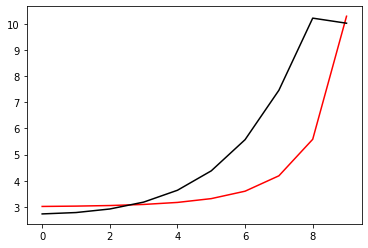

8844 0.428582216637514
[ 2.72874809  2.78101306  2.91699869  3.17996523  3.633722    4.37772253
  5.57239061  7.4659846  10.23024772 10.03178651]


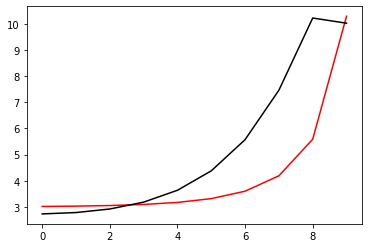

9045 4.576327478949496
[ 2.72890919  2.78106452  2.9168649   3.17962998  3.63326408  4.37737713
  5.57265648  7.46779794 10.23483221 10.03235038]


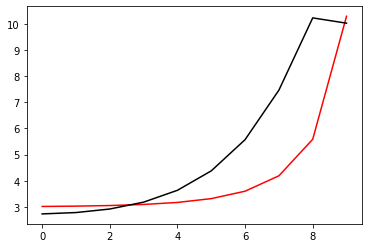

9246 1.4358357632026888
[ 2.72908992  2.78113034  2.91674156  3.17930152  3.63280779  4.37702422
  5.5728991   7.46956383 10.23934051 10.03296395]


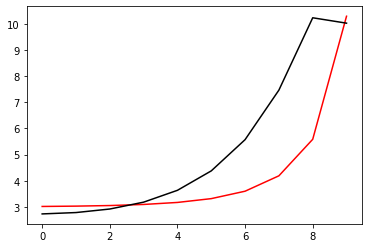

9447 0.44953238077860563
[ 2.72923628  2.78116242  2.91658623  3.17894343  3.63232383  4.37664365
  5.57310956  7.47128485 10.24378391 10.03363203]


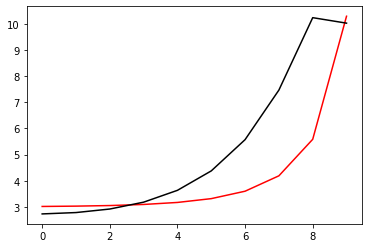

9648 2.3872594305657375
[ 2.72935346  2.78116557  2.91640343  3.17856007  3.63181655  4.37623989
  5.57329258  7.47296594 10.2481674  10.03427968]


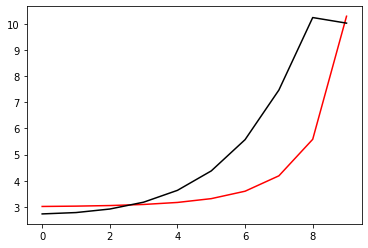

9849 1.4200250880238854
[ 2.72946587  2.78116483  2.91621803  3.17817501  3.63130674  4.37582889
  5.57345721  7.47460859 10.25248651 10.03485456]


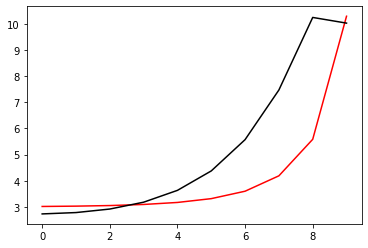

In [133]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, Positive[i%10], Negative[i%10]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 1.4390195667623484
[ 2.73016268  2.78147076  2.9160086   3.17744862  3.63019605  4.37467238
  5.57296866  7.47624954 10.25836587 10.03559425]


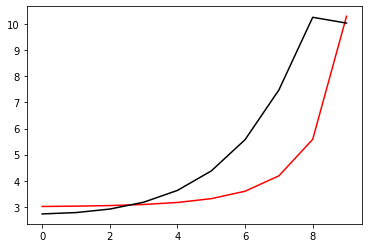

402 3.4408798945562604
[ 2.73024923  2.78152793  2.91593557  3.17721195  3.6298531   4.37442359
  5.57325834  7.47793769 10.26262819 10.03622639]


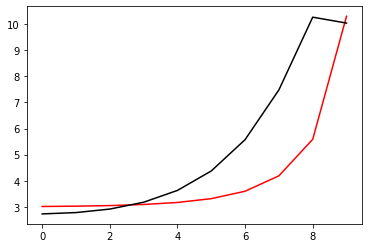

603 0.44889946852576396
[ 2.73029837  2.78152972  2.91580509  3.17691734  3.62945287  4.37411941
  5.57349472  7.47957019 10.26682408 10.03684571]


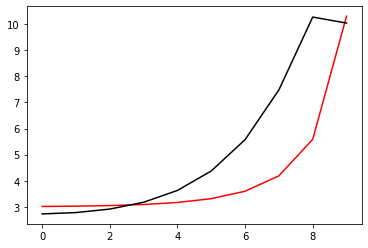

804 0.43080718185483574
[ 2.73034661  2.78151365  2.91565055  3.17659518  3.62902195  4.3737807
  5.57369033  7.48115024 10.27094933 10.03740045]


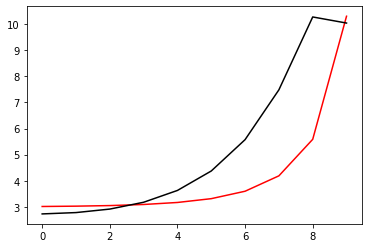

1005 4.559281142432787
[ 2.73045219  2.78154986  2.91555211  3.17633882  3.62867037  4.37353712
  5.57399435  7.482841   10.27517357 10.03791478]


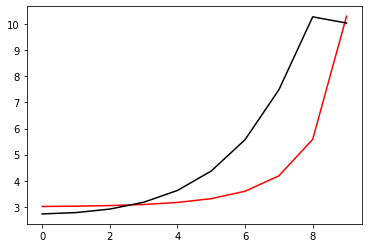

1206 1.4383146302775258
[ 2.73058841  2.78160183  2.91545908  3.17608049  3.62830916  4.37327382
  5.57426427  7.4844775  10.27931898 10.0384784 ]


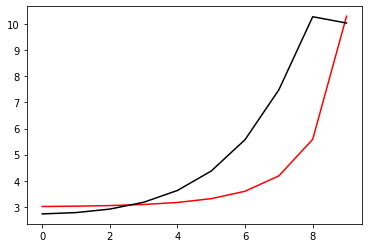

1407 0.4501386129469211
[ 2.73069852  2.78162148  2.91533012  3.17578555  3.6279114   4.37297328
  5.57449357  7.48606402 10.28339776 10.03909633]


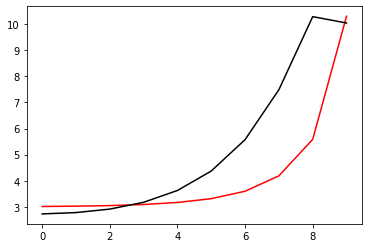

1608 2.38739229769799
[ 2.730784    2.78161183  2.91516881  3.17545799  3.62748175  4.37264094
  5.57468854  7.48760741 10.28741703 10.03969346]


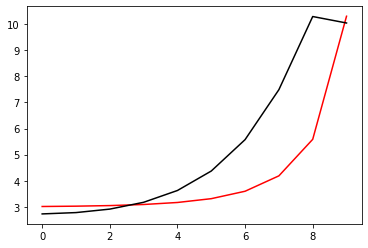

1809 1.422257055329035
[ 2.73086906  2.78159911  2.91500192  3.17512351  3.62704314  4.37229476
  5.57485974  7.48911011 10.29137282 10.04021786]


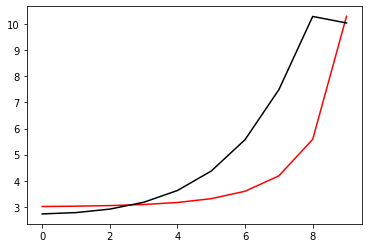

2010 1.5585551260945598
[ 2.7310865   2.78171693  2.9149621   3.17491158  3.62671883  4.37204681
  5.57510186  7.4906458  10.29532091 10.04070299]


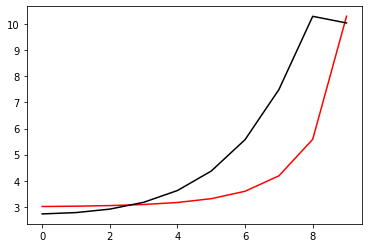

2211 1.4417751710784261
[ 2.73127255  2.7818018   2.91488787  3.17466501  3.62635997  4.3717631
  5.57530378  7.49213067 10.29920059 10.04122677]


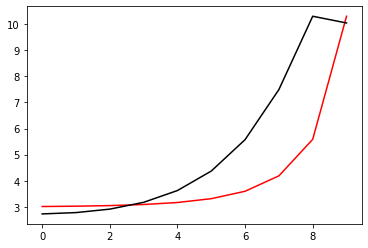

2412 3.4433953247169935
[ 2.7314223   2.78185021  2.91477701  3.1743826   3.62596638  4.37144462
  5.57546774  7.49356808 10.3030159  10.04179913]


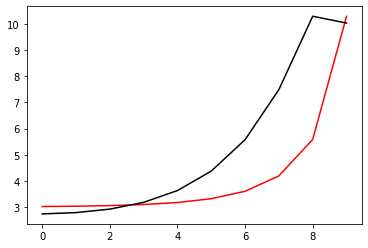

2613 0.4504670414577277
[ 2.7315182   2.781849    2.91462029  3.17405855  3.62553556  4.37109229
  5.57559816  7.49496542 10.30677625 10.04235711]


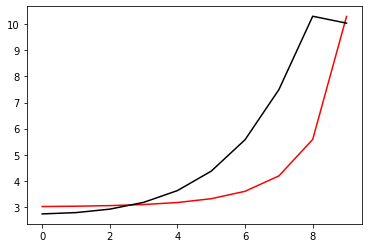

2814 0.43327843827177526
[ 2.73159905  2.78183245  2.91444784  3.17371878  3.62508884  4.37072209
  5.5757048   7.49632637 10.31048069 10.04285252]


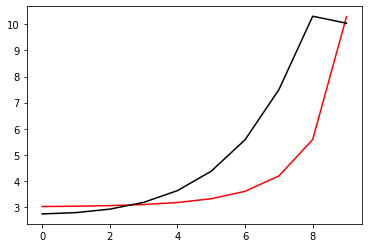

3015 4.5412677083382365
[ 2.7317263   2.78186963  2.91433859  3.17345479  3.62473384  4.37046119
  5.57593473  7.49781271 10.31429821 10.04331067]


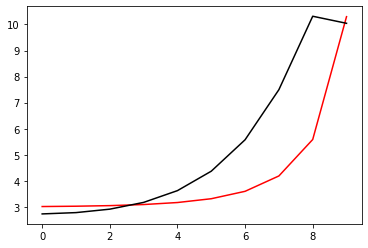

3216 1.4410495586680485
[ 2.73187733  2.78192427  2.914241    3.17319686  3.62437856  4.37019106
  5.57614185  7.49925659 10.31804882 10.04382053]


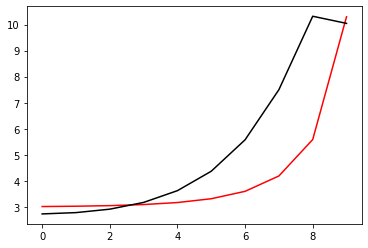

3417 0.45099647322739134
[ 2.73199643  2.78194723  2.9141122   3.17290863  3.62399407  4.36989197
  5.57631751  7.50066026 10.32174287 10.04438585]


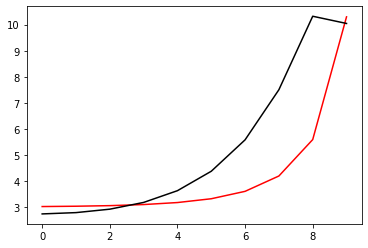

3618 2.3875601659586367
[ 2.73208478  2.78193934  2.91395306  3.1725912   3.62358209  4.36956673
  5.57646596  7.5020295  10.32538714 10.04493088]


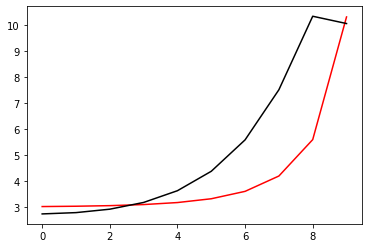

3819 1.4245359037895442
[ 2.73216887  2.78192784  2.91379065  3.17227024  3.62316508  4.36923229
  5.57659642  7.50336518 10.32897614 10.04540418]


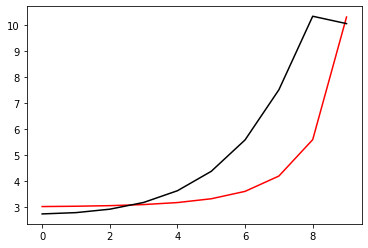

4020 1.558727238944144
[ 2.73238232  2.78204612  2.91375681  3.17207408  3.62286471  4.36899871
  5.57680118  7.5047386  10.33256356 10.04583974]


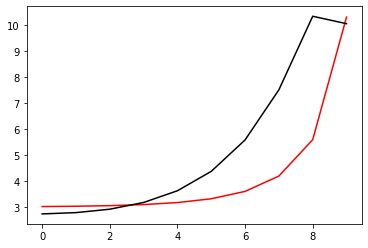

4221 1.4440453290529551
[ 2.73256206  2.78213071  2.91368971  3.17184522  3.622532    4.36873214
  5.57696967  7.50606672 10.33608938 10.0463151 ]


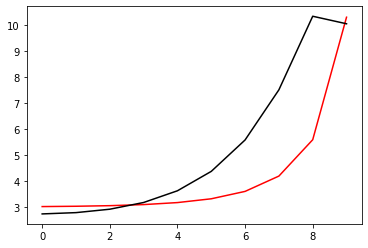

4422 3.44551981746836
[ 2.73270353  2.78217801  2.91358666  3.17158186  3.62216612  4.36843285
  5.57710338  7.50735218 10.33955703 10.04683961]


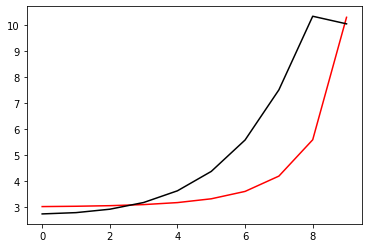

4623 0.45189573731734173
[ 2.73279074  2.78217586  2.91343898  3.17127855  3.6217647   4.36810167
  5.57720636  7.5086018  10.34297522 10.04735011]


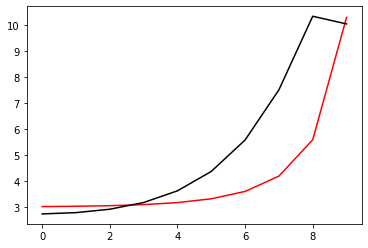

4824 0.435446660207471
[ 2.73286188  2.78215784  2.91327594  3.17096033  3.62134827  4.36775383
  5.57728778  7.50981888 10.34634287 10.04779875]


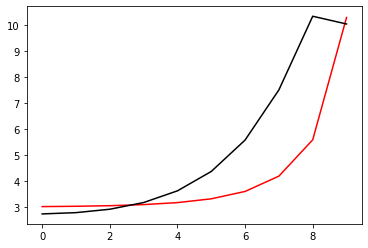

5025 4.525271649865429
[ 2.73297836  2.78219297  2.91317646  3.1707189   3.62102486  4.36751701
  5.57749505  7.51116525 10.34982882 10.0482112 ]


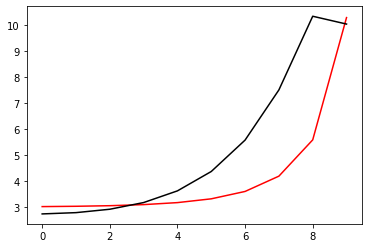

5226 1.4434726411182537
[ 2.73311967  2.7822465   2.91308981  3.17048476  3.62070219  4.36727193
  5.5776812   7.51247232 10.35325254 10.04867634]


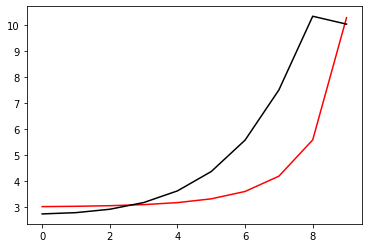

5427 0.4518434585724122
[ 2.73322943  2.78226876  2.9129727   3.1702212   3.62035107  4.36699871
  5.57783729  7.51374193 10.35662381 10.04919739]


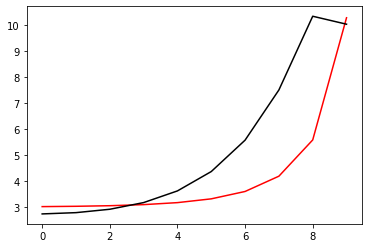

5628 2.3876186347586437
[ 2.73330716  2.78225887  2.9128242   3.16992767  3.61997184  4.36669916
  5.5779672   7.51498004 10.35995007 10.04969826]


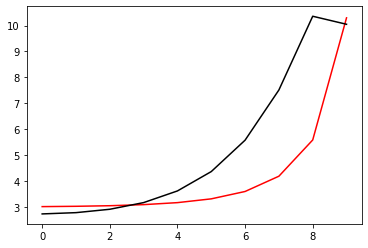

5829 1.4266090312330741
[ 2.73338044  2.78224512  2.91267233  3.16963062  3.61958753  4.36639051
  5.57807999  7.51618705 10.36322518 10.05012788]


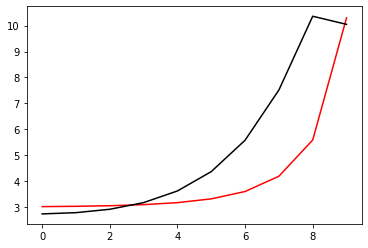

6030 1.559013278842262
[ 2.733583    2.78236095  2.91264881  3.16945807  3.61931931  4.36618197
  5.57826681  7.517433   10.3665017  10.05052072]


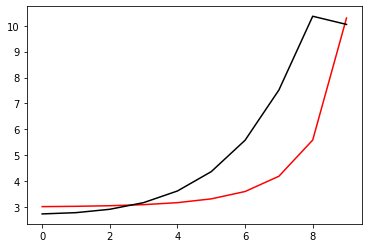

6231 1.4461082879332654
[ 2.73375159  2.78244272  2.91259168  3.16925252  3.61901846  4.36594038
  5.57841813  7.51863601 10.36972064 10.0509541 ]


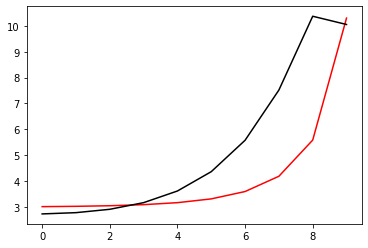

6432 3.4474594784904644
[ 2.73388159  2.78248676  2.91249814  3.16901206  3.61868404  4.36566589
  5.5785353   7.51979857 10.3728853  10.0514369 ]


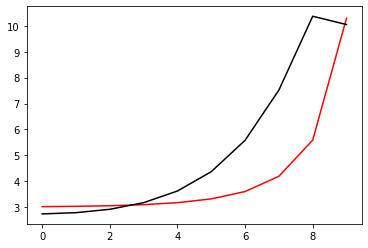

6633 0.4532396930421366
[ 2.73395798  2.78248178  2.91236024  3.16873182  3.61831416  4.36535966
  5.57862251  7.52092741 10.3760041  10.05190586]


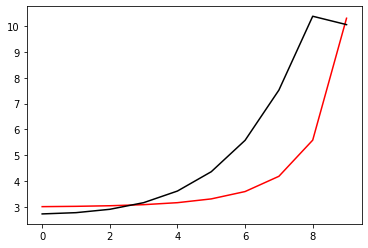

6834 0.43743361742236125
[ 2.73401824  2.78246073  2.91220672  3.16843637  3.61792895  4.36503661
  5.57868871  7.52202576 10.37907608 10.05231342]


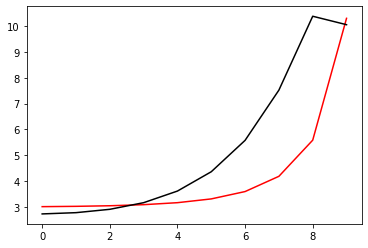

7035 4.510652301718356
[ 2.73412339  2.78249247  2.91211652  3.16821769  3.61763698  4.36482511
  5.57888191  7.52325574 10.38227012 10.05268564]


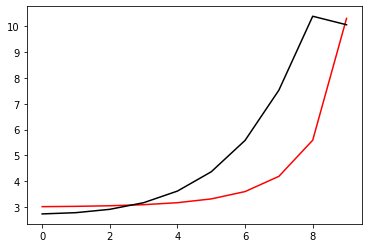

7236 1.4457036513798003
[ 2.73425489  2.78254377  2.91203997  3.16800682  3.61734597  4.3646055
  5.57905459  7.52444832 10.38540542 10.05311134]


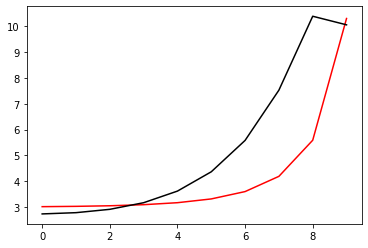

7437 0.45270102944554125
[ 2.73435554  2.78256436  2.91193336  3.16776679  3.61702664  4.36435784
  5.57919775  7.52560514 10.3884914  10.05359328]


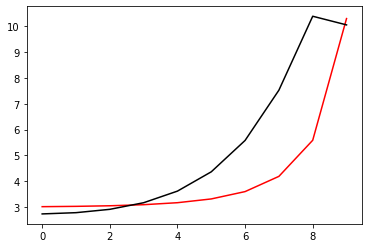

7638 2.3876168164846097
[ 2.73442324  2.78255177  2.91179421  3.16749562  3.61667816  4.36408322
  5.57931504  7.52673243 10.39153614 10.05405504]


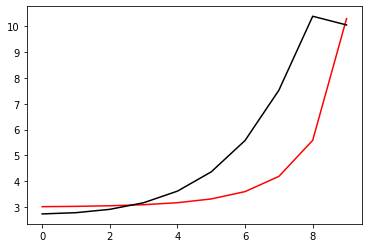

7839 1.4285202577344718
[ 2.73448655  2.78253526  2.91165149  3.1672206   3.6163242   4.36379919
  5.5794155   7.52783028 10.39453303 10.05444591]


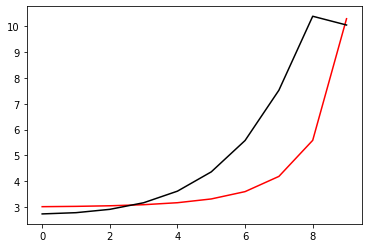

8040 1.5593445183856156
[ 2.73467922  2.78264831  2.91163689  3.16706961  3.61608558  4.36361436
  5.57958936  7.52896768 10.39753365 10.05480085]


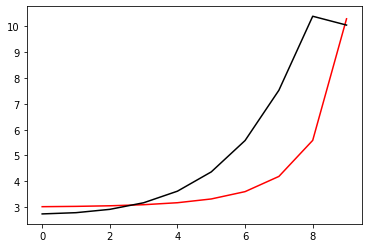

8241 1.448008308140574
[ 2.73483784  2.78272709  2.91158831  3.16688514  3.61581383  4.36339616
  5.57972806  7.53006384 10.40048    10.05519697]


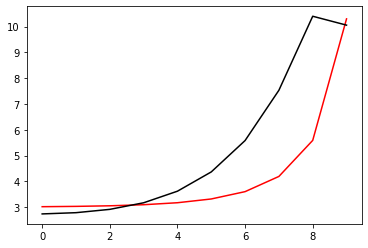

8442 3.449249741216028
[ 2.73495763  2.78276781  2.91150288  3.16666521  3.61550794  4.3631447
  5.5798329   7.53112117 10.40337527 10.05564269]


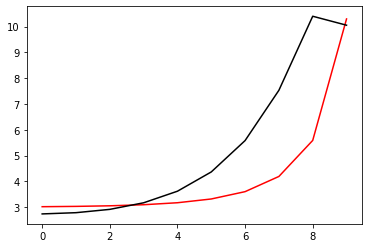

8643 0.45450762843313947
[ 2.73502448  2.78275998  2.91137332  3.16640554  3.61516652  4.36286147
  5.57990821  7.53214633 10.40622769 10.05607466]


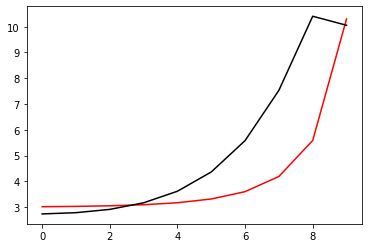

8844 0.43926769809333815
[ 2.73507516  2.78273597  2.91122789  3.16613029  3.61480934  4.36256115
  5.57996281  7.53314255 10.4090364  10.05644563]


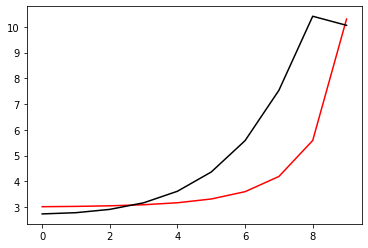

9045 4.497213558208598
[ 2.73517029  2.7827644   2.91114553  3.16593168  3.61454546  4.36237272
  5.58014526  7.53427224 10.41197034 10.05678201]


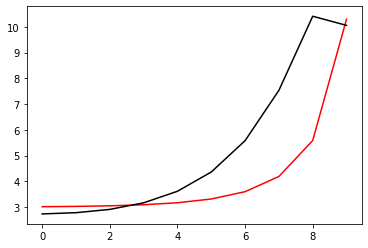

9246 1.447770845512022
[ 2.73529323  2.78281357  2.91107763  3.16574133  3.61428273  4.36217627
  5.5803076   7.53536601 10.41484851 10.05717256]


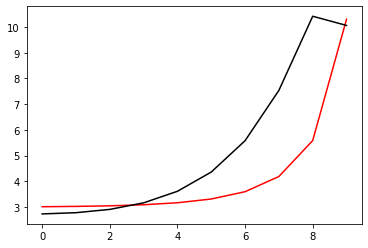

9447 0.45355771356369845
[ 2.73538596  2.78283255  2.91098003  3.16552199  3.6139917   4.36195177
  5.58044075  7.53642532 10.41767999 10.05761962]


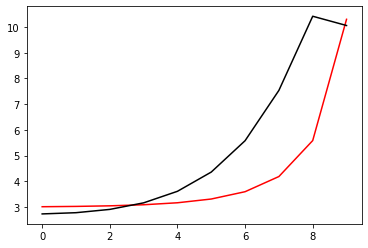

9648 2.3875696125168835
[ 2.73544489  2.78281743  2.91084886  3.16527044  3.61367051  4.36169967
  5.58054819  7.53745669 10.42047351 10.05804646]


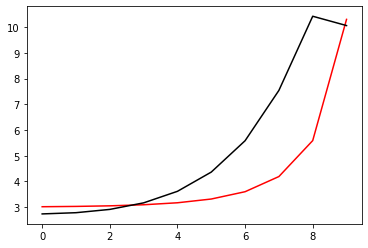

9849 1.4302886536862902
[ 2.73549949  2.78279838  2.91071398  3.16501474  3.61334346  4.36143785
  5.58063896  7.53845991 10.42322199 10.05840274]


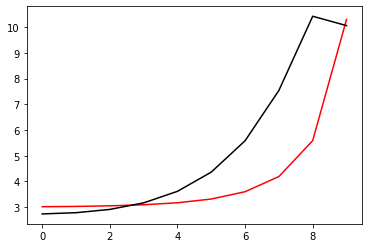

In [134]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, Positive[i%10], Negative[i%10]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 1.4492328058959363
[ 2.73608911  2.7830779   2.91059877  3.16451016  3.61252932  4.36049651
  5.57996336  7.53895046 10.42638216 10.05876965]


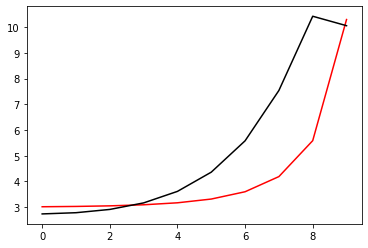

402 3.4504857912980254
[ 2.73610979  2.78311298  2.91057607  3.16440339  3.61236896  4.36039729
  5.58018581  7.54002412 10.42912481 10.05919268]


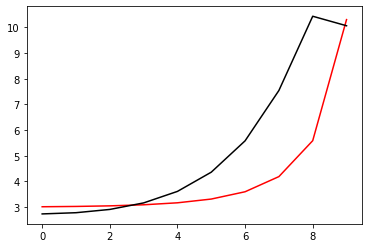

603 0.45549081200039376
[ 2.7361001   2.78309528  2.91049515  3.16423527  3.61214635  4.36023844
  5.5803551   7.54105028 10.43181687 10.05960349]


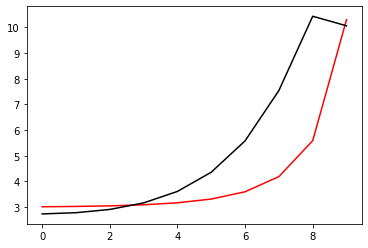

804 0.440668743115065
[ 2.73609157  2.78305929  2.91038713  3.16403465  3.61188715  4.36004033
  5.58048357  7.54203244 10.43445518 10.05995181]


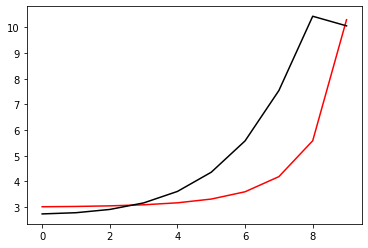

1005 4.486627334253482
[ 2.73613968  2.78307432  2.91033296  3.16389722  3.61170518  4.35993715
  5.58072429  7.54313599 10.43721027 10.06026361]


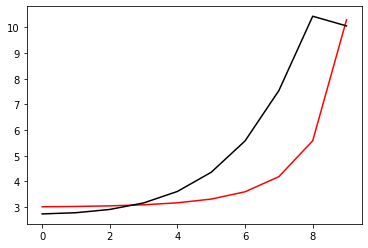

1206 1.4493749304055314
[ 2.73622689  2.78311139  2.91028751  3.16375845  3.61151229  4.35981279
  5.5809325   7.54419408 10.43990326 10.0606285 ]


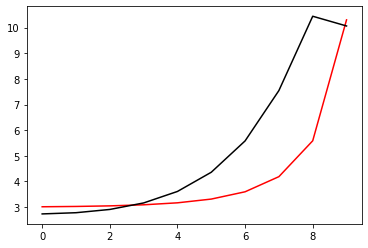

1407 0.4542589877706816
[ 2.73629214  2.78311963  2.91020789  3.16358307  3.61128165  4.35965011
  5.58110184  7.54521028 10.44254476 10.06104935]


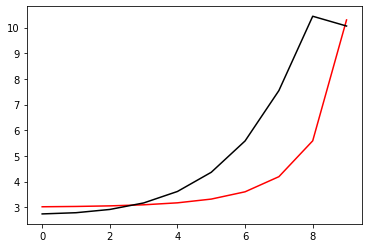

1608 2.38744558983174
[ 2.73632862  2.78309397  2.91009018  3.16336841  3.61101257  4.35945127
  5.58123778  7.54619317 10.44514549 10.06144947]


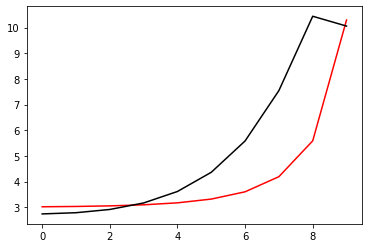

1809 1.431746849637865
[ 2.73636505  2.78306539  2.9099659   3.16314452  3.61073146  4.35923617
  5.58135102  7.5471437  10.44769918 10.06177873]


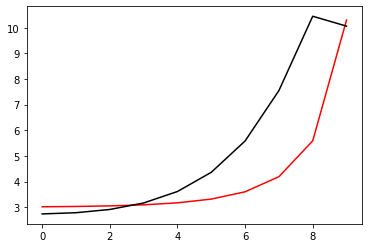

2010 1.5601072402152907
[ 2.73653424  2.78316746  2.90996756  3.16304027  3.61056005  4.35911399
  5.58153184  7.54813046 10.45025691 10.06207284]


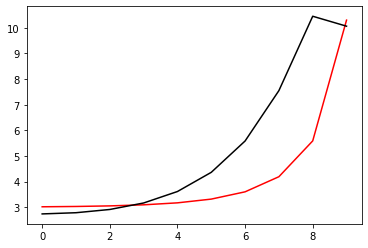

2211 1.4512111890537975
[ 2.73667154  2.78323583  2.90993319  3.16289869  3.61035092  4.3589539
  5.58167401  7.54907514 10.4527629  10.06240873]


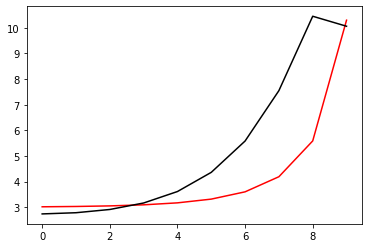

2412 3.4522816555379534
[ 2.73677133  2.78326641  2.90986018  3.16271836  3.61010375  4.35875678
  5.58177957  7.54998077 10.45522083 10.06279425]


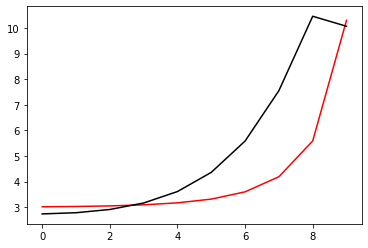

2613 0.45671942413181243
[ 2.73682046  2.78324989  2.9097427   3.16249643  3.60981849  4.35852528
  5.58185372  7.55085446 10.45763902 10.06316592]


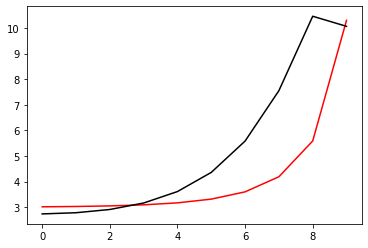

2814 0.44238597098959126
[ 2.73685431  2.78321763  2.90960847  3.16225687  3.60951488  4.35827421
  5.58190557  7.55169986 10.46001721 10.06347706]


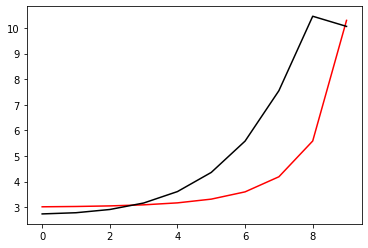

3015 4.474451599521647
[ 2.73693226  2.78323755  2.90953643  3.16209246  3.60930306  4.35813394
  5.58208494  7.55268016 10.46252465 10.06375467]


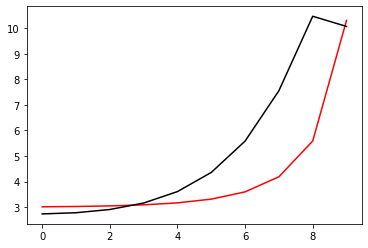

3216 1.4513036405777207
[ 2.73704109  2.78328073  2.90948016  3.16193633  3.60909154  4.3579845
  5.58224351  7.55362568 10.46498026 10.06408749]


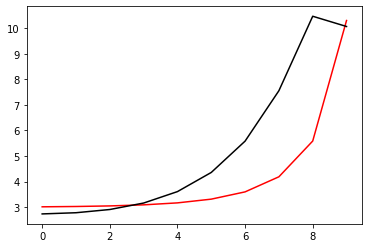

3417 0.4551465525787442
[ 2.73712108  2.78329502  2.90939475  3.16175085  3.60885075  4.35780592
  5.58237228  7.55453781 10.46739281 10.06447712]


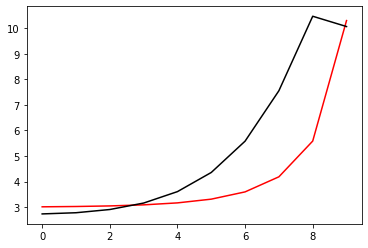

3618 2.3873779460582147
[ 2.73716607  2.78327394  2.90927402  3.1615308   3.6085773   4.35759775
  5.58247466  7.55542372 10.46977221 10.06484638]


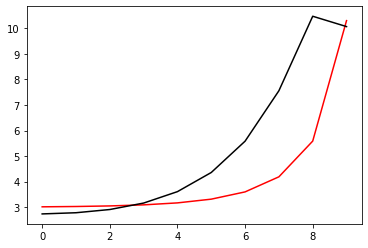

3819 1.4333152192408518
[ 2.73720698  2.78324921  2.90914942  3.16130575  3.60829669  4.35737859
  5.5825598   7.55628281 10.47211066 10.06514554]


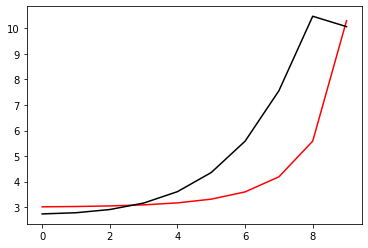

4020 1.5604322571339218
[ 2.73737751  2.78335427  2.90915259  3.16120342  3.60812916  4.35725582
  5.58271603  7.55718184 10.47445765 10.06541071]


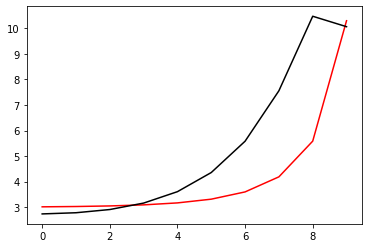

4221 1.4527671139425653
[ 2.73751386  2.78342485  2.90912113  3.16106631  3.6079268   4.35709828
  5.58283703  7.55804258 10.4767575  10.06571849]


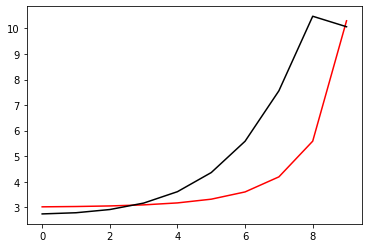

4422 3.453747474041008
[ 2.73761088  2.78345685  2.90905193  3.16089231  3.60768858  4.35690606
  5.58292411  7.55886739 10.47901327 10.06607622]


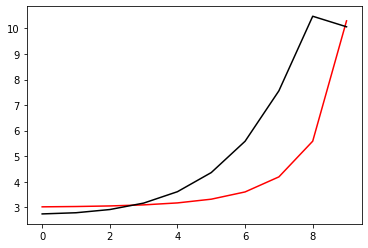

4623 0.457800824522821
[ 2.73765653  2.78344159  2.90893936  3.16067859  3.60741427  4.35668151
  5.58298199  7.55966285 10.48123276 10.06642026]


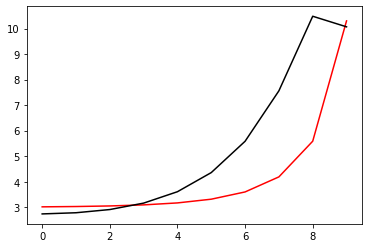

4824 0.4438760762518219
[ 2.73768597  2.78341006  2.90881055  3.16044843  3.60712297  4.3564388
  5.58301927  7.56043225 10.48341542 10.06670419]


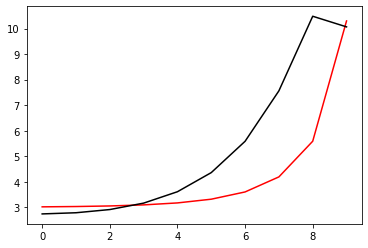

5025 4.463689861196613
[ 2.73775834  2.78342993  2.90874408  3.16029437  3.60692475  4.35630837
  5.58318579  7.56133867 10.48573035 10.06695528]


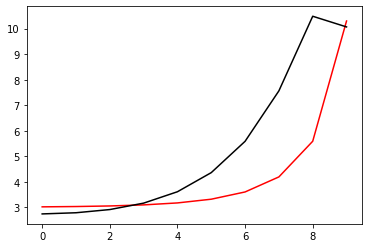

5226 1.4529965470470627
[ 2.73786233  2.78347372  2.90869444  3.16014996  3.60672812  4.35616989
  5.58333271  7.56221199 10.48799609 10.06726218]


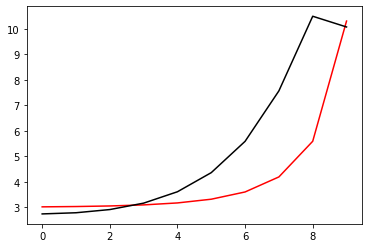

5427 0.4559597320048145
[ 2.73793755  2.78348871  2.90861616  3.15997706  3.60650313  4.3560031
  5.58345077  7.56305327 10.49022106 10.06762611]


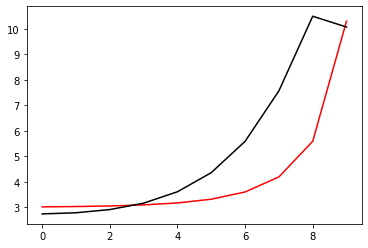

5628 2.387251025692447
[ 2.73797678  2.78346729  2.90850186  3.1597693   3.6062454   4.35580686
  5.58354309  7.56386984 10.49241556 10.06796964]


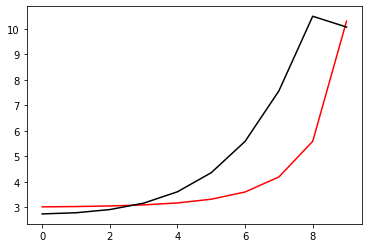

5829 1.434748988122103
[ 2.73801176  2.78344202  2.90838367  3.1595568   3.60598085  4.35559996
  5.58361871  7.56466072 10.4945713  10.06824333]


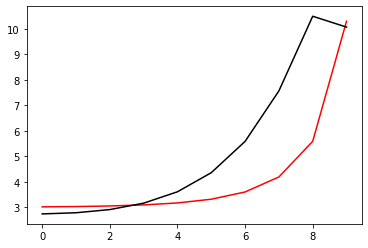

6030 1.5608092802242646
[ 2.73817619  2.78354629  2.90839314  3.15946707  3.60582936  4.35548926
  5.58376527  7.56549192 10.49673712 10.06848364]


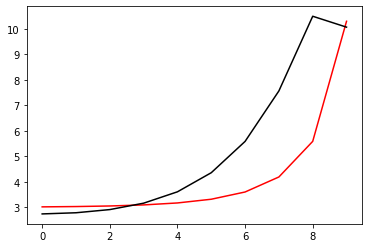

6231 1.4541882009412817
[ 2.73830629  2.78361584  2.9083678   3.15934255  3.60564316  4.35534394
  5.58387703  7.5662859  10.49885791 10.06876697]


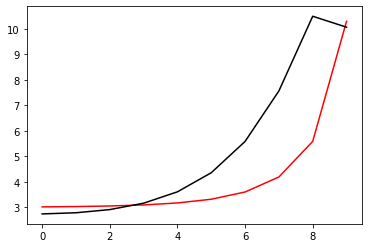

6432 3.4550925549772233
[ 2.73839684  2.78364649  2.90830447  3.15918105  3.60542106  4.355164
  5.58395519  7.56704491 10.50093664 10.06910035]


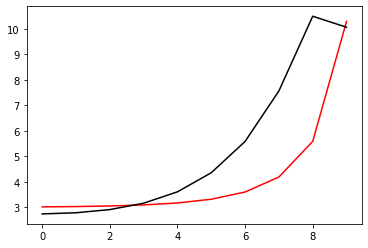

6633 0.4588117463326319
[ 2.73843642  2.78363011  2.90819795  3.15898006  3.60516313  4.35495196
  5.58400454  7.56777546 10.50298095 10.06942003]


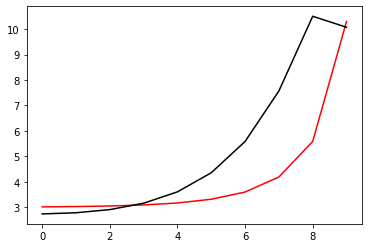

6834 0.4452514102251759
[ 2.73845975  2.78359733  2.90807503  3.15876255  3.60488819  4.3547218
  5.58403356  7.56848083 10.50499036 10.06967985]


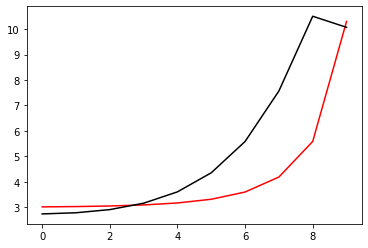

7035 4.453769448229316
[ 2.73852545  2.78361545  2.9080141   3.15862107  3.60470651  4.35460428
  5.5841924   7.56932424 10.50713396 10.06990735]


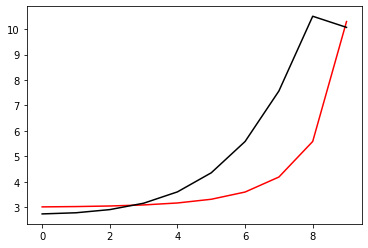

7236 1.45456415303348
[ 2.73862394  2.78365839  2.9079707   3.15848979  3.60452686  4.35447902
  5.58433199  7.57013537 10.50923017 10.07019112]


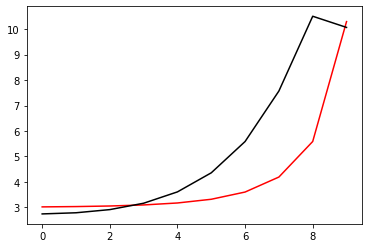

7437 0.456739805452734
[ 2.73869406  2.78367284  2.90789889  3.15833024  3.60431903  4.35432557
  5.58444296  7.57091515 10.51128722 10.07053204]


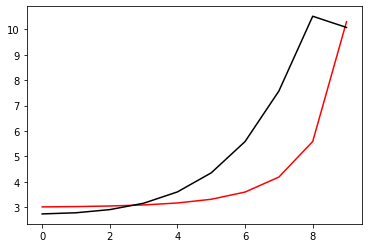

7638 2.3871028612721226
[ 2.73872753  2.78365014  2.90779026  3.1581351   3.6040779   4.35414238
  5.58452833  7.57167112 10.51331583 10.07085248]


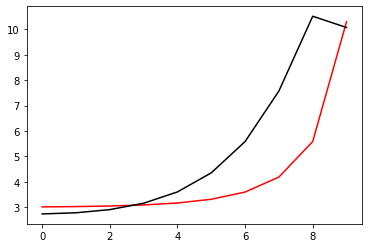

7839 1.4360806870115632
[ 2.73875677  2.78362354  2.90767765  3.15793511  3.60382982  4.35394843
  5.5845971   7.57240207 10.51530737 10.07110327]


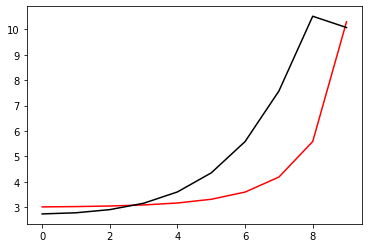

8040 1.5611892208797997
[ 2.73891543  2.78372643  2.90769256  3.15785768  3.60369452  4.35385026
  5.5847364   7.57317343 10.51731012 10.07132119]


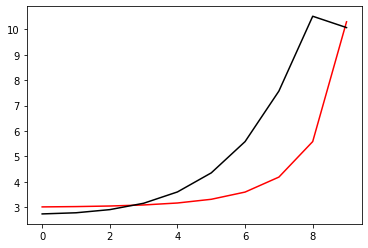

8241 1.4555071512574271
[ 2.73903974  2.78379448  2.90767248  3.15774525  3.6035243   4.35371736
  5.58484104  7.57390827 10.51926954 10.07158251]


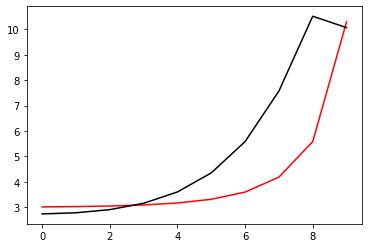

8442 3.4563426586914496
[ 2.73912436  2.78382344  2.90761413  3.15759555  3.60331796  4.3535497
  5.5849122   7.57460882 10.52118856 10.07189392]


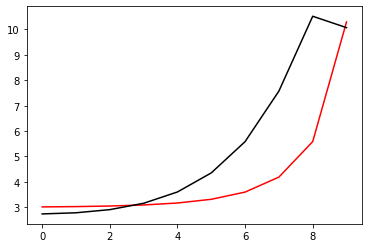

8643 0.4597626139275961
[ 2.73915844  2.78380566  2.90751277  3.15740644  3.60307581  4.35334999
  5.58495474  7.57528157 10.52307469 10.07219161]


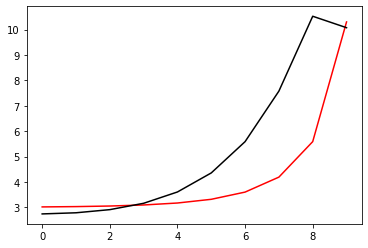

8844 0.44653043546508375
[ 2.73917626  2.78377143  2.90739488  3.15720065  3.6028165   4.35313207
  5.58497708  7.57592978 10.52492755 10.07242963]


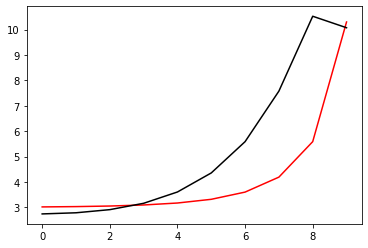

9045 4.444570700118388
[ 2.73923592  2.78378765  2.90733862  3.15707068  3.60265046  4.35302702
  5.58512966  7.57671687 10.52691624 10.07263579]


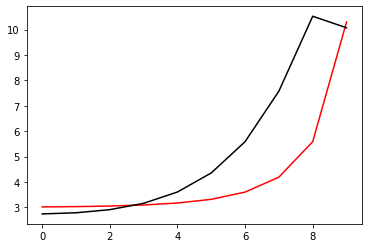

9246 1.4560254039107925
[ 2.73932948  2.7838296   2.90730059  3.15695141  3.60248676  4.3529144
  5.58526323  7.57747231 10.52885907 10.07289864]


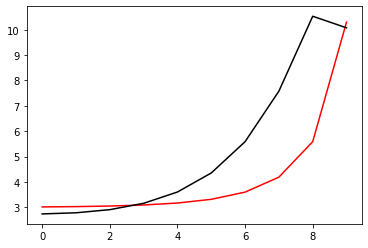

9447 0.4574890598060008
[ 2.73939504  2.78384338  2.90723438  3.15680401  3.60229496  4.35277367
  5.58536832  7.57819694 10.53076411 10.07321874]


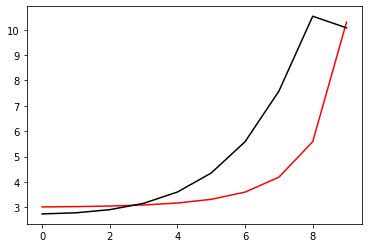

9648 2.386940801503009
[ 2.73942333  2.78381934  2.90713063  3.1566203   3.60206925  4.35260282
  5.58544788  7.57889853 10.53264251 10.07351826]


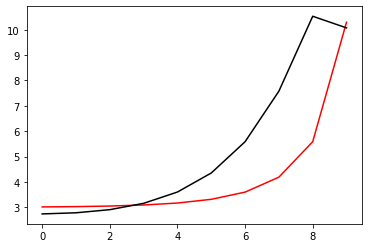

9849 1.4373214208534746
[ 2.73944744  2.78379141  2.90702284  3.15643163  3.60183644  4.3524211
  5.5855109   7.57957563 10.53448529 10.0737483 ]


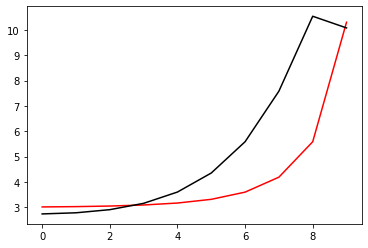

In [135]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, Positive[i%10], Negative[i%10]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 1.4562032412898727
[ 2.73997459  2.78405762  2.90696187  3.15604799  3.60118028  4.351597
  5.58475139  7.57946931 10.53606893 10.0738994 ]


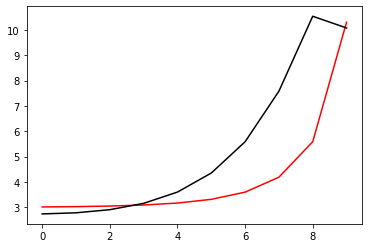

402 3.457088637725171
[ 2.73996004  2.78408131  2.90696669  3.15601025  3.60111646  4.35157973
  5.58494846  7.58022527 10.53792896 10.07420108]


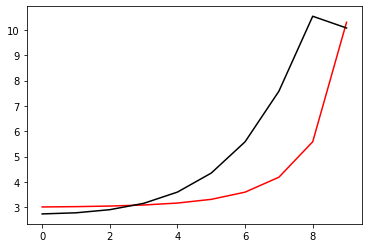

603 0.4604290932414375
[ 2.73991941  2.78405397  2.90691295  3.15590931  3.60098755  4.35150005
  5.58509125  7.58093621 10.53974611 10.07449039]


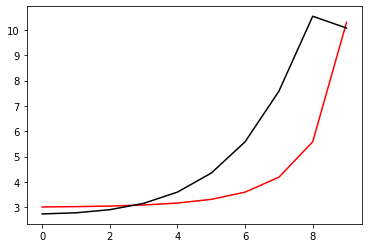

804 0.4474338977247993
[ 2.73988108  2.78400819  2.90683052  3.15577327  3.60081892  4.3513783
  5.58519225  7.58160599 10.54151794 10.07471822]


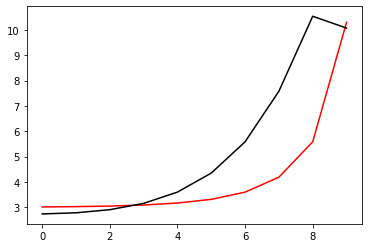

1005 4.437770984043117
[ 2.73989743  2.78401146  2.90679971  3.15569837  3.60072607  4.35135109
  5.58540674  7.58240135 10.54341559 10.07491187]


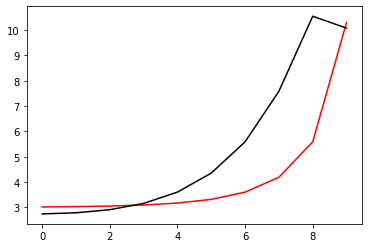

1206 1.4570816639912576
[ 2.73995899  2.7840417   2.90678085  3.1556238   3.60062274  4.3513025
  5.58558922  7.58315465 10.54525963 10.07516085]


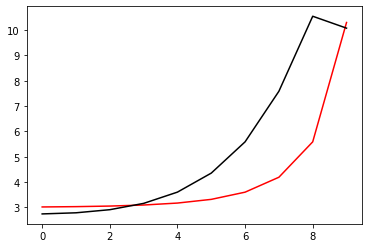

1407 0.4580538261248944
[ 2.74000081  2.78404513  2.90672904  3.15551301  3.60048138  4.3512151
  5.58573315  7.58386907 10.54705996 10.07546643]


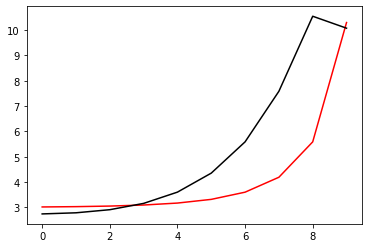

1608 2.3867456948312356
[ 2.74001067  2.78401137  2.90663539  3.1553589   3.60029784  4.351089
  5.58584369  7.58455448 10.54882965 10.07575092]


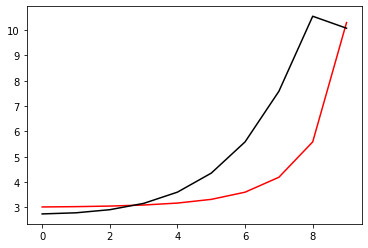

1809 1.4383033184762515
[ 2.74002059  2.78397482  2.9065349   3.15519472  3.60010103  4.35094552
  5.58593161  7.58521074 10.5505607  10.07596551]


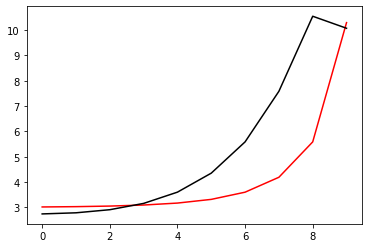

2010 1.5619473587051425
[ 2.74016299  2.78406881  2.90655987  3.15514899  3.60001189  4.35089225
  5.58608472  7.58590362 10.55230157 10.07614748]


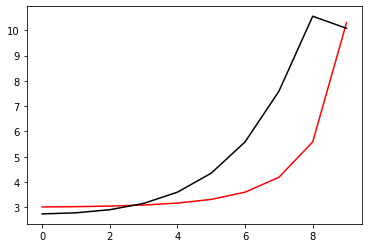

2211 1.45770559769488
[ 2.74027322  2.78412876  2.90654815  3.15506481  3.59988368  4.35080004
  5.58619956  7.58655798 10.55399932 10.07637305]


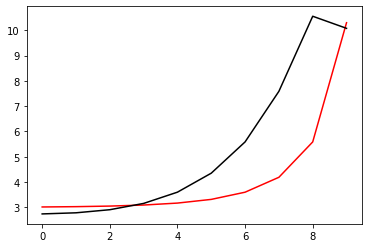

2412 3.45843604643714
[ 2.74034518  2.78415016  2.90649678  3.15494051  3.5997159   4.35066966
  5.58627807  7.58717668 10.5556574  10.07664855]


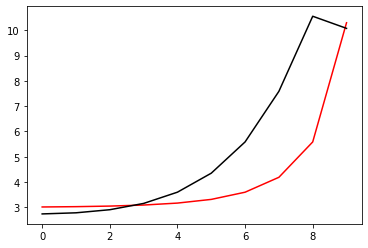

2613 0.4613855578295436
[ 2.74036843  2.78412602  2.90640199  3.15477504  3.59950994  4.35050478
  5.5863259   7.58776672 10.5572836  10.0769101 ]


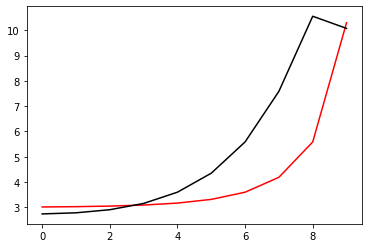

2814 0.4486850891437555
[ 2.74037622  2.78408596  2.90629007  3.15459118  3.59928465  4.35031955
  5.58635183  7.58833177 10.55887801 10.07711216]


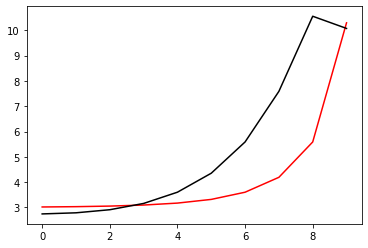

3015 4.429100744798801
[ 2.74042538  2.78409598  2.90623885  3.15448163  3.59915103  4.3502459
  5.58650719  7.58903586 10.56061005 10.07728298]


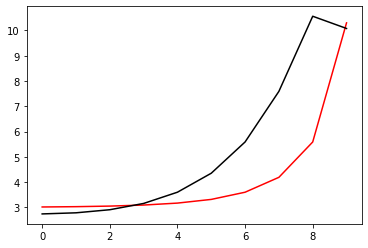

3216 1.4584958864646058
[ 2.74051076  2.78413377  2.90620696  3.1543828   3.59901907  4.35016373
  5.58664269  7.5897084  10.56229806 10.07751106]


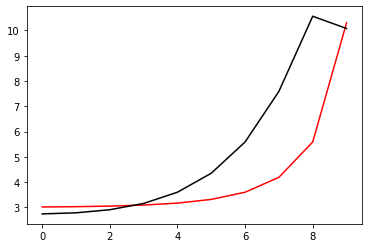

3417 0.4588019544115869
[ 2.74056908  2.78414433  2.90614728  3.15425545  3.59885814  4.35005244
  5.58674893  7.59035024 10.56394999 10.07779648]


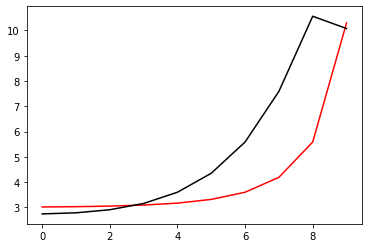

3618 2.3866049589371046
[ 2.74058929  2.78411626  2.90604889  3.15409012  3.59866144  4.34990951
  5.58682889  7.59096967 10.56557784 10.07806111]


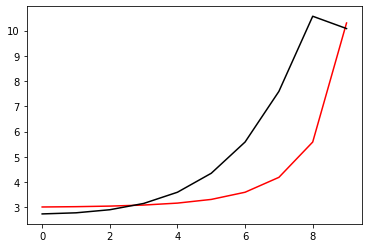

3819 1.4394270759134769
[ 2.7406055   2.78408459  2.90594646  3.15391928  3.59845674  4.34975475
  5.58689167  7.59156496 10.56717215 10.0782565 ]


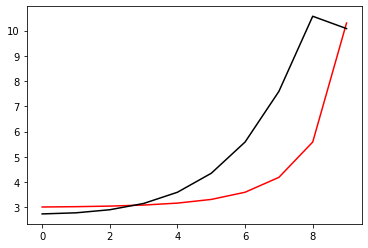

4020 1.5622579645166292
[ 2.74075112  2.78418255  2.90597142  3.15387026  3.59836347  4.34969403
  5.58702333  7.59220031 10.56877998 10.07842022]


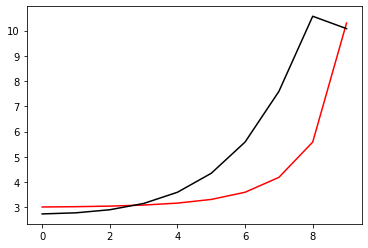

4221 1.4588172511928656
[ 2.74086238  2.78424568  2.90596113  3.15378553  3.59823426  4.34959766
  5.58712002  7.59280032 10.57034822 10.0786282 ]


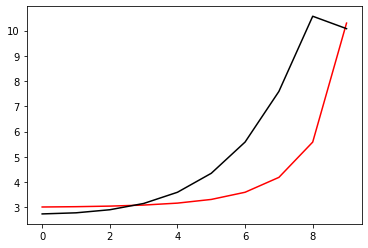

4422 3.459486222527983
[ 2.74093367  2.78426947  2.90591216  3.15366272  3.59806785  4.34946558
  5.58718292  7.59336721 10.57187975 10.07888632]


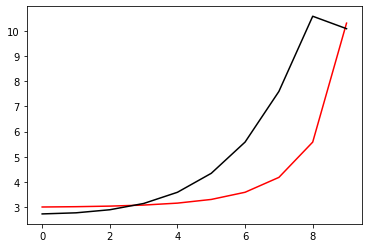

4623 0.46219900613637777
[ 2.74095545  2.78424742  2.90582074  3.15350058  3.59786532  4.34930104
  5.58721717  7.59390747 10.57338183 10.07913057]


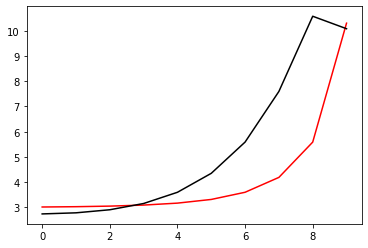

4824 0.44974973876530167
[ 2.74096093  2.78420893  2.90571268  3.15332133  3.59764493  4.34911763
  5.58723106  7.59442441 10.57485431 10.07931562]


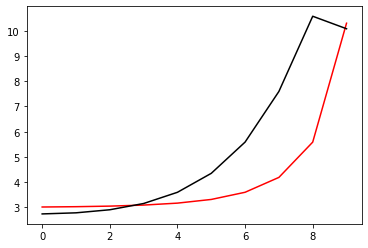

5025 4.421531484345556
[ 2.74100669  2.78421972  2.9056654   3.15321728  3.59751744  4.34904713
  5.5873758   7.59508188 10.57646639 10.07946992]


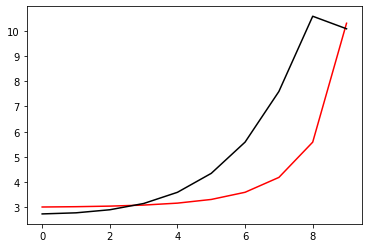

5226 1.4597174611344996
[ 2.7410892   2.78425871  2.90563832  3.15312523  3.59739293  4.34896926
  5.58750175  7.59570896 10.57803612 10.07968191]


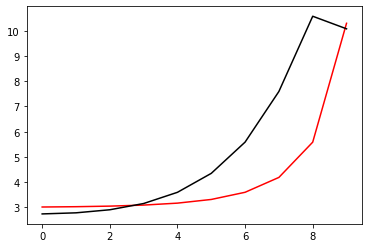

5427 0.45946982613345955
[ 2.74114458  2.78427041  2.90558379  3.15300544  3.59724031  4.34886306
  5.58759922  7.59630626 10.57957122 10.07995134]


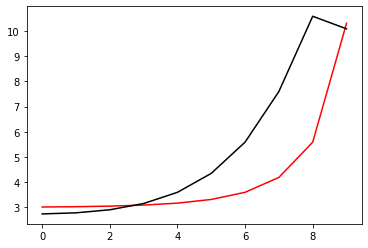

5628 2.386425822770757
[ 2.74116111  2.78424266  2.90549004  3.15284759  3.5970521   4.34872554
  5.58767101  7.59688212 10.58108393 10.08019991]


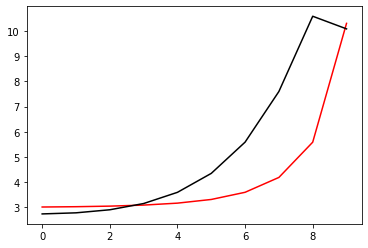

5829 1.4404543828447578
[ 2.7411735   2.78421111  2.90539225  3.15268454  3.59685631  4.34857658
  5.58772607  7.59743456 10.58256439 10.0803794 ]


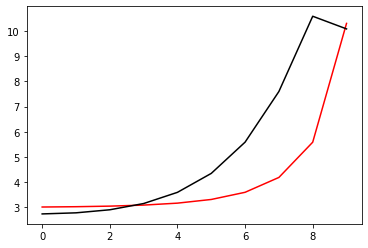

6030 1.5626029583957979
[ 2.74131511  2.78430895  2.90542177  3.15264347  3.59677217  4.34852174
  5.58785002  7.59802726 10.58405927 10.08052762]


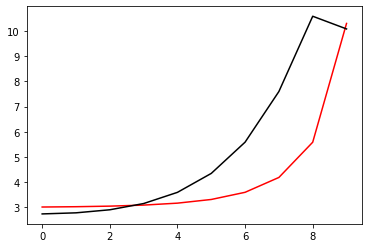

6231 1.4598326363251357
[ 2.74142228  2.78437178  2.90541593  3.15256678  3.59665229  4.34843147
  5.58793934  7.59858524 10.58551577 10.08072038]


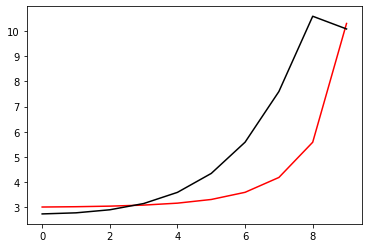

6432 3.4604507121536354
[ 2.74148935  2.78439503  2.90537121  3.15245201  3.59649533  4.34830566
  5.58799514  7.59911066 10.58693673 10.08096331]


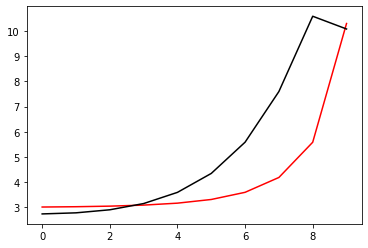

6633 0.46295700213300867
[ 2.74150717  2.78437257  2.90528416  3.15229811  3.59630251  4.34814763
  5.58802259  7.59960994 10.58832931 10.08119231]


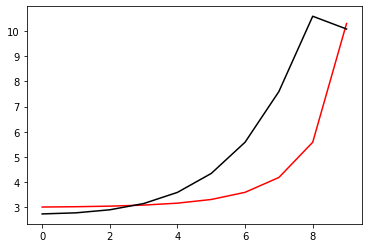

6834 0.45073525623636795
[ 2.74150869  2.78433356  2.90518035  3.1521271   3.59609193  4.34797086
  5.58802989  7.60008639 10.58969338 10.08136225]


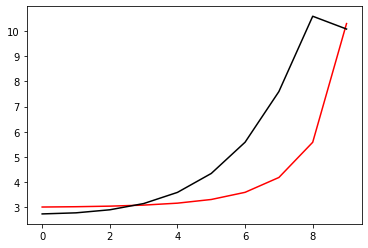

7035 4.414524108976293
[ 2.74154997  2.78434334  2.90513695  3.15203116  3.59597439  4.34790729
  5.58816843  7.60070394 10.59119814 10.08150177]


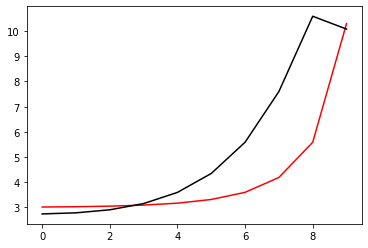

7236 1.4608512767633812
[ 2.74162889  2.78438201  2.9051143   3.15194771  3.59586023  4.34783666
  5.58828845  7.60129156 10.59266157 10.08169928]


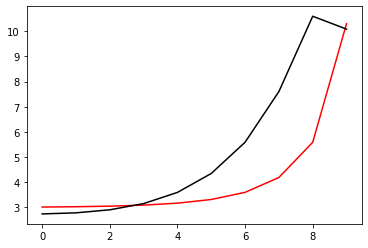

7437 0.4601013951816491
[ 2.74168095  2.78439359  2.90506433  3.15183668  3.59571816  4.34773787
  5.58838018  7.60184976 10.59409127 10.08195429]


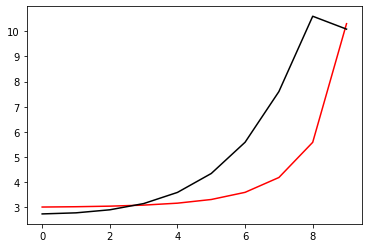

7638 2.386241084570595
[ 2.74169368  2.78436516  2.90497455  3.15168707  3.59554014  4.34760759
  5.58844633  7.60238706 10.59549978 10.08218832]


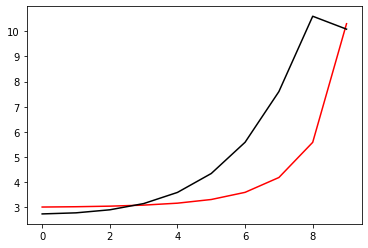

7839 1.441412313043126
[ 2.74170229  2.7843329   2.90488067  3.15153222  3.59535453  4.34746588
  5.58849585  7.60290128 10.59687699 10.08235339]


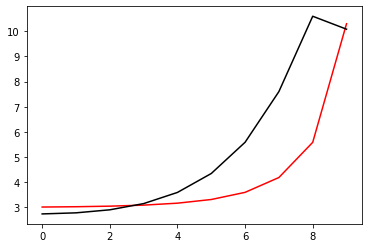

8040 1.562940545736607
[ 2.74184007  2.78442996  2.90491399  3.15149923  3.59528044  4.34741811
  5.58861403  7.60345574 10.59826921 10.08248754]


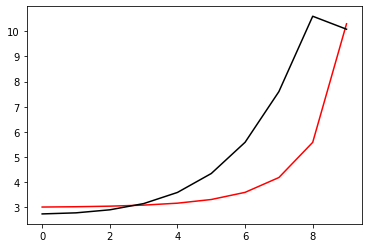

8241 1.4607789011567998
[ 2.74194342  2.78449196  2.90491183  3.1514305   3.59517054  4.34733489
  5.58869769  7.60397587 10.59962401 10.08266645]


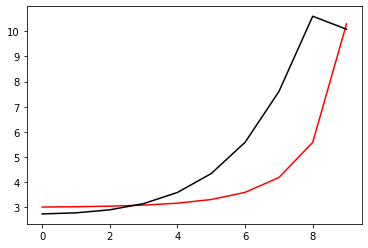

8442 3.461350527205323
[ 2.7420066   2.78451425  2.90487063  3.15132353  3.59502344  4.34721608
  5.58874792  7.6044638  10.6009442  10.08289552]


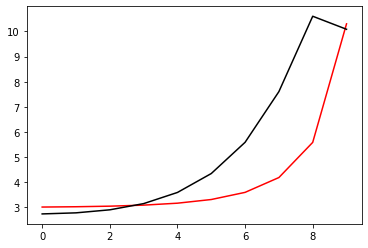

8643 0.4636695433202501
[ 2.74202083  2.78449103  2.9047872   3.15117749  3.59484054  4.34706514
  5.58876993  7.60492594 10.60223687 10.08311061]


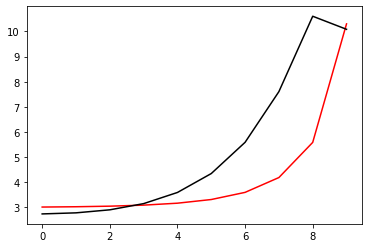

8844 0.4516555727914896
[ 2.74201876  2.78445123  2.90468693  3.15101424  3.59463982  4.34689544
  5.58877189  7.60536561 10.60350193 10.08326674]


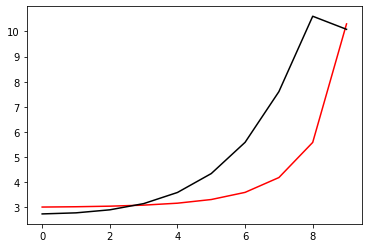

9045 4.4079930953346675
[ 2.74205597  2.78445979  2.90464672  3.15092585  3.59453209  4.34683909
  5.58890536  7.60594683 10.60490862 10.08339277]


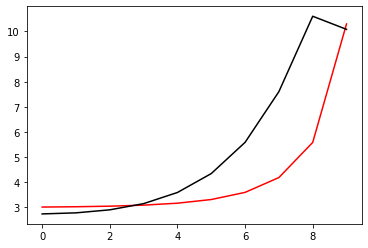

9246 1.4619117790546694
[ 2.74213165  2.78449795  2.9046278   3.15085035  3.59442806  4.34677589
  5.58902051  7.60649847 10.60627484 10.08357705]


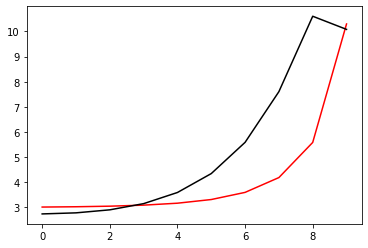

9447 0.46070141557671973
[ 2.74218074  2.78450921  2.90458171  3.15074738  3.59429619  4.34668459
  5.58910748  7.60702099 10.60760809 10.08381884]


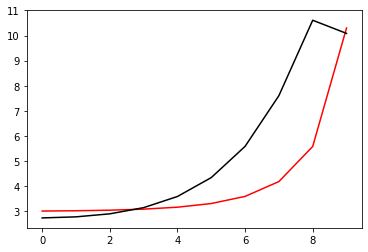

9648 2.38605497413612
[ 2.74219004  2.78447999  2.9044953   3.15060531  3.59412796  4.34656159
  5.58916892  7.60752306 10.60892123 10.08403957]


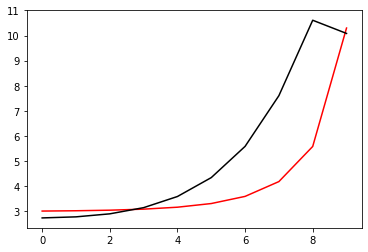

9849 1.4423084110538036
[ 2.74219526  2.78444694  2.90440473  3.15045794  3.59395206  4.34642712
  5.58921378  7.60800233 10.61020388 10.08419144]


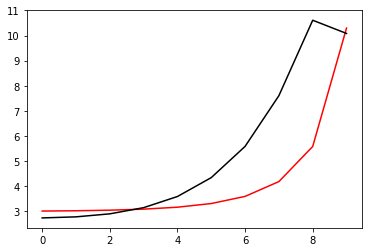

In [136]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, Positive[i%10], Negative[i%10]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 1.4611326849109374
[ 2.74268072  2.78470475  2.90437973  3.15015228  3.59339526  4.34567459
  5.58840125  7.60753152 10.61080911 10.08420881]


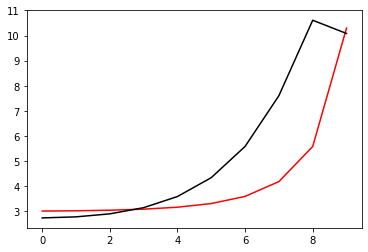

402 3.461775893685735
[ 2.74264462  2.78472173  2.90440209  3.1501574   3.59339036  4.34570626
  5.58858143  7.60809318 10.61212078 10.08443513]


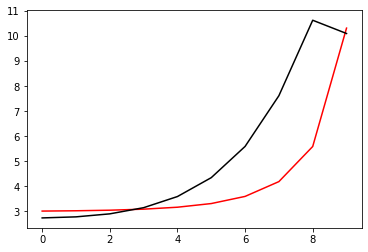

603 0.46410285588755423
[ 2.74258522  2.78468891  2.90436572  3.15009814  3.59331852  4.34567365
  5.58870637  7.60861074 10.61339368 10.08464876]


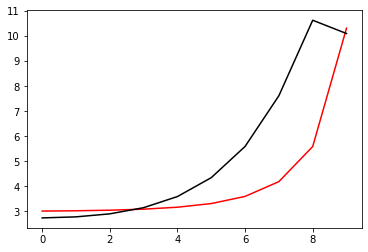

804 0.45223378755412924
[ 2.74252883  2.78463765  2.90429977  3.15000224  3.59320506  4.34559722
  5.58878873  7.60908841 10.61462591 10.08480143]


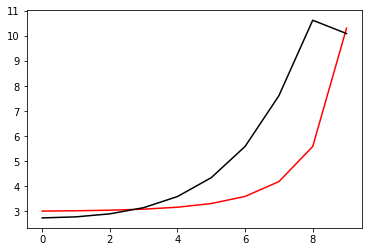

1005 4.403604577970552
[ 2.74252499  2.78463348  2.90428343  3.14996576  3.59316622  4.34561496
  5.5889852   7.60969377 10.61598898 10.08492145]


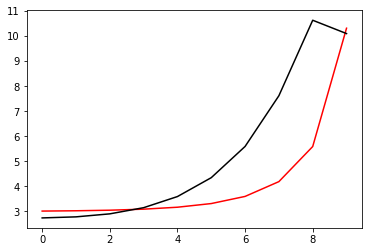

1206 1.4626023124840508
[ 2.74257085  2.78466005  2.90428175  3.1499313   3.59311772  4.34561155
  5.58915     7.6102588  10.6173032  10.08509823]


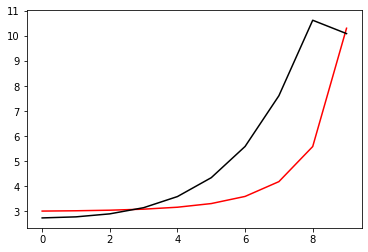

1407 0.4611137241446421
[ 2.74259834  2.78466114  2.90424799  3.14986097  3.59303114  4.34556911
  5.58927637  7.61078643 10.61857806 10.08533185]


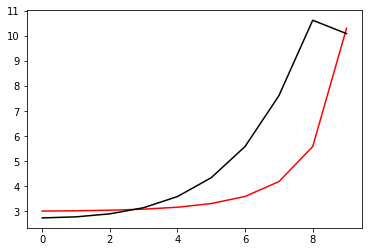

1608 2.3858590227477023
[ 2.74259151  2.78462261  2.90416978  3.14974461  3.59289993  4.34548636
  5.58936935  7.61128747 10.61982828 10.08554394]


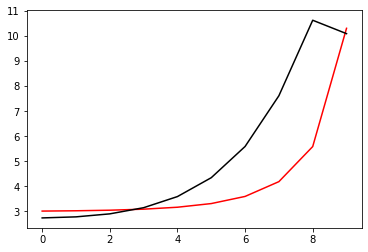

1809 1.4429753254547057
[ 2.74258477  2.78458144  2.90408466  3.14961783  3.59275488  4.34538566
  5.58943967  7.61176098 10.62104458 10.08568667]


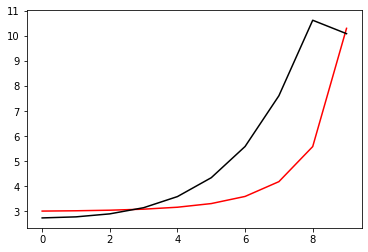

2010 1.5635843183073739
[ 2.74271009  2.78467063  2.90412477  3.14960892  3.59271646  4.34537367
  5.58957369  7.61227095 10.62227376 10.08579845]


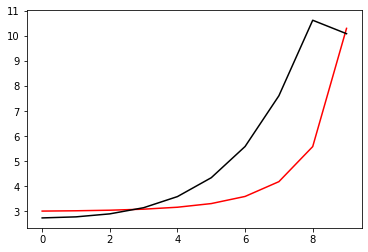

2211 1.4623208575358089
[ 2.74280317  2.78472567  2.90412789  3.14956102  3.59263827  4.3453222
  5.58966962  7.61274425 10.62346468 10.08595498]


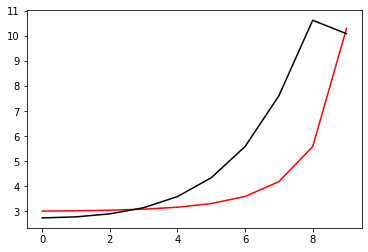

2412 3.4628248395766814
[ 2.7428575   2.78474169  2.90409079  3.14947223  3.59251967  4.34523191
  5.58972932  7.61318364 10.62462068 10.08616145]


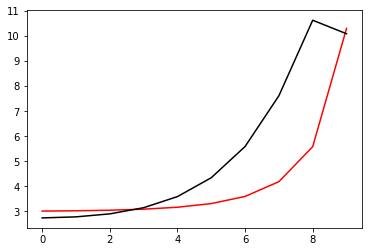

2613 0.4648548288379115
[ 2.74286444  2.78471325  2.90401104  3.14934265  3.59236296  4.34510713
  5.58975873  7.61359604 10.6257492  10.0863537 ]


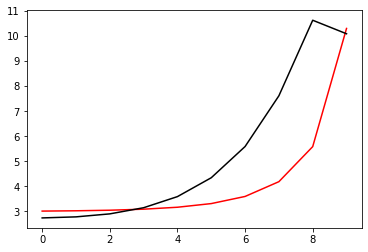

2814 0.4531760507314097
[ 2.74285584  2.78466879  2.90391396  3.14919433  3.59218641  4.34496159
  5.58976642  7.61398519 10.62685056 10.08648704]


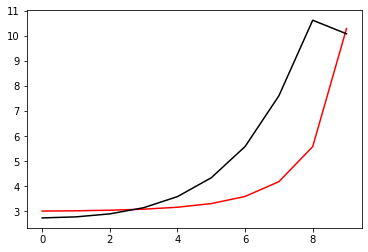

3015 4.397202079870033
[ 2.74288612  2.78467239  2.9038761   3.14911937  3.59210126  4.34492806
  5.58990465  7.6145156  10.62809432 10.08659063]


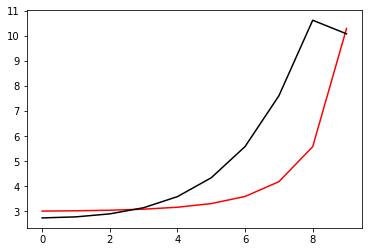

3216 1.4636689538036745
[ 2.74295665  2.78470723  2.90386038  3.14905722  3.5920191   4.34488673
  5.59002369  7.61501618 10.62929841 10.08675282]


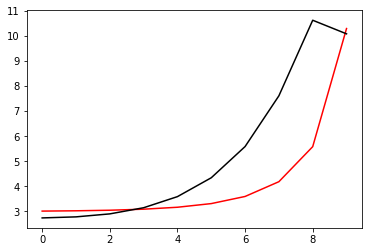

3417 0.461715880267441
[ 2.74300126  2.78471592  2.90381779  3.14896719  3.59190825  4.34481636
  5.59011373  7.61548743 10.63047036 10.08697253]


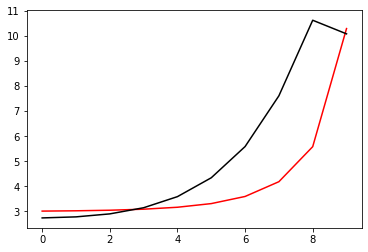

3618 2.385709044873486
[ 2.74300553  2.78468364  2.90373407  3.14883678  3.59175955  4.34471302
  5.59017753  7.61593846 10.63162364 10.08717097]


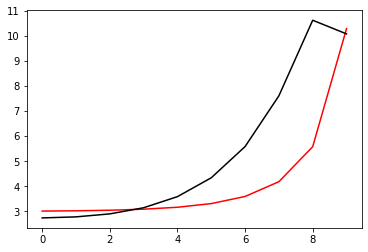

3819 1.4438023918023706
[ 2.74300587  2.78464781  2.90364627  3.14870064  3.59160242  4.34459739
  5.59022413  7.61636673 10.63274752 10.08730066]


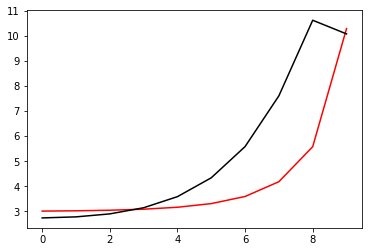

4020 1.5638425508915514
[ 2.74313527  2.78474142  2.90368565  3.1486859   3.59155589  4.34457449
  5.59033821  7.6168348  10.63388759 10.08740023]


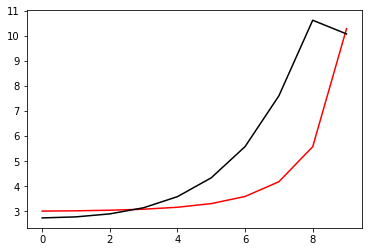

4221 1.4631374578943075
[ 2.74323032  2.78480007  2.90368948  3.14863495  3.5914728   4.34451544
  5.59041743  7.6172691  10.63499233 10.0875451 ]


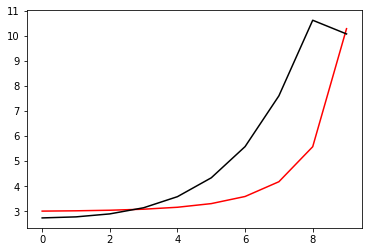

4422 3.463596888885516
[ 2.74328503  2.78481894  2.90365405  3.14854522  3.59135174  4.34442006
  5.59046287  7.61767175 10.63606455 10.08774008]


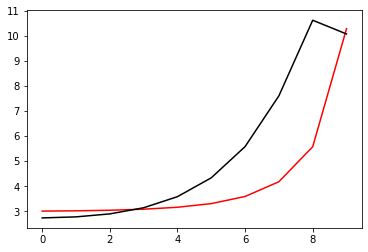

4623 0.46546989580112297
[ 2.7432915   2.78479295  2.90357684  3.14841649  3.59119462  4.3442922
  5.59047996  7.61804918 10.6371112  10.08792089]


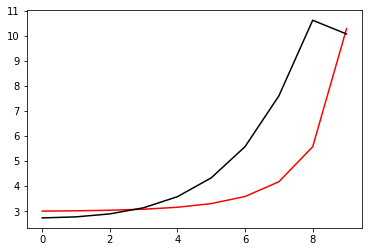

4824 0.45395656582628996
[ 2.74328166  2.78475043  2.90348278  3.14827031  3.59101917  4.34414508
  5.5904768   7.61840477 10.63813234 10.08804301]


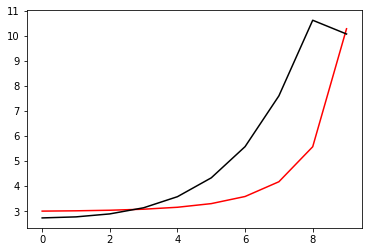

5025 4.39171623355463
[ 2.74330974  2.78475522  2.903448    3.14819836  3.59093631  4.34411122
  5.59060544  7.61890281 10.63929728 10.08813576]


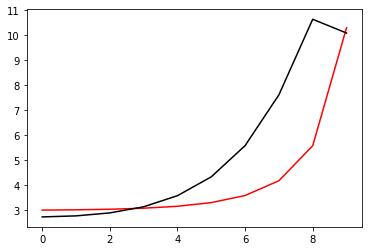

5226 1.4645702429934566
[ 2.7433784   2.7847915   2.90343607  3.14814039  3.5908577   4.34407067
  5.59071587  7.61937196 10.64042376 10.08828742]


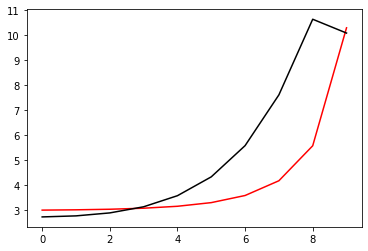

5427 0.46224291740785584
[ 2.74342104  2.7848015   2.90339751  3.14805523  3.59075124  4.34400185
  5.59079804  7.61981251 10.6415191  10.08849665]


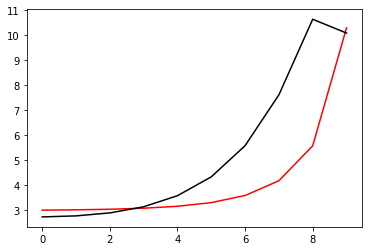

5628 2.3855297840619696
[ 2.74342274  2.78476985  2.90331743  3.14792974  3.59060722  4.34390045
  5.59085451  7.62023356 10.64259691 10.08868454]


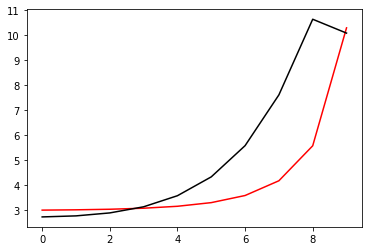

5829 1.4445561179184079
[ 2.7434204   2.78473445  2.90323327  3.14779885  3.59045523  4.34378719
  5.59089422  7.62063238 10.64364618 10.08880379]


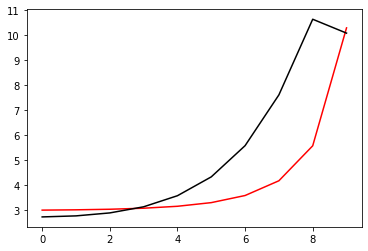

6030 1.5641301049645229
[ 2.74354696  2.78482828  2.90327622  3.14778955  3.59041415  4.34376686
  5.59100151  7.62107116 10.64471218 10.08889321]


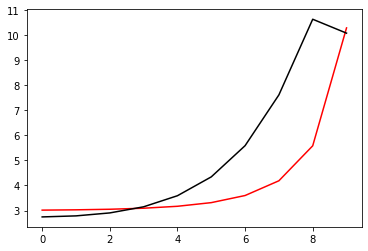

6231 1.4638809940061868
[ 2.74363911  2.78488699  2.90328353  3.14774417  3.59033676  4.34371066
  5.59107426  7.6214766  10.64574364 10.08902812]


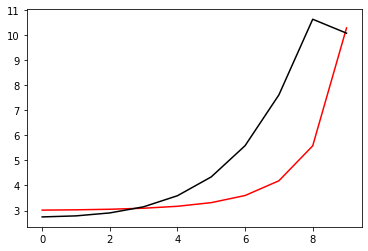

6432 3.464304606276658
[ 2.74369084  2.78490572  2.90325144  3.14766004  3.59022158  4.34361833
  5.59111348  7.62185077 10.64674329 10.08921314]


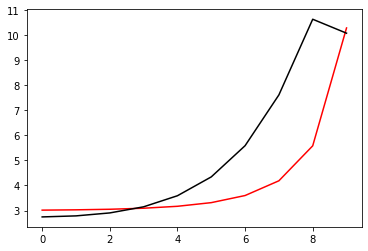

6633 0.4660413591555456
[ 2.74369453  2.78487967  2.90317761  3.1475371   3.59007059  4.34349377
  5.5911246   7.62220006 10.64771802 10.08938391]


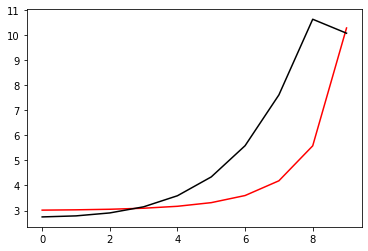

6834 0.45467945212559363
[ 2.7436819   2.784837    2.90308685  3.14739672  3.58990142  4.34335012
  5.59111568  7.62252781 10.64866791 10.08949608]


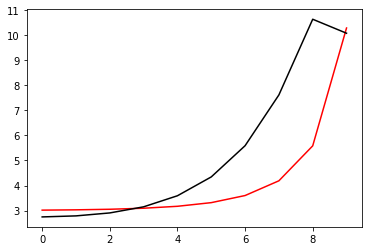

7035 4.386628821133001
[ 2.74370676  2.7848412   2.90305502  3.14733044  3.58982494  4.34331996
  5.59123885  7.6229984  10.64976228 10.08957912]


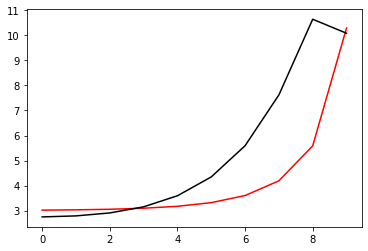

7236 1.4654071015704249
[ 2.74377288  2.78487741  2.90304645  3.14727854  3.58975309  4.34328343
  5.59134405  7.62344038 10.65081878 10.08972127]


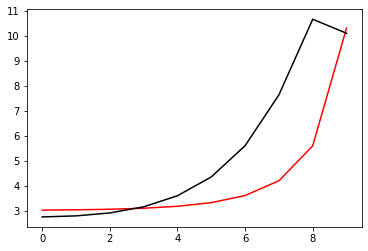

7437 0.46273826691490566
[ 2.74381318  2.78488746  2.90301132  3.14719956  3.58965356  4.34321878
  5.59142114  7.62385399 10.65184469 10.089921  ]


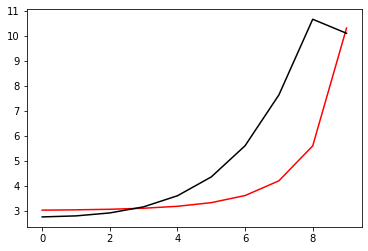

7638 2.3853511683097226
[ 2.74381219  2.78485544  2.90293423  3.14707988  3.58951623  4.34312148
  5.59147266  7.62424848 10.65285383 10.0900993 ]


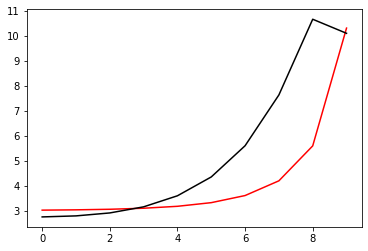

7839 1.445260413356737
[ 2.74380718  2.78481966  2.902853    3.14695478  3.58937098  4.34301239
  5.5915075   7.62462094 10.65383499 10.09020902]


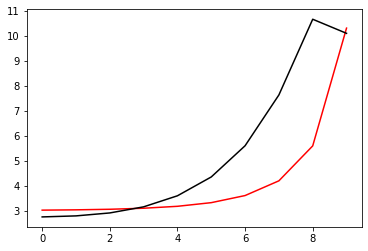

8040 1.5644087536168212
[ 2.74393102  2.78491303  2.9028988   3.14695119  3.58933658  4.34299615
  5.59160982  7.62503334 10.6548332  10.09028915]


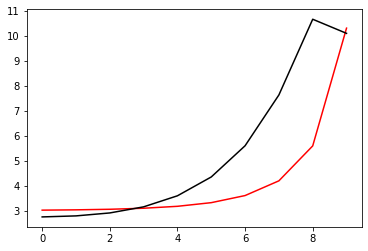

8241 1.4645754223157466
[ 2.74402047  2.78497125  2.90290887  3.14691145  3.58926585  4.34294406
  5.59167768  7.62541263 10.65579744 10.09041493]


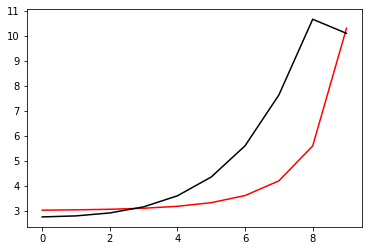

8442 3.4649662668116137
[ 2.74406946  2.78498942  2.90287942  3.14683285  3.58915727  4.34285586
  5.59171211  7.62576088 10.65673044 10.09059079]


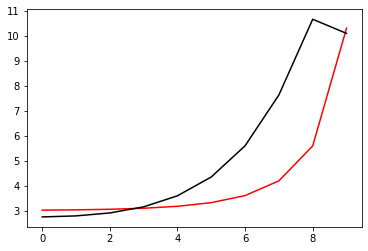

8643 0.46657850944189966
[ 2.74407064  2.78496293  2.9028083   3.14671548  3.58901295  4.34273552
  5.59171855  7.62608446 10.65763902 10.09075234]


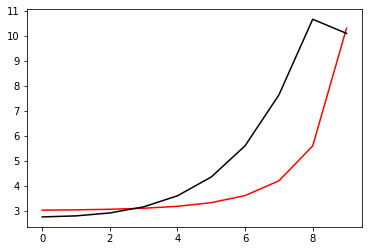

8844 0.45535615457681883
[ 2.7440555   2.78491981  2.90272018  3.14658061  3.58885042  4.3425961
  5.59170503  7.62638673 10.65852331 10.09085535]


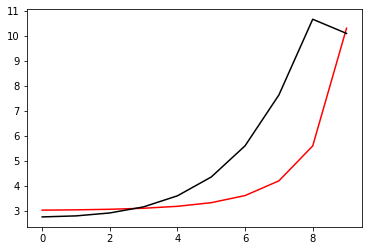

9045 4.381872312188608
[ 2.74407746  2.78492318  2.90269068  3.14651963  3.58878053  4.34257029
  5.59182382  7.62683213 10.65955263 10.09092944]


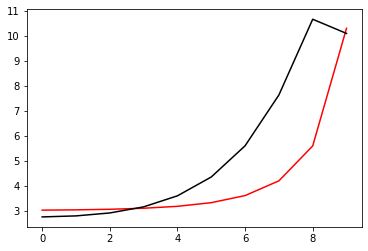

9246 1.4661914217039114
[ 2.74414132  2.7849591   2.90268486  3.14647336  3.58871554  4.3425383
  5.5919248   7.62724916 10.66054461 10.09106282]


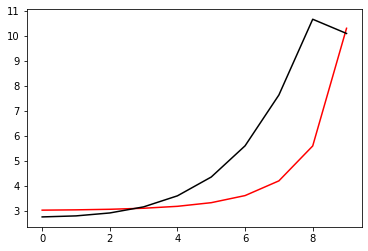

9447 0.4632069069740916
[ 2.74417953  2.78496902  2.90265258  3.14640007  3.58862292  4.34247827
  5.59199776  7.62763799 10.66150643 10.09125378]


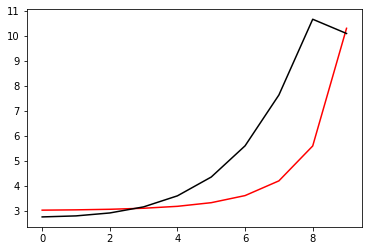

9648 2.385175983162166
[ 2.74417613  2.78493649  2.90257795  3.14628571  3.58849222  4.34238546
  5.59204522  7.628008   10.66245217 10.09142322]


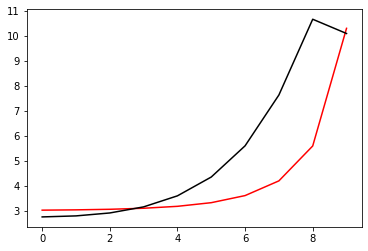

9849 1.4459209133949391
[ 2.74416873  2.78490021  2.90249915  3.14616588  3.58835355  4.34228084
  5.59207604  7.62835616 10.66337041 10.09152414]


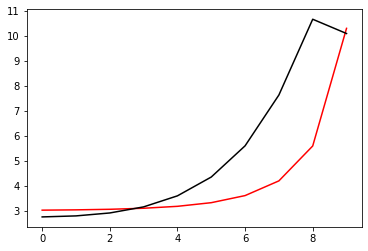

In [137]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, Positive[i%10], Negative[i%10]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

201 1.4646968208952764
[ 2.74462489  2.78515215  2.90249926  3.14591407  3.58786423  4.34157531
  5.59122583  7.62764329 10.66333741 10.09145441]


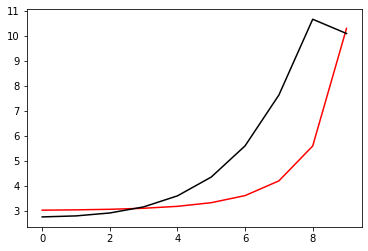

402 3.4651726751090126
[ 2.74457466  2.78516489  2.90253356  3.14594778  3.58789801  4.34163811
  5.59139277  7.62807554 10.6642911  10.09163156]


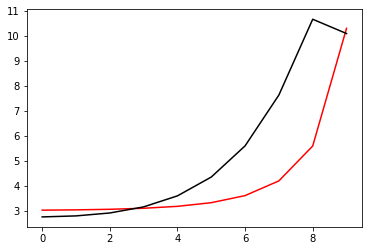

603 0.46684176064278154
[ 2.74450301  2.78512871  2.90250908  3.14591636  3.58786362  4.34163534
  5.59150375  7.62846413 10.66520838 10.09179567]


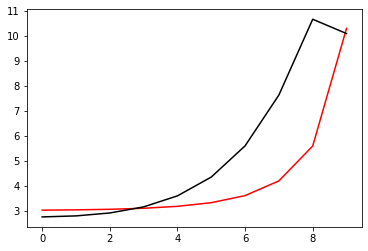

804 0.4557120437127975
[ 2.74443483  2.78507415  2.90245446  3.14584732  3.58778637  4.3415876
  5.59157162  7.62881351 10.66608772 10.09189912]


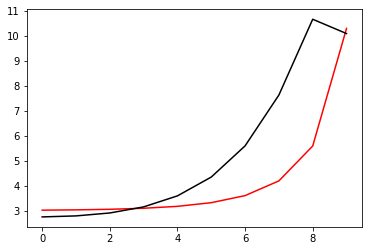

1005 4.37909936051421
[ 2.74441728  2.78506495  2.90244779  3.14583628  3.58778281  4.34163372
  5.59175395  7.62929185 10.66710089 10.09197097]


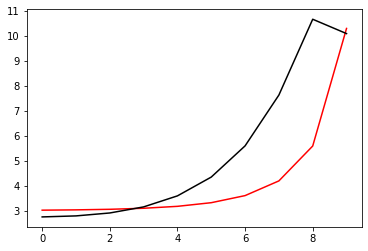

1206 1.4666285172403242
[ 2.74445274  2.78508936  2.90245794  3.14582872  3.58777041  4.34165903
  5.59190493  7.62973089 10.66806804 10.09210053]


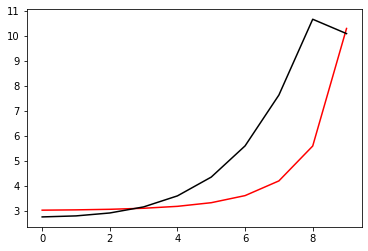

1407 0.46349049303471024
[ 2.74447075  2.78508919  2.90243664  3.14578561  3.58771995  4.34164521
  5.59201757  7.63013341 10.66899842 10.09228702]


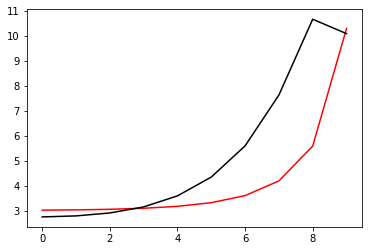

1608 2.385004313222456
[ 2.74445269  2.78504764  2.902369    3.14569453  3.58762318  4.34159002
  5.59209682  7.63051092 10.66990794 10.09245154]


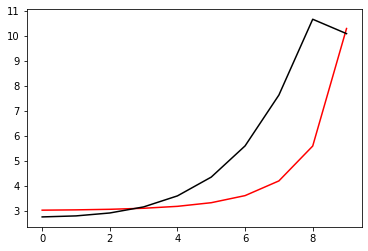

1809 1.4463708583644461
[ 2.74443474  2.78500355  2.90229448  3.14559287  3.58751225  4.34151654
  5.59215342  7.63086183 10.67078634 10.09254704]


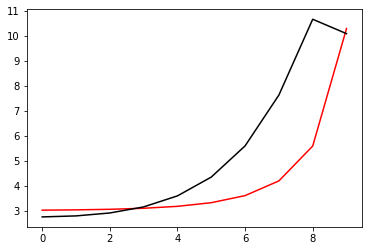

2010 1.5649269039555045
[ 2.74454844  2.78508966  2.90234506  3.1456088   3.58750741  4.34153089
  5.59227276  7.63124902 10.67167936 10.09261274]


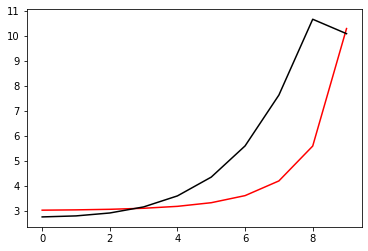

2211 1.4656687076757746
[ 2.7446299   2.78514159  2.9023585   3.14558544  3.58746239  4.34150546
  5.59235412  7.63160062 10.67253704 10.09272395]


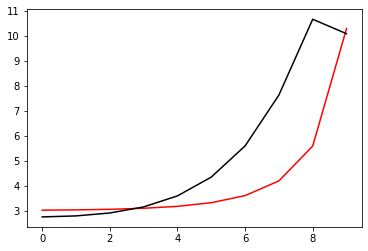

2412 3.4660152413196164
[ 2.74467233  2.78515422  2.90233139  3.14552073  3.58737643  4.34144082
  5.59239932  7.63191936 10.67336265 10.09288502]


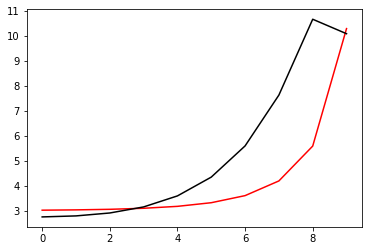

2613 0.46744241306293893
[ 2.74466831  2.78512315  2.90226217  3.14541553  3.58725246  4.34134171
  5.59241448  7.63221212 10.67416341 10.09303157]


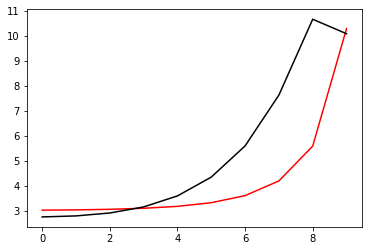

2814 0.456441173037091
[ 2.74464871  2.78507602  2.90217554  3.14529139  3.58710838  4.34122162
  5.59240806  7.63248266 10.6749398  10.09311955]


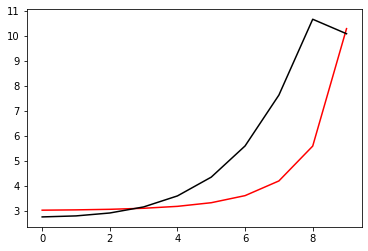

3015 4.3742328724874815
[ 2.74466592  2.78507521  2.90214677  3.14523974  3.58705535  4.34121376
  5.59253289  7.63289584 10.67586143 10.09317881]


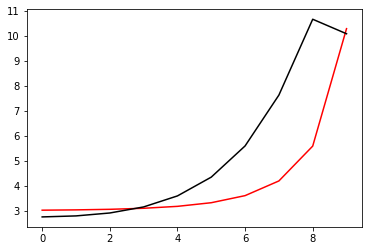

3216 1.467452379545226
[ 2.7447264   2.78510827  2.90214235  3.14520257  3.58700645  4.34119877
  5.59263902  7.63328024 10.67674603 10.09329758]


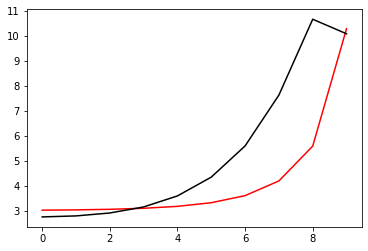

3417 0.46397072760767427
[ 2.74476177  2.78511594  2.90211169  3.14513797  3.58692909  4.34115481
  5.59271633  7.63363613 10.67760084 10.09347389]


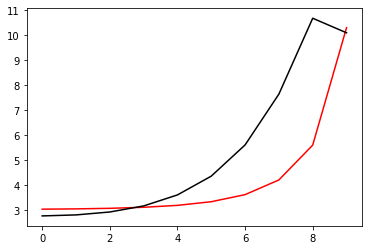

3618 2.3848693152512133
[ 2.74475515  2.78508091  2.90203814  3.14503127  3.58681237  4.34107695
  5.59276744  7.63397322 10.67844039 10.0936285 ]


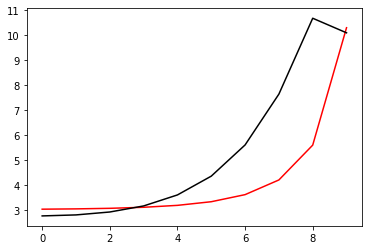

3819 1.44699239597529
[ 2.74474468  2.7850424   2.90196052  3.14491875  3.58668702  4.34098655
  5.59280133  7.63428835 10.67925304 10.09371468]


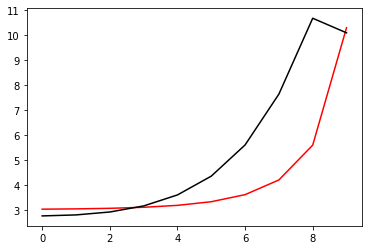

4020 1.5651301882165745
[ 2.74486293  2.78513315  2.90200994  3.1449274   3.58667181  4.3409881
  5.5929018   7.63464302 10.68008335 10.09377179]


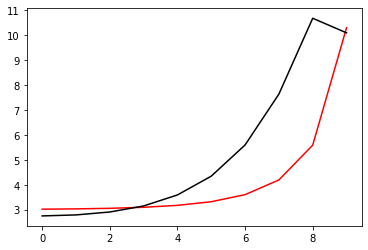

4221 1.4662816250841828
[ 2.74494688  2.78518891  2.90202367  3.14489956  3.58661966  4.34095318
  5.59296746  7.63496486 10.68088092 10.09387491]


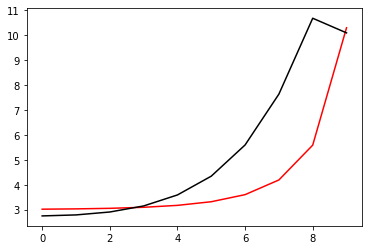

4422 3.4665944361930294
[ 2.7449903   2.78520461  2.90199777  3.14483249  3.58652905  4.34088155
  5.59299936  7.63525594 10.68164848 10.09402804]


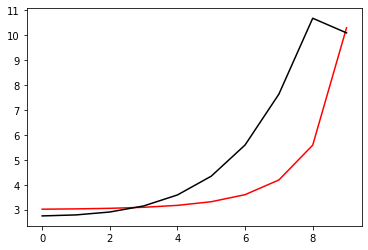

4623 0.4679116698332131
[ 2.74498639  2.78517617  2.90193057  3.14472669  3.58640245  4.34077745
  5.59300309  7.63552265 10.6823928  10.09416667]


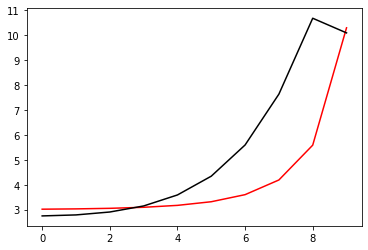

4824 0.45702478328390594
[ 2.74496618  2.78513116  2.90184642  3.14460322  3.58625725  4.34065384
  5.59298666  7.6357684  10.6831141  10.09424693]


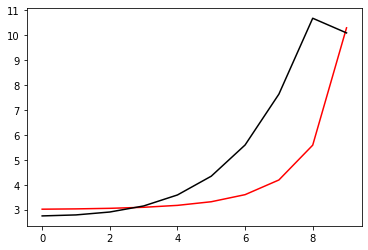

5025 4.370166091189187
[ 2.74498193  2.78513178  2.90182022  3.14455309  3.58620428  4.34064368
  5.59310264  7.63615782 10.68398175 10.09429877]


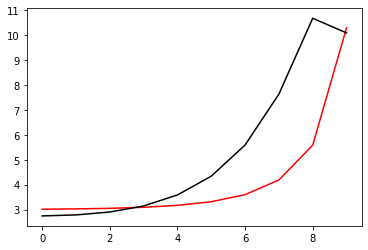

5226 1.4681291397593568
[ 2.74504115  2.78516639  2.90181892  3.14451853  3.58615663  4.34062745
  5.59320085  7.63651927 10.68481328 10.09441035]


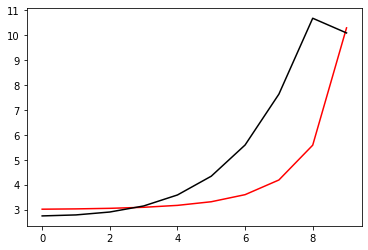

5427 0.46438233943276863
[ 2.74507511  2.78517543  2.90179157  3.14445717  3.58608133  4.340583
  5.59327093  7.63685282 10.68561577 10.09457952]


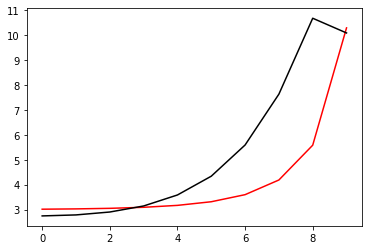

5628 2.3847089665218486
[ 2.74506663  2.7851412   2.90172103  3.14435385  3.58596705  4.3405051
  5.59331534  7.63716817 10.68640383 10.09472692]


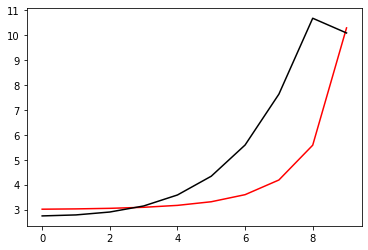

5829 1.4475555504235578
[ 2.74505417  2.7851033   2.90164641  3.14424503  3.58584461  4.3404151
  5.59334295  7.63746199 10.68716559 10.09480596]


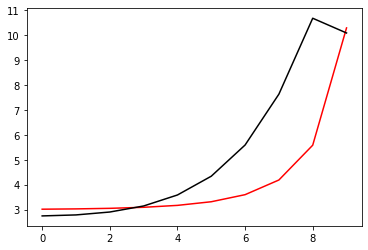

6030 1.5653617616825657
[ 2.7451703   2.78519445  2.90169877  3.14425758  3.58583264  4.3404173
  5.5934373   7.63779549 10.68794539 10.09485616]


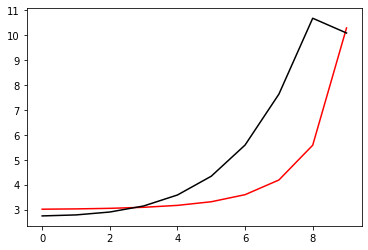

6231 1.4668364147117685
[ 2.7452521   2.78525047  2.90171535  3.14423378  3.58578403  4.34038334
  5.59349715  7.63809649 10.68869297 10.0949525 ]


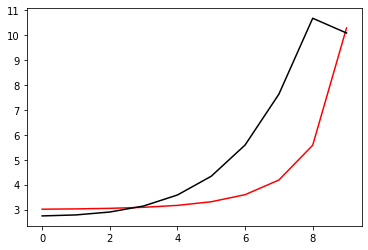

6432 3.467123138787744
[ 2.7452933   2.78526627  2.90169218  3.14417081  3.58569715  4.3403129
  5.59352348  7.63836702 10.68941102 10.09509883]


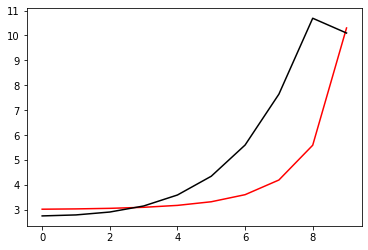

6633 0.46834609413274586
[ 2.74528732  2.78523795  2.90162773  3.14406926  3.58557454  4.34021023
  5.59352187  7.63861342 10.69010626 10.09523061]


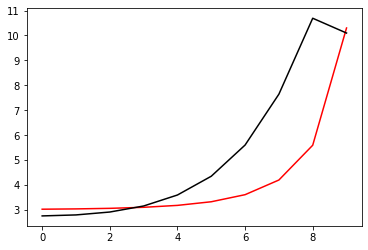

6834 0.4575646268092228
[ 2.74526505  2.78519299  2.90154625  3.14395008  3.58543348  4.34008824
  5.59350028  7.6388391  10.69077891 10.09530406]


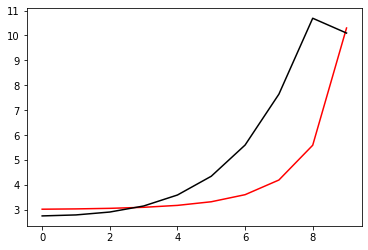

7035 4.366395120413293
[ 2.74527839  2.78519328  2.9015224   3.14390413  3.58538475  4.34007991
  5.59361135  7.6392087  10.69159834 10.09534927]


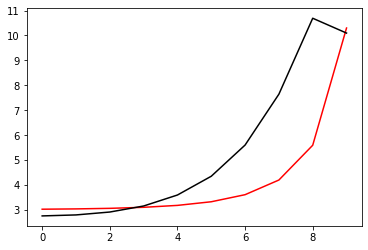

7236 1.4687568050443043
[ 2.74533572  2.78522795  2.90152377  3.14387406  3.58534168  4.3400658
  5.59370488  7.63955054 10.69238203 10.09545436]


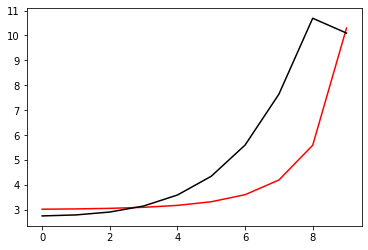

7437 0.46476769162148157
[ 2.74536794  2.78523713  2.90149913  3.14381727  3.5852711   4.34002363
  5.59377042  7.63986465 10.69313702 10.09561704]


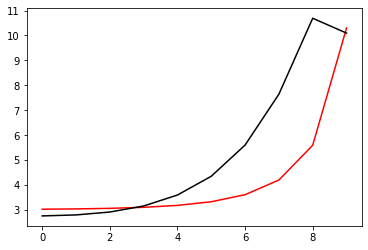

7638 2.384551482404636
[ 2.74535745  2.78520271  2.90143094  3.14371824  3.5851614   4.33994799
  5.59381041  7.64016082 10.6938781  10.09575786]


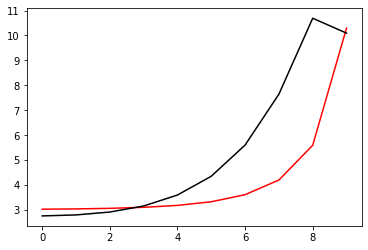

7839 1.4480822194909064
[ 2.74534303  2.78516461  2.90135862  3.1436137   3.58504359  4.33986034
  5.59383369  7.6404356  10.69459322 10.09583036]


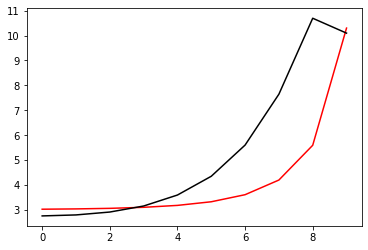

8040 1.5655854505383033
[ 2.74545713  2.78525549  2.9014132   3.14363048  3.58503625  4.33986488
  5.59392366  7.64075005 10.69532656 10.0958742 ]


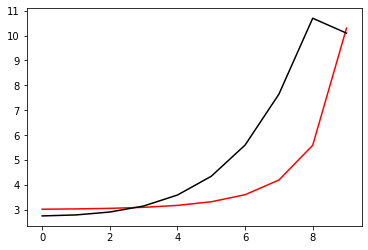

8241 1.467355018015827
[ 2.74553693  2.78531122  2.90143194  3.14361087  3.58499227  4.33983332
  5.59397922  7.64103215 10.69602804 10.0959643 ]


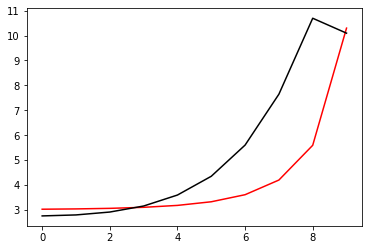

8442 3.467617901427711
[ 2.74557613  2.78532668  2.90141084  3.14355201  3.58491     4.3397653
  5.59400135  7.64128394 10.69670035 10.09610435]


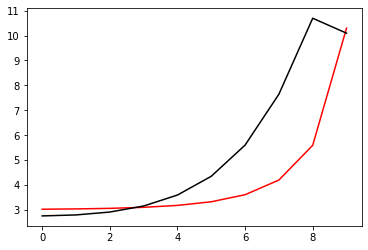

8643 0.46875435494001366
[ 2.74556831  2.78529811  2.9013485   3.14345458  3.58479205  4.33966515
  5.59399565  7.64151176 10.69735016 10.09622977]


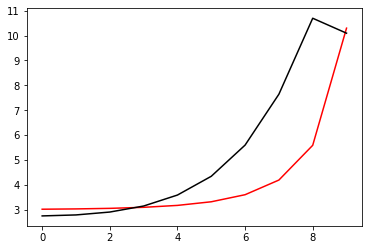

8844 0.45807063709972773
[ 2.74554422  2.78525289  2.90126907  3.14333948  3.58465566  4.33954572
  5.59397005  7.64171899 10.69797772 10.09629692]


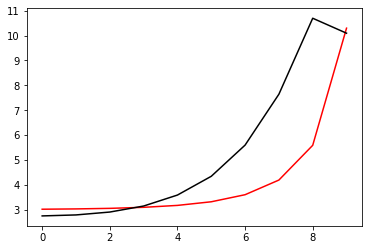

9045 4.362862954489838
[ 2.7455554   2.7852526   2.901247    3.14329743  3.58461155  4.33954005
  5.59407729  7.64207036 10.69875241 10.09633598]


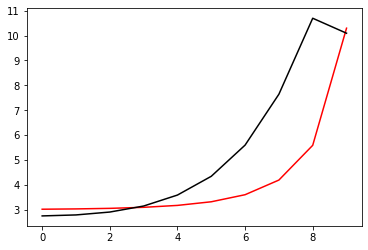

9246 1.469345681678933
[ 2.74561107  2.78528712  2.90125048  3.14327151  3.58457331  4.33952877
  5.59416712  7.64239412 10.69949169 10.09643505]


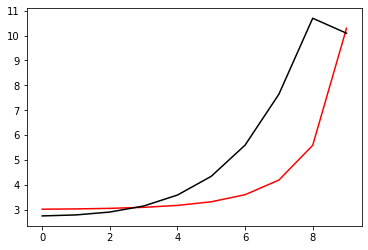

9447 0.46513151036070516
[ 2.74564176  2.78529624  2.90122801  3.14321893  3.58450762  4.3394895
  5.59422905  7.64269027 10.70020254 10.09659169]


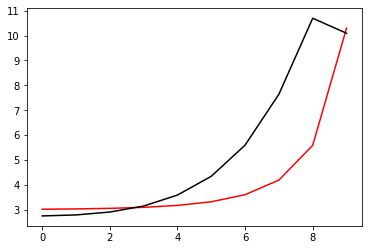

9648 2.3843989358378876
[ 2.7456295   2.78526149  2.90116169  3.14312381  3.58440259  4.33941668
  5.59426548  7.64296871 10.70089993 10.09672639]


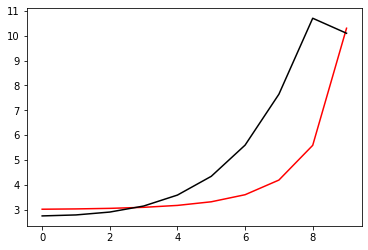

9849 1.4485769022590262
[ 2.74561333  2.78522307  2.90109122  3.14302314  3.58428943  4.33933186
  5.59428527  7.64322588 10.70157166 10.09679282]


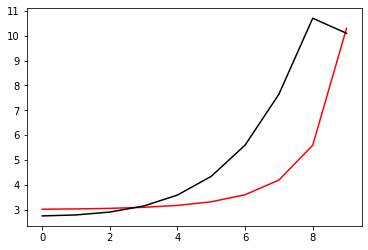

In [138]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 10001):
    run(i%10)
    if i%201==0: print(i, Error_func(h, Positive[i%10], Negative[i%10]).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

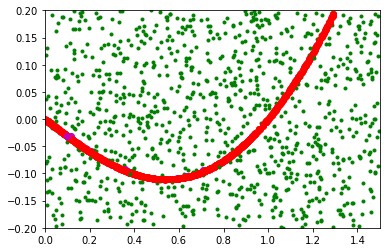

In [139]:
for i in range (10):
    [Positive0[i], Positive1[i]]=NN_func_01(h, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, Negative[i])
for i in range (10):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()